In [168]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [169]:
# Load input data
data = pd.read_csv("https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [170]:
data.shape

(1460, 81)

In [171]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [172]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

# 2. Data Processing

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
# Convert columns into object
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [175]:
data['LotFrontage'] = pd.to_numeric(data['LotFrontage'], errors ='coerce')
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'], errors='coerce')

In [176]:
na_col = data.columns[data.isna().sum() > 0]
print(na_col)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


### Observation
1. LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,
MiscFeature are having missing values

In [178]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [179]:
#Dropping columns with high missing values
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [180]:
 #Treating missing values by imputing for columns with missing values

data['LotFrontage']= data.LotFrontage.fillna(data.LotFrontage.median())
data['MasVnrArea']= data.MasVnrArea.fillna(data.MasVnrArea.median())
data['GarageYrBlt']= data.GarageYrBlt.fillna(data.GarageYrBlt.mean())

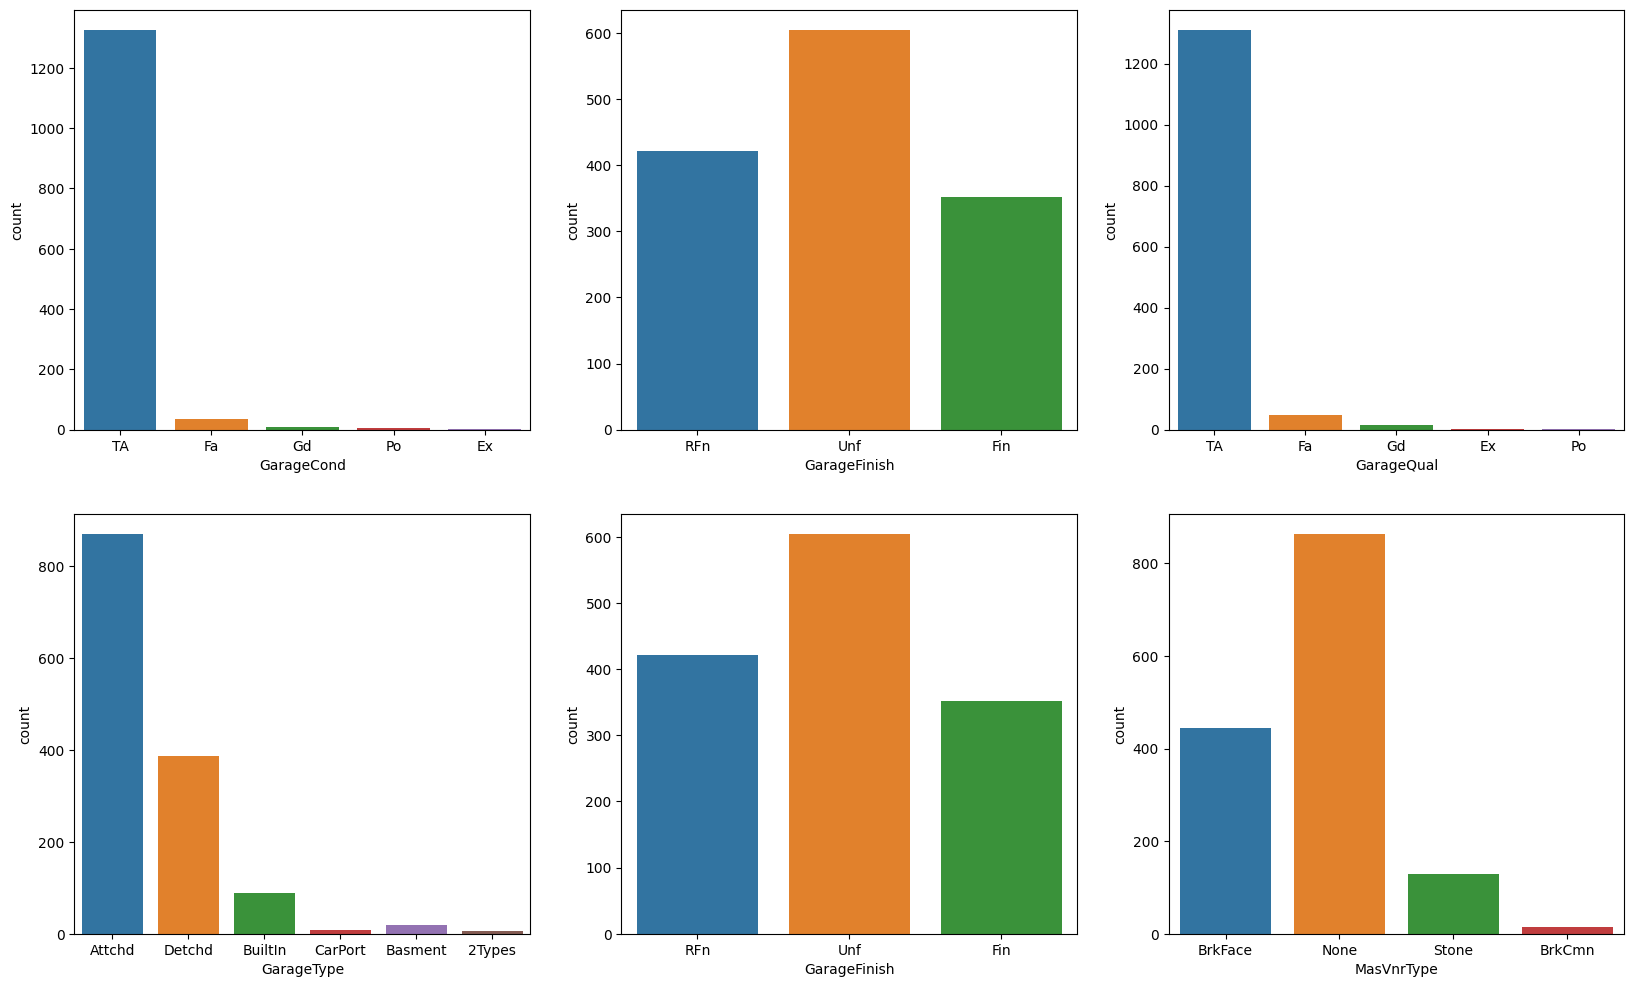

In [181]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = data)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = data)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = data)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = data)
plt.show()

In [182]:
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrType      0.547945
Electrical      0.068493
FullBath        0.000000
BsmtHalfBath    0.000000
TotRmsAbvGrd    0.000000
BsmtFullBath    0.000000
dtype: float64

In [183]:
# replacing null with No Garrage

data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None')
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr')


In [184]:
#changing num to categorical so as to form these as dummy variables
data['MSSubClass']=data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

data['OverallQual']=data['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
data['OverallCond']=data['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [185]:
data.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch  \
0      Reg         Lvl    AllPub    Inside  ...             0         0   
1      Reg         Lvl    AllPub       FR2  ...             0         0   
2      IR1         Lvl    AllPub    Inside  ...             0         0   
3      IR1         Lvl    AllPub    Corner  ...           272         0   
4      IR1         Lvl    AllPub       FR2  ...             0         0   

  ScreenPorch PoolArea MiscVal MoSold YrSold SaleType  SaleCondition  \
0           0        0       0      2   2008       WD         Normal   
1           0        0       0      5   2007       WD         Normal   
2           0        0       0      9   2008       WD         Normal   
3           0        0       0      2   2006       WD        Abnorml   
4           0        0       0     12   2008       WD         Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 76 columns]

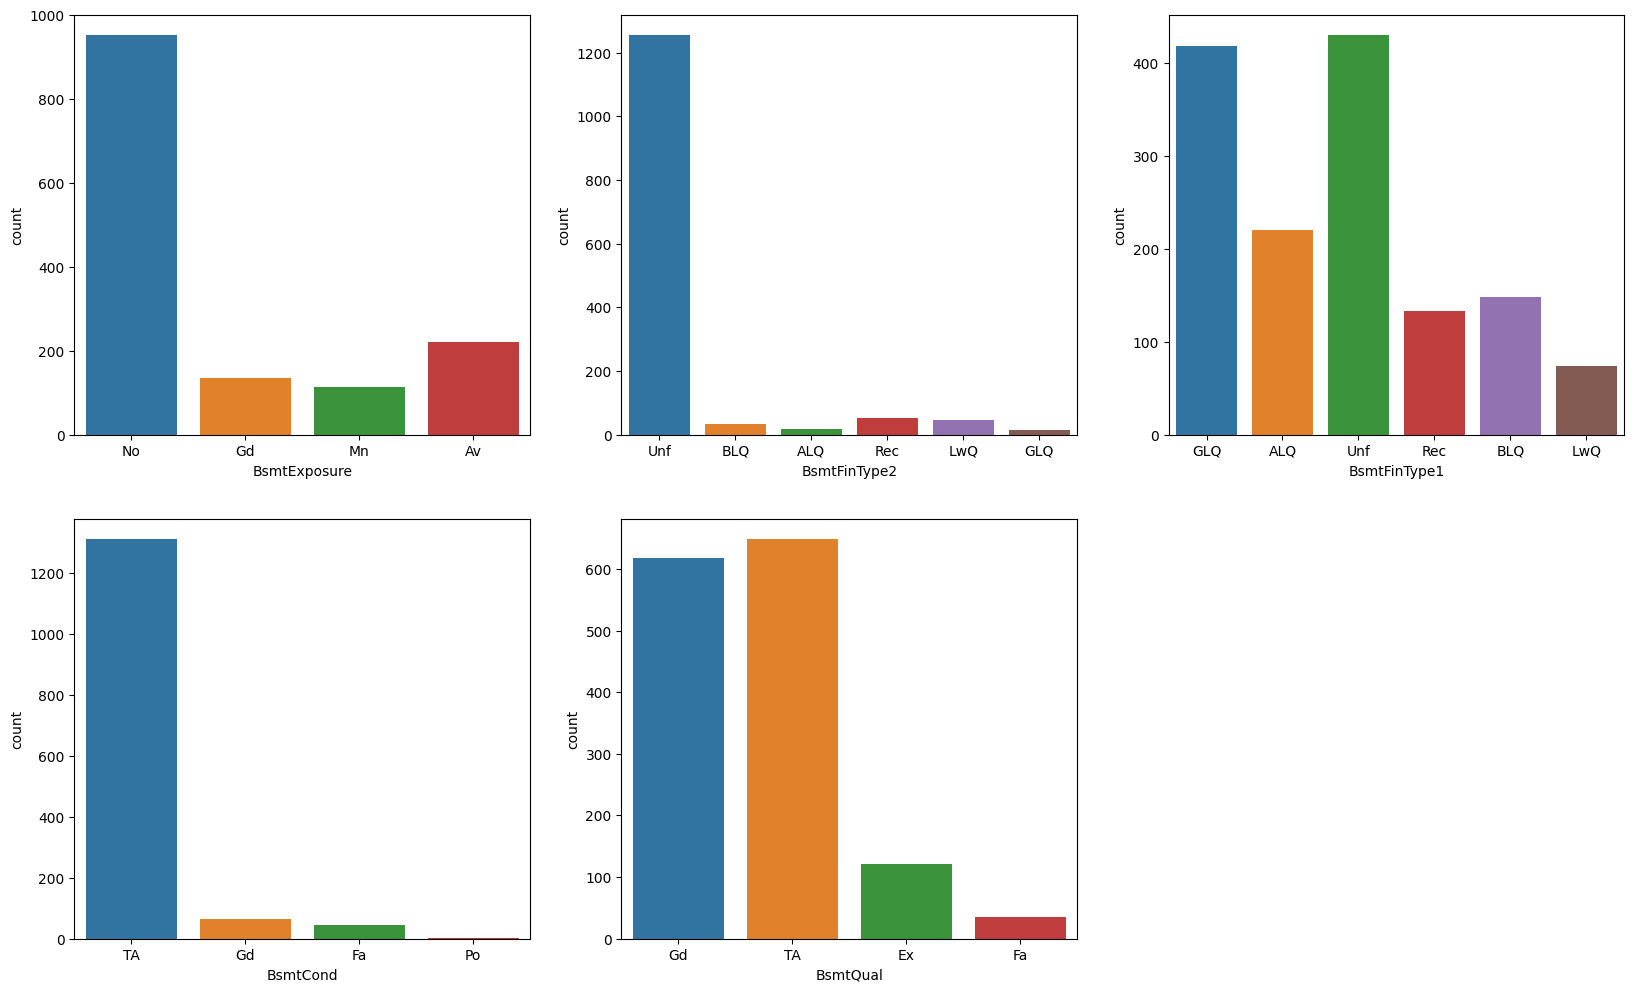

In [186]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = data)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = data)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = data)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = data)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = data)

plt.show()

In [187]:
# Cases when the house doesn't have the basement so replacing null with No Basement

data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')

In [188]:
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
MSSubClass      0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
dtype: float64

#**Univariate Analysis**

###Summary

The target variable (SalePrice) is right skewed, with 1.8828 skewness (>1) indicating it is highly skewed and 6.5 kurtosis (>1) indicating it is highly peaked.

Post Log transformation, The skewness and Kurtosis are lesser than 1.

The target variable is now normally distributed.

<Axes: xlabel='SalePrice', ylabel='Density'>

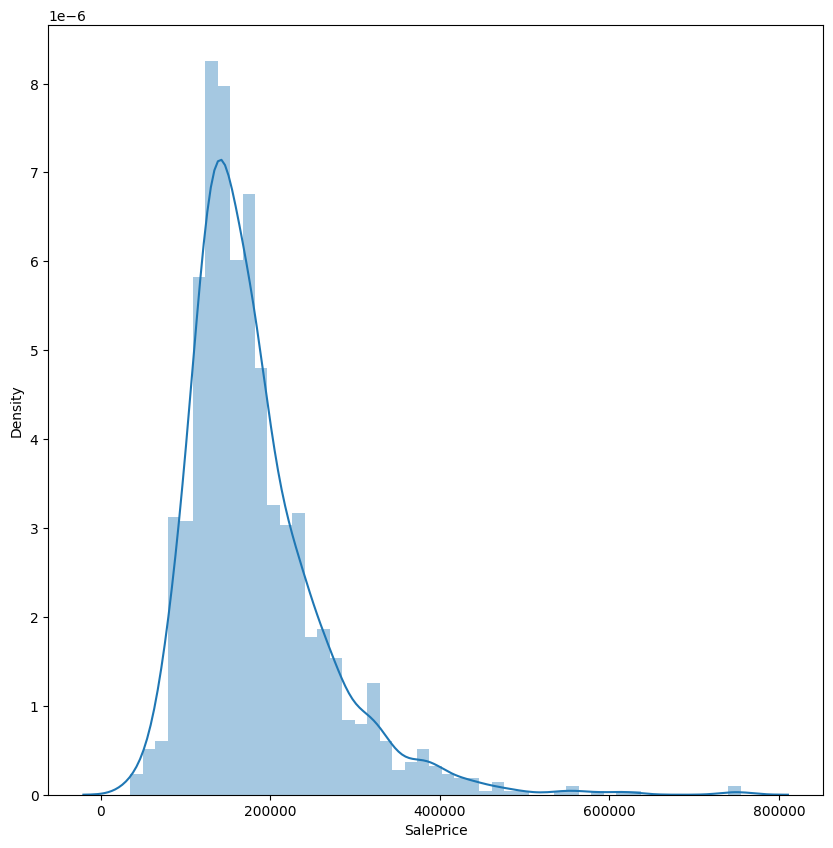

In [189]:
plt.figure(figsize=[10,10])
sns.distplot(data['SalePrice'])

In [190]:
print("skewness :" ,data['SalePrice'].skew())
print("kurtosis :" ,data['SalePrice'].kurt())

skewness : 1.8828757597682129
kurtosis : 6.536281860064529


In [191]:
# Performing Log transformation of the target variable
data['SalePrice']=np.log(data['SalePrice'])

In [192]:
print("skewness :" ,data['SalePrice'].skew())
print("kurtosis :" ,data['SalePrice'].kurt())

skewness : 0.12133506220520406
kurtosis : 0.8095319958036296


<Axes: xlabel='SalePrice', ylabel='Density'>

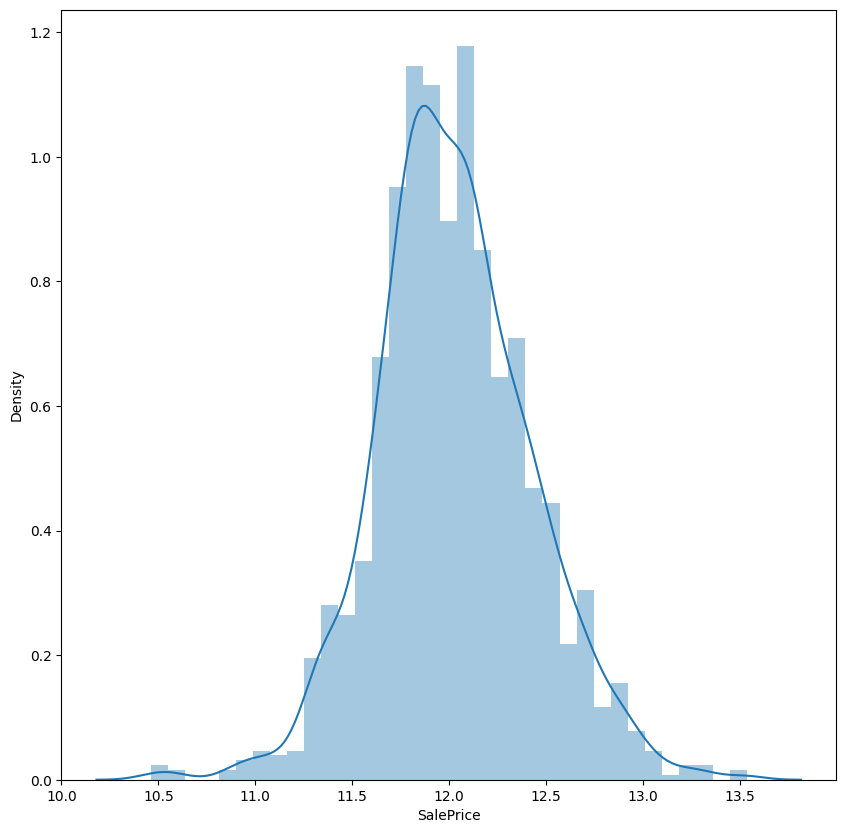

In [193]:
plt.figure(figsize=[10,10])
sns.distplot(data['SalePrice'])

### Performing Categorical and numerical variables analysis

In [194]:
#Segment numeric and cateogrical variables into seperate data frames for further analysis
data_num = data.select_dtypes(include=['int64','float64'])
data_cat = data.select_dtypes(include ='object')

In [195]:
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [196]:
data_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

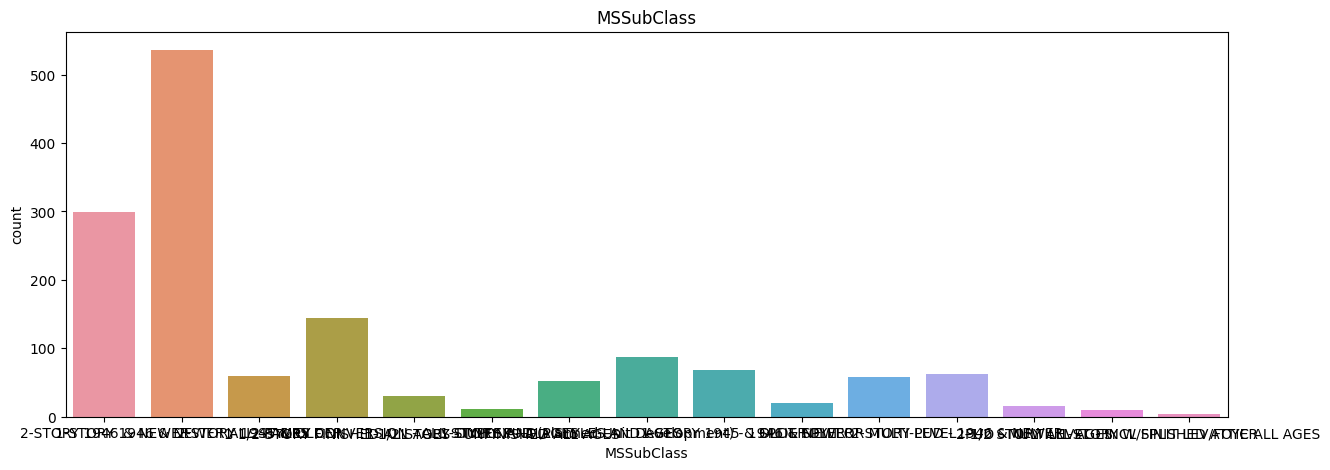

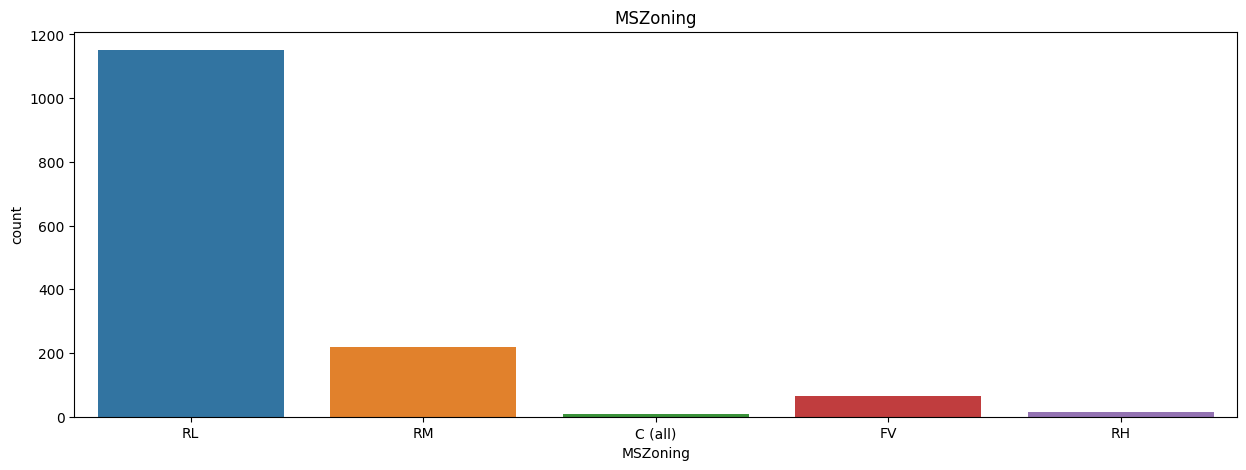

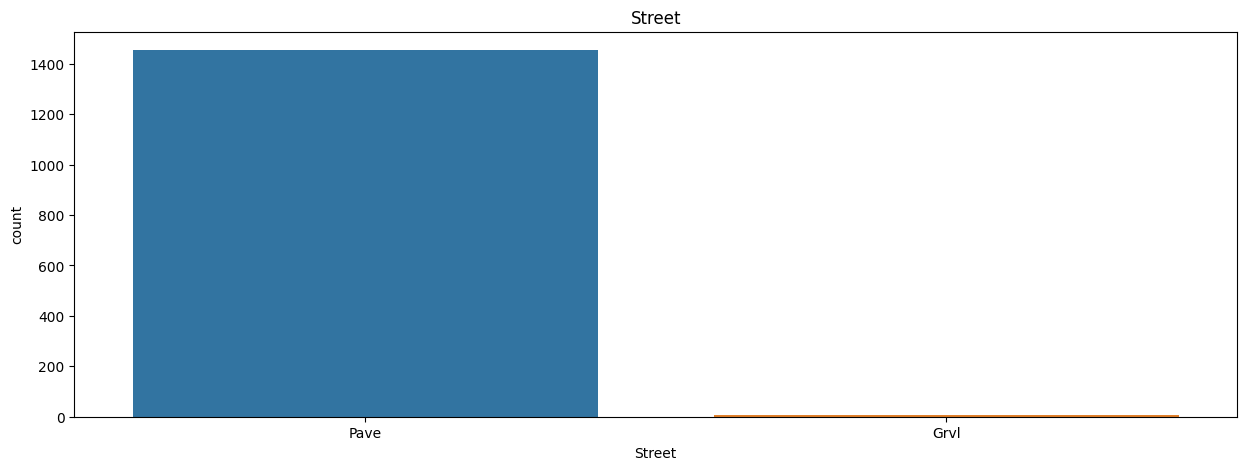

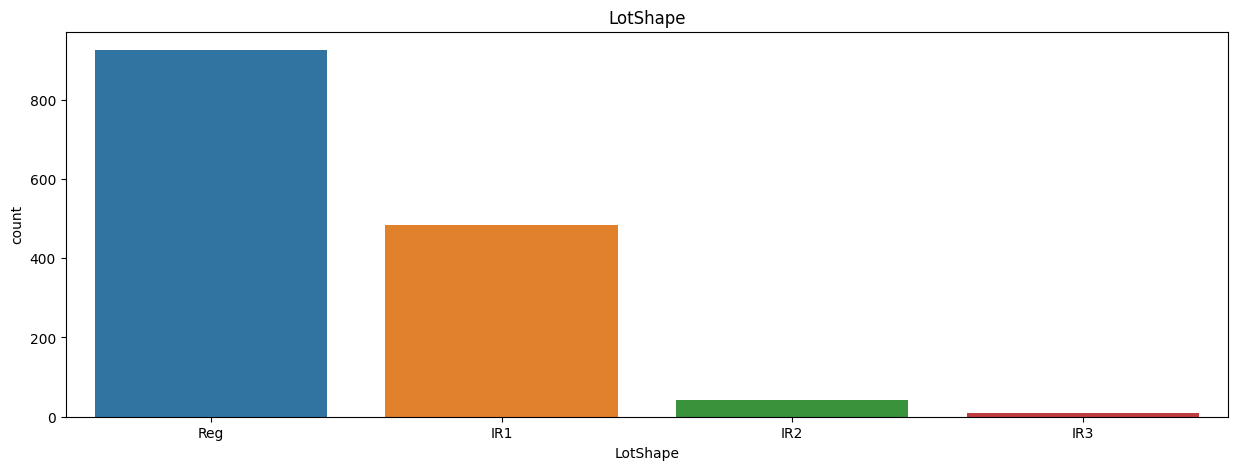

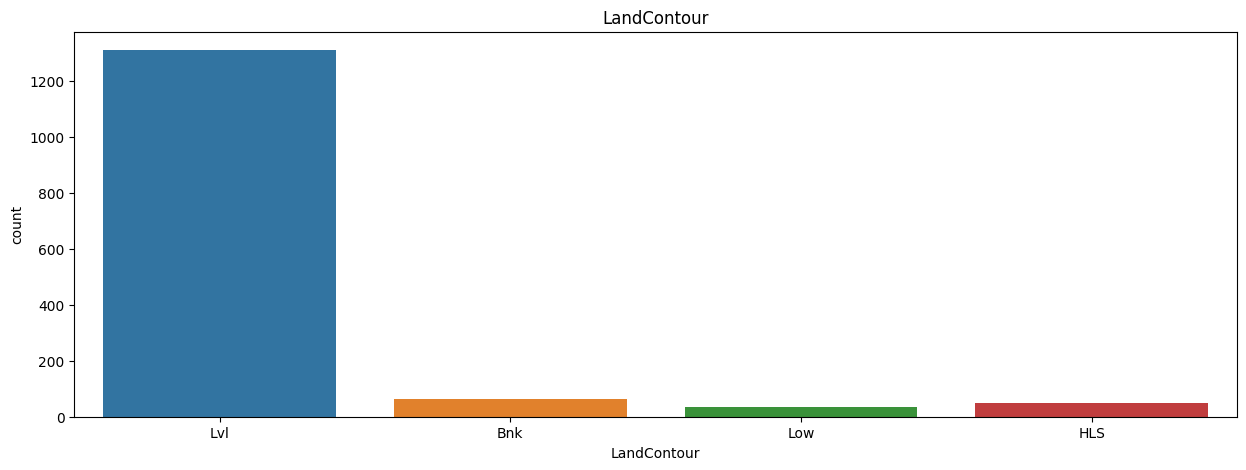

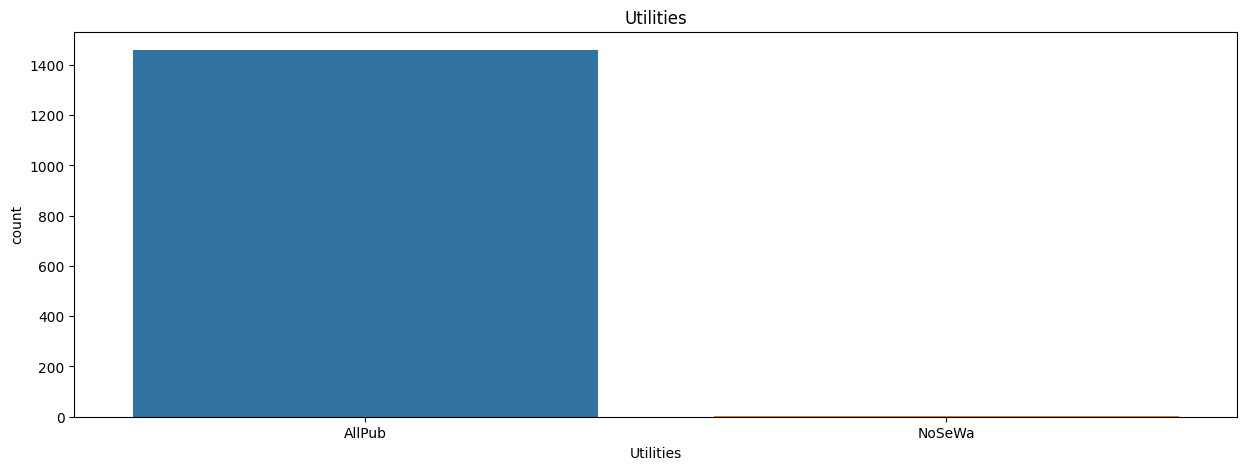

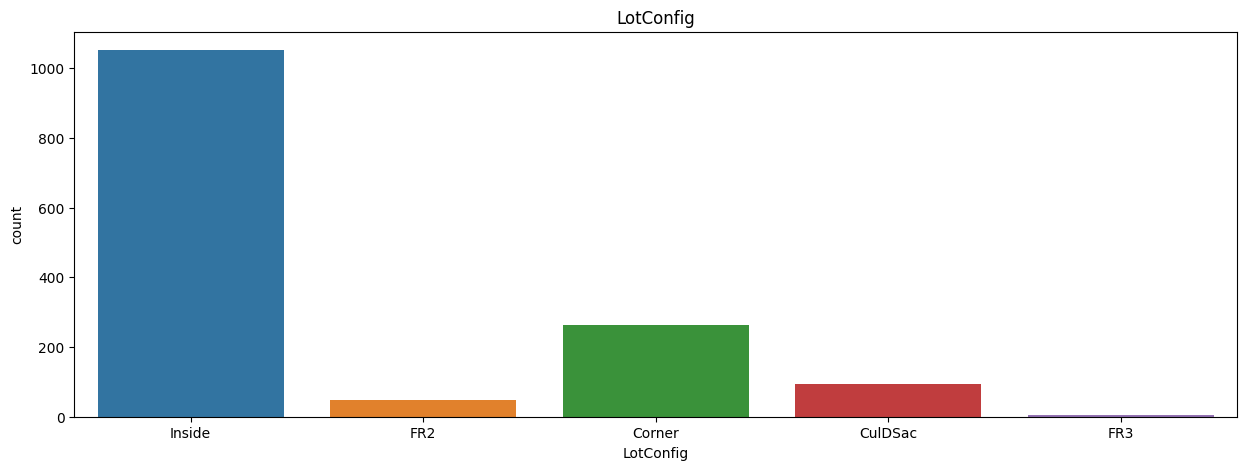

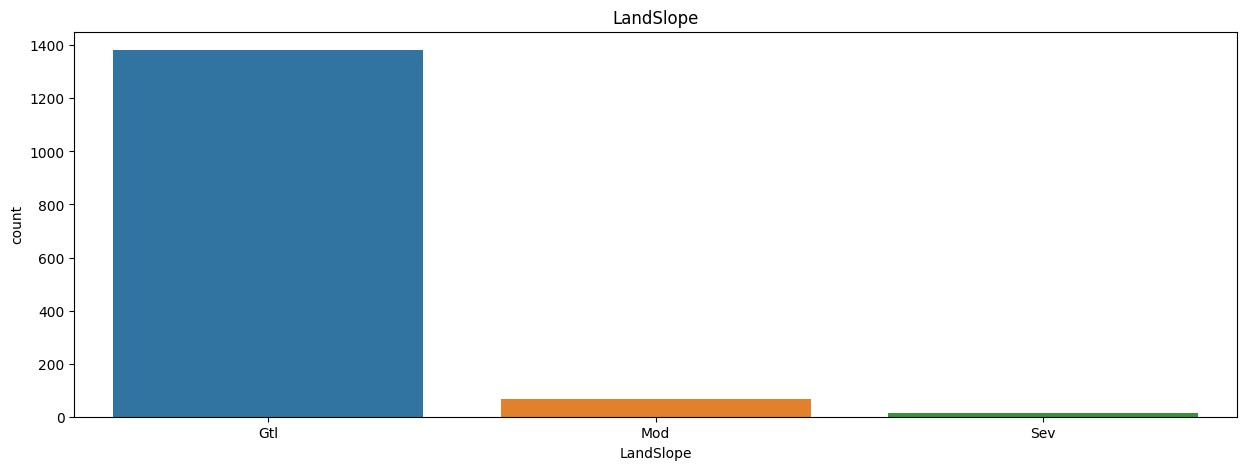

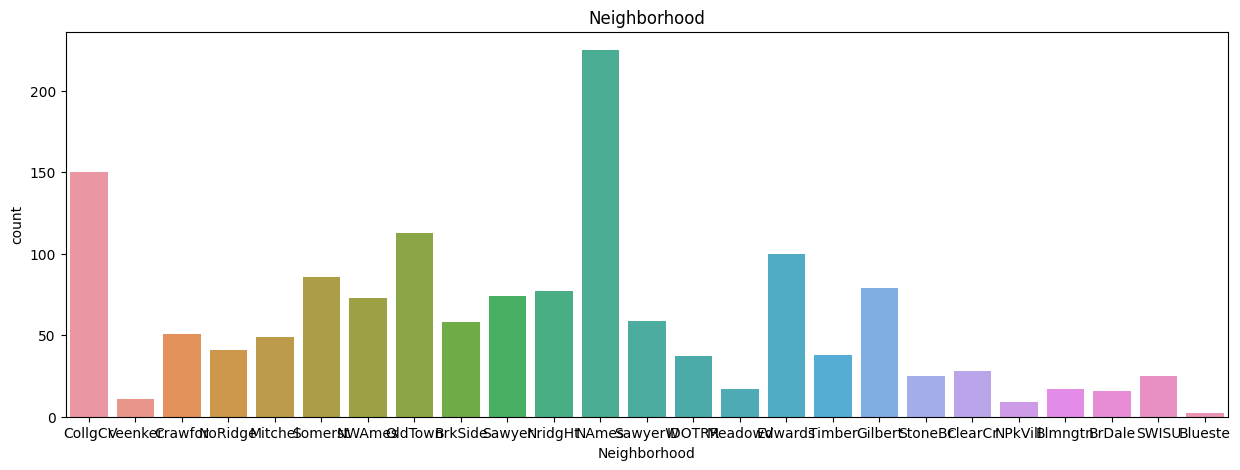

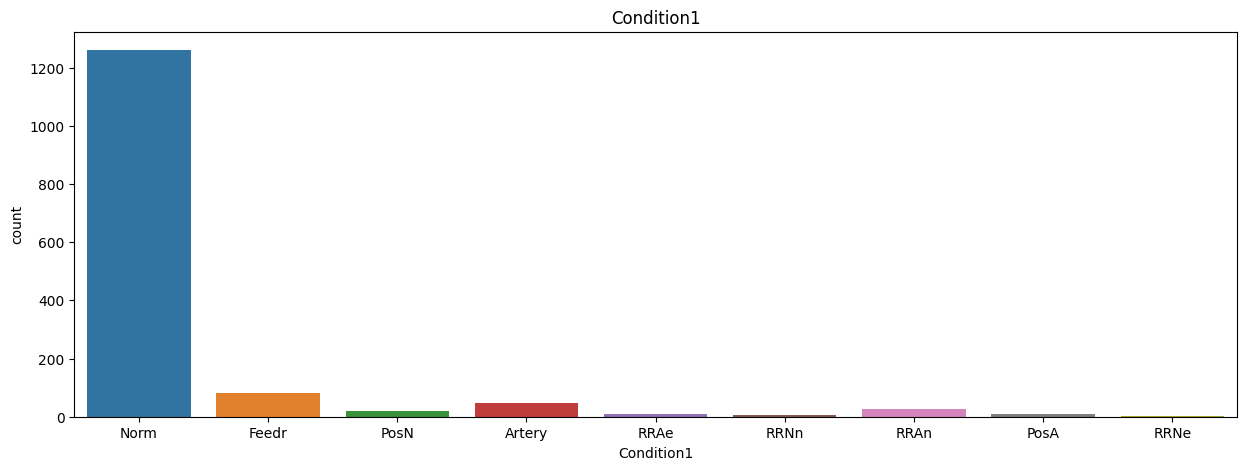

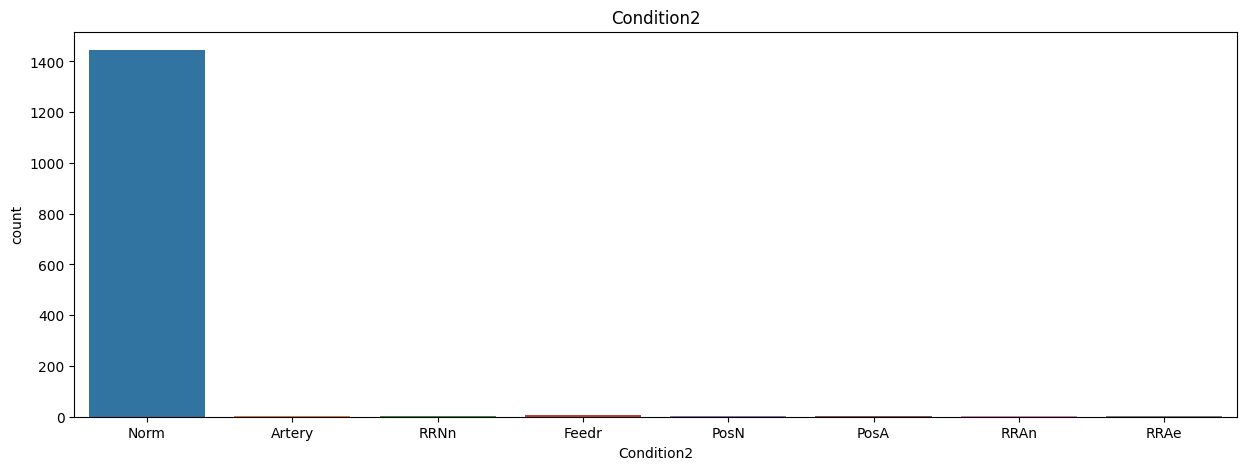

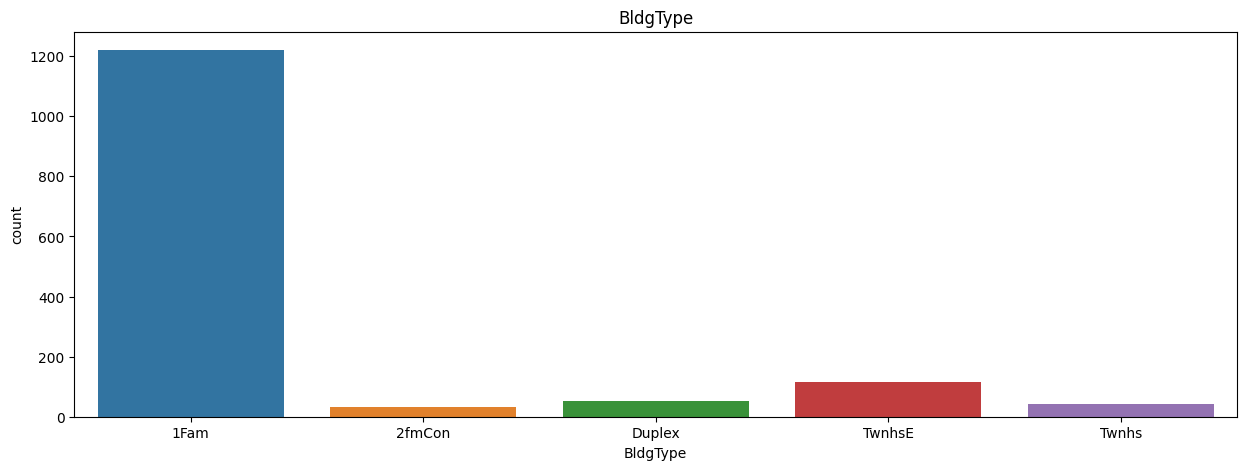

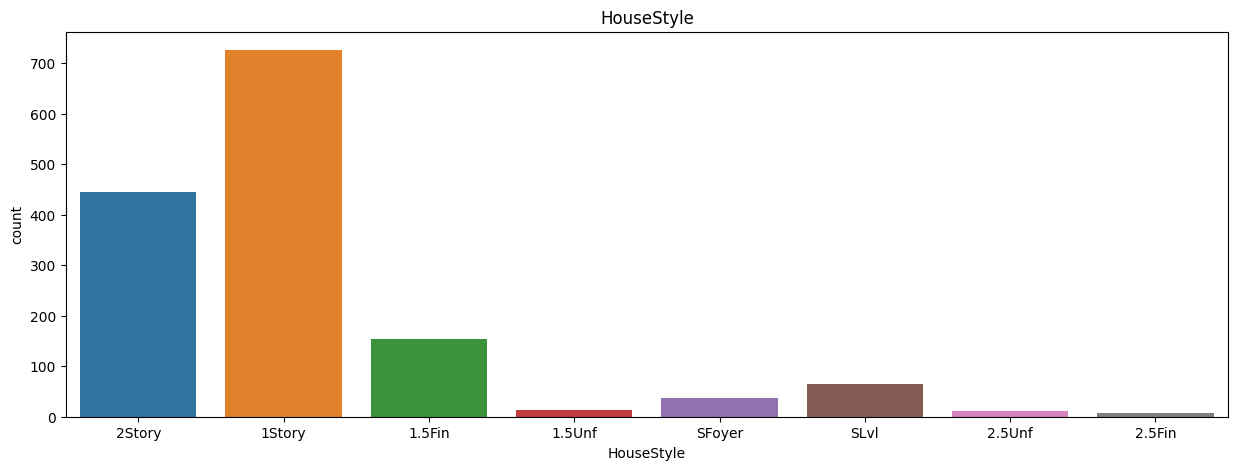

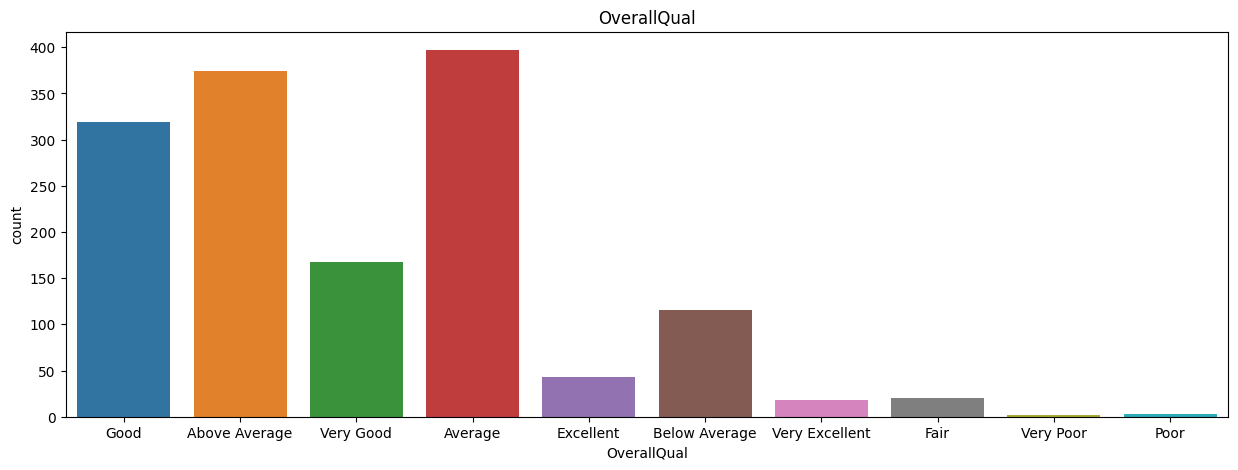

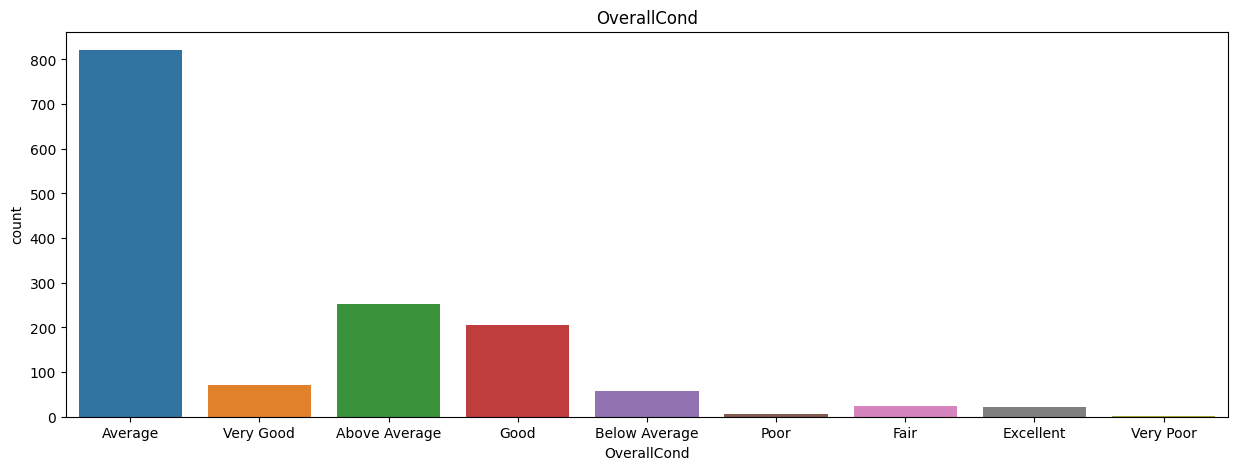

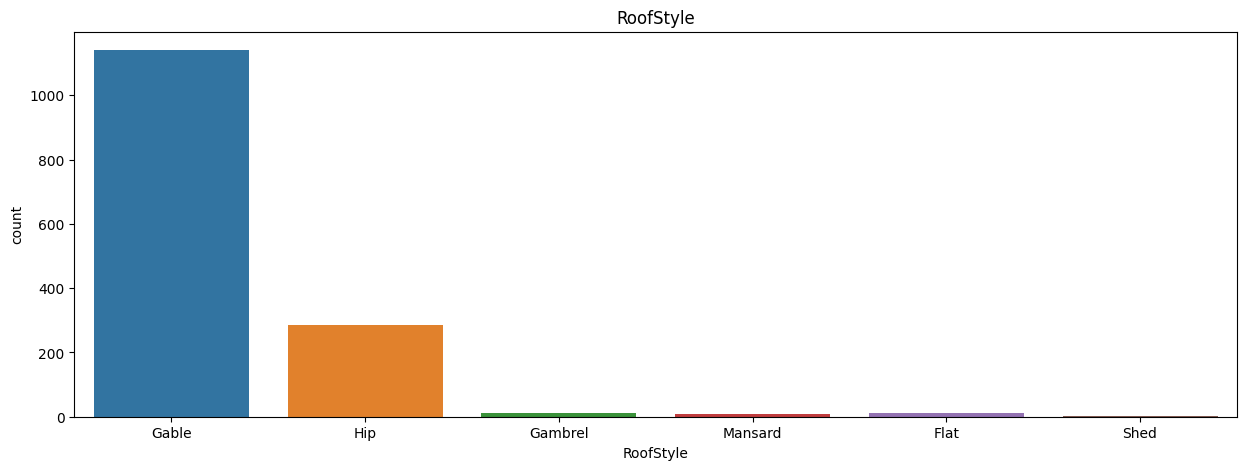

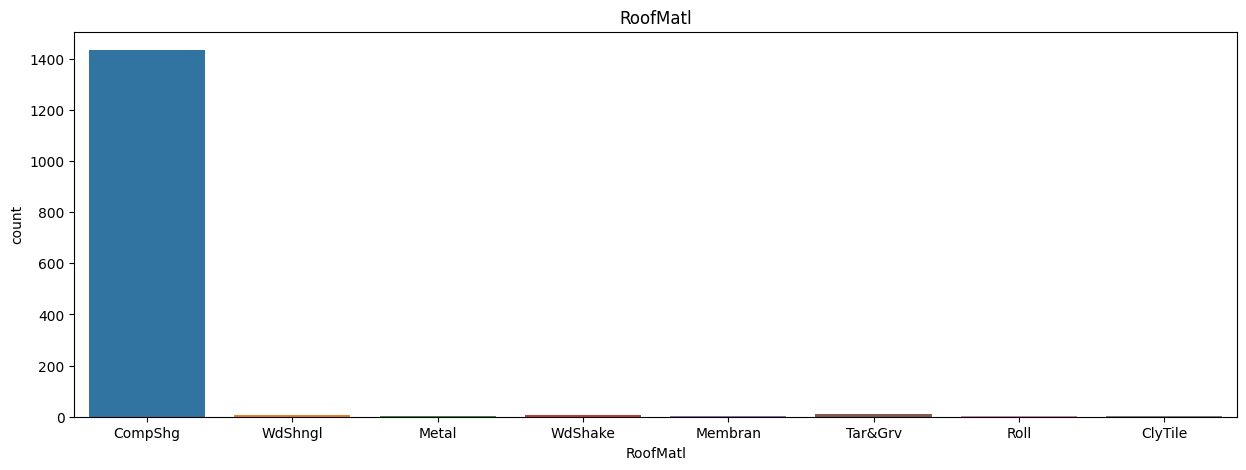

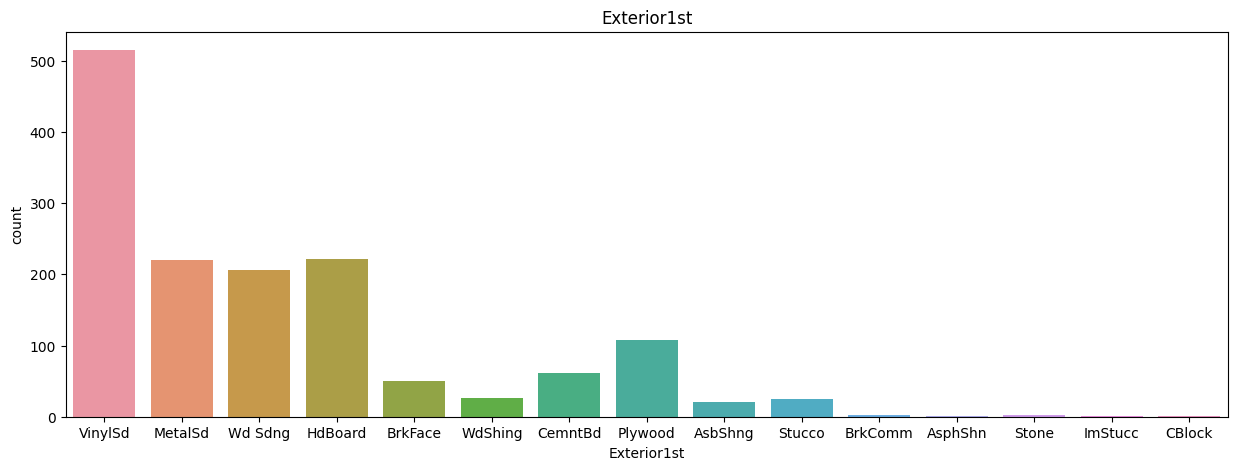

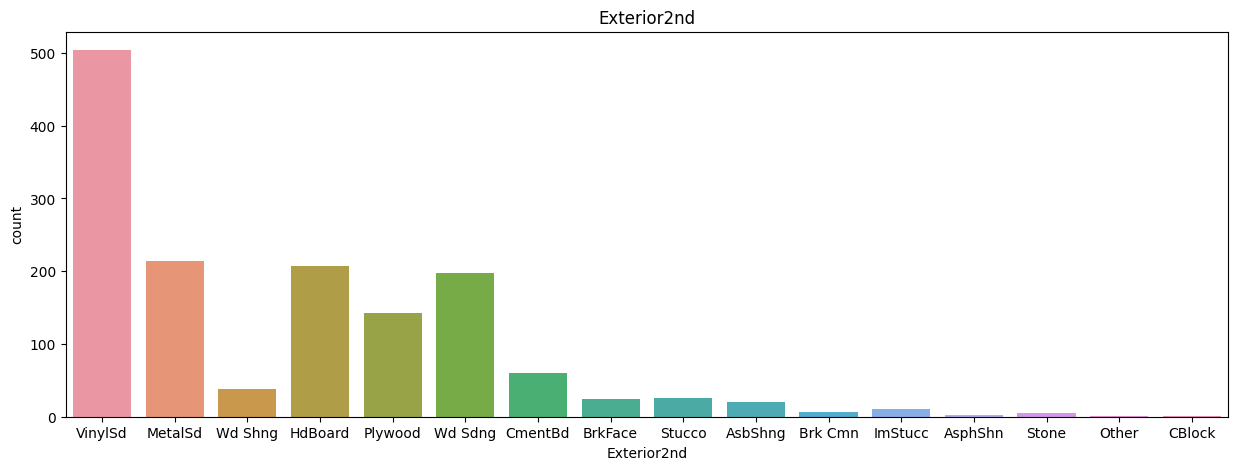

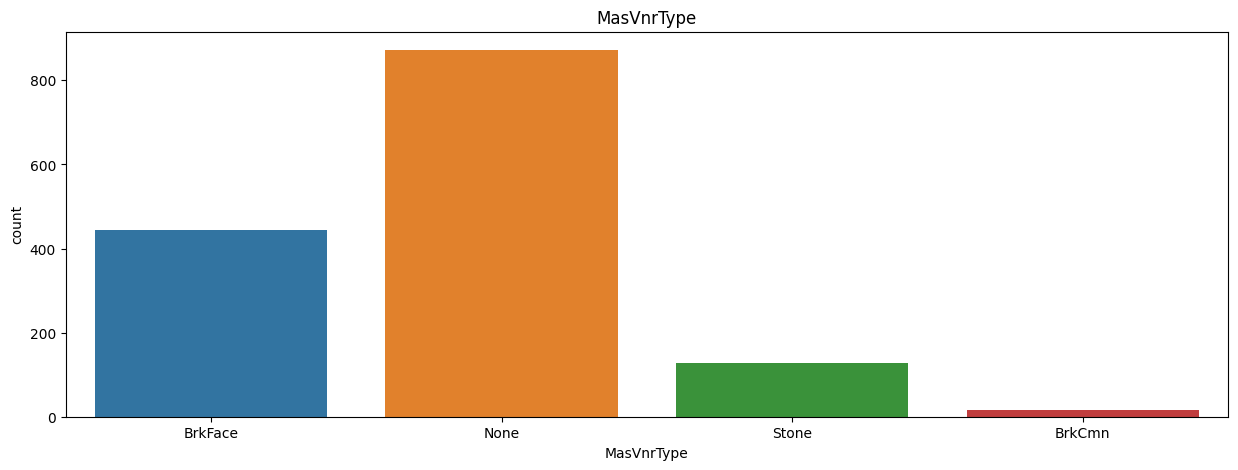

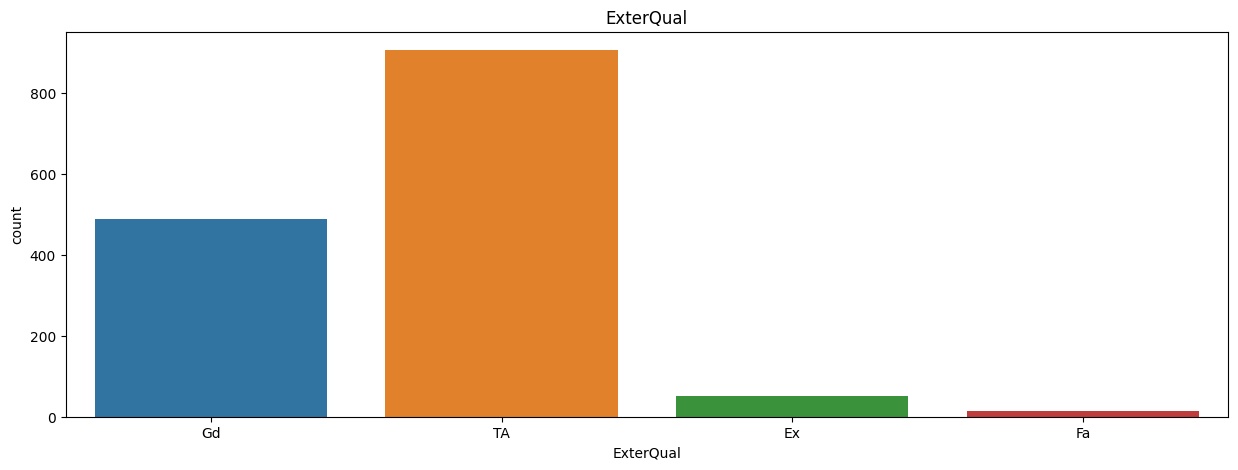

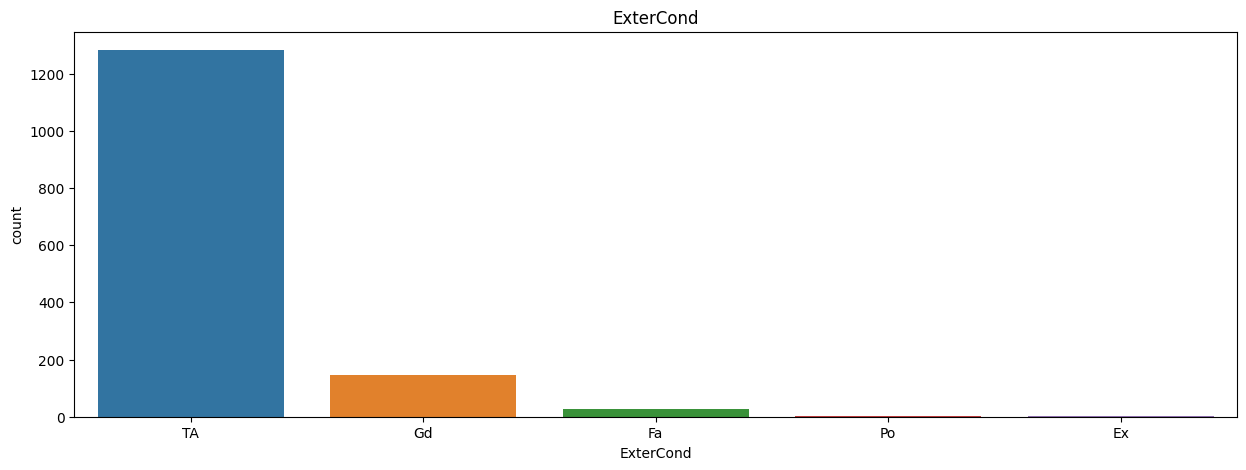

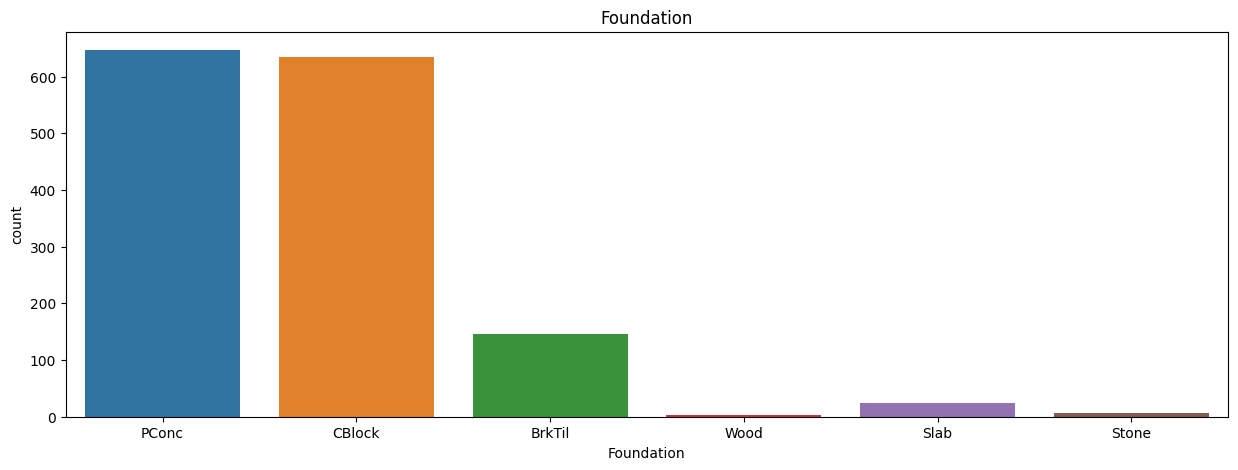

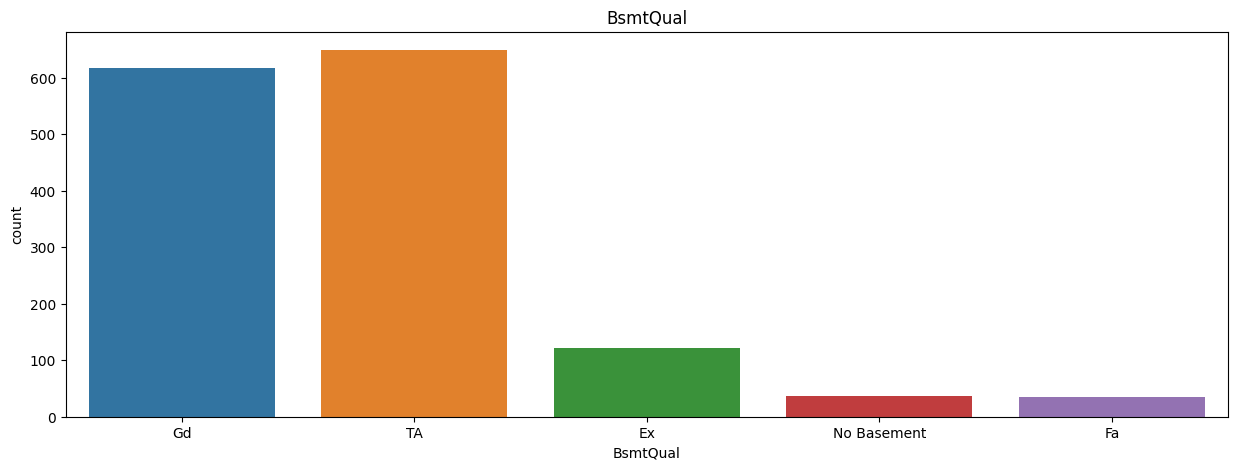

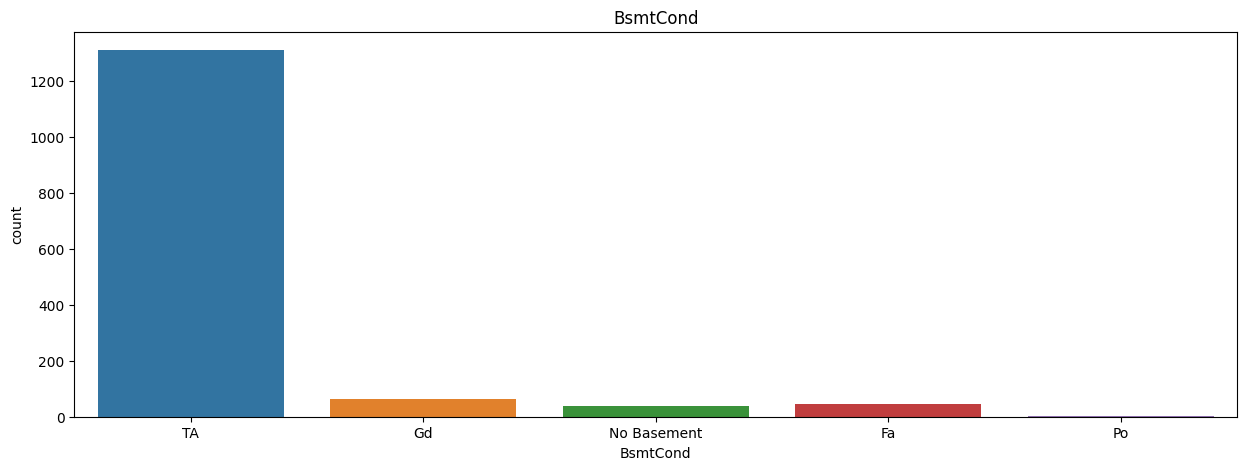

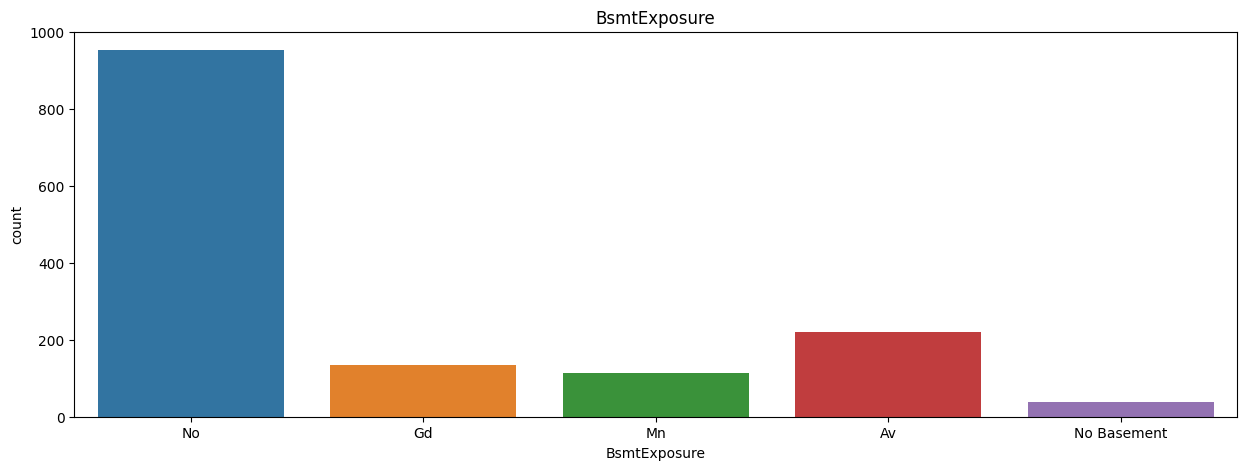

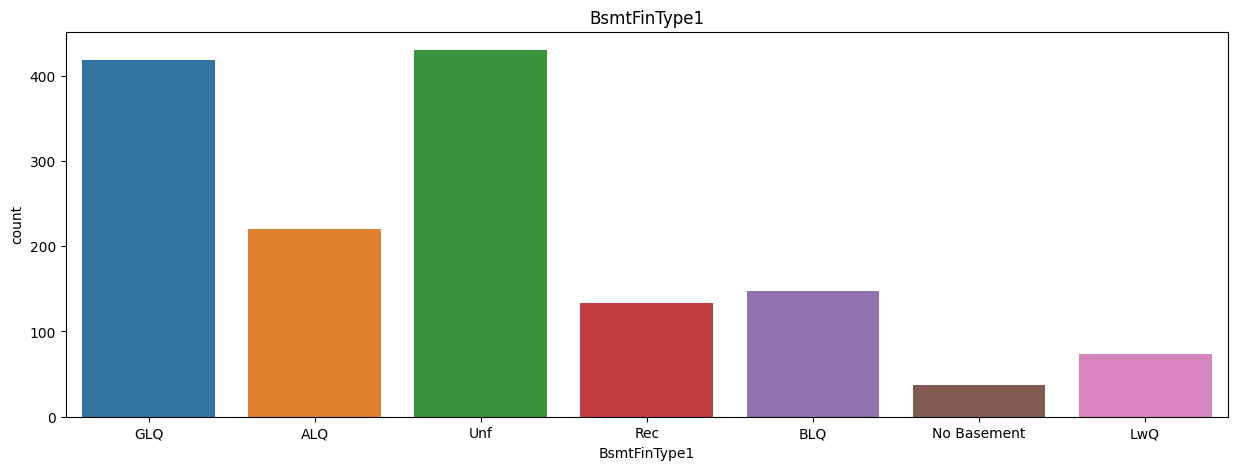

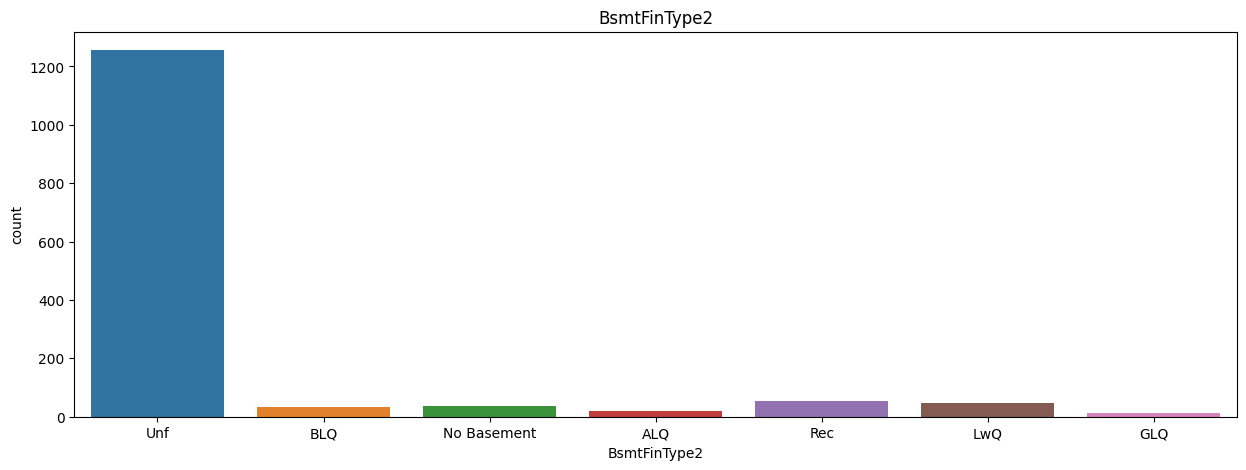

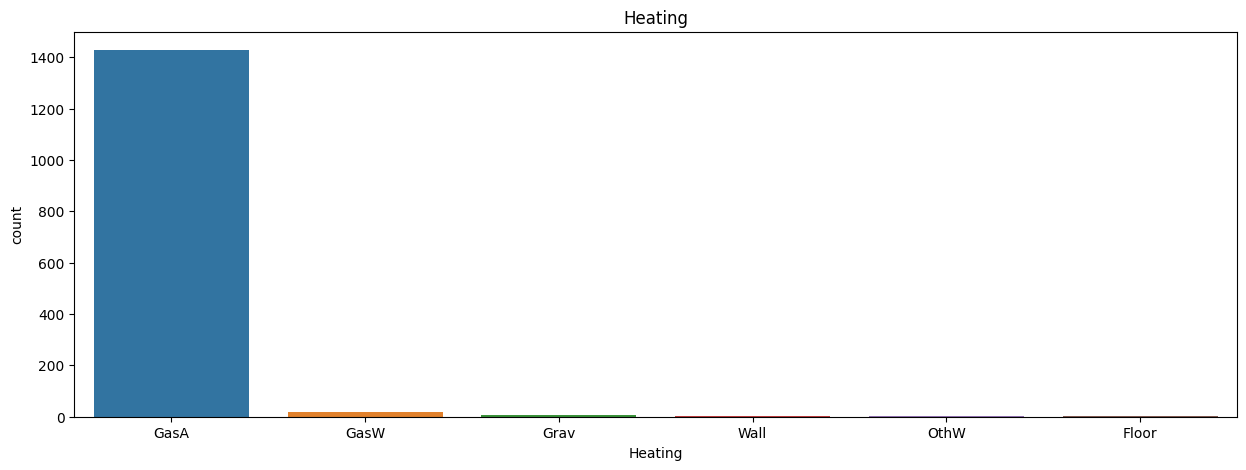

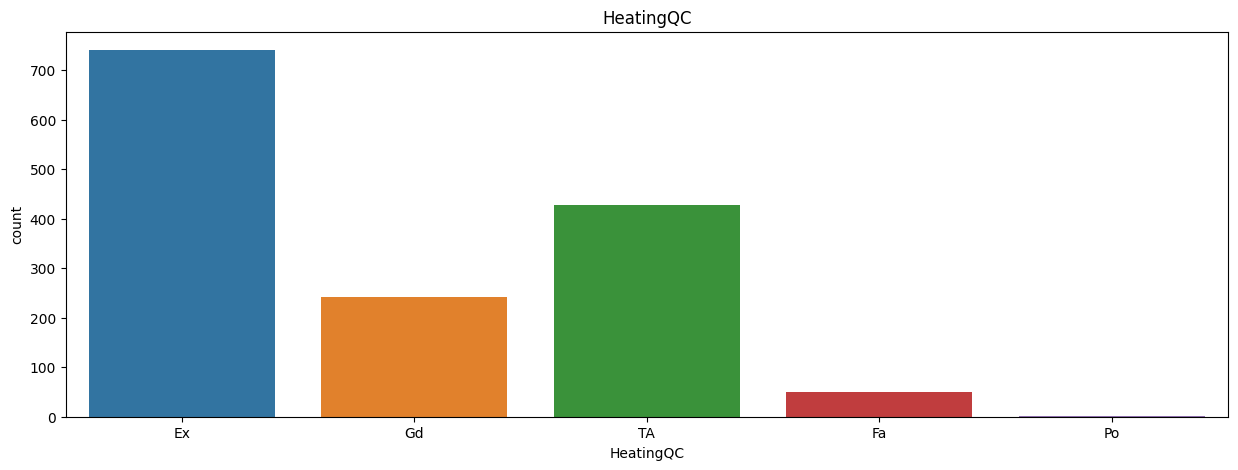

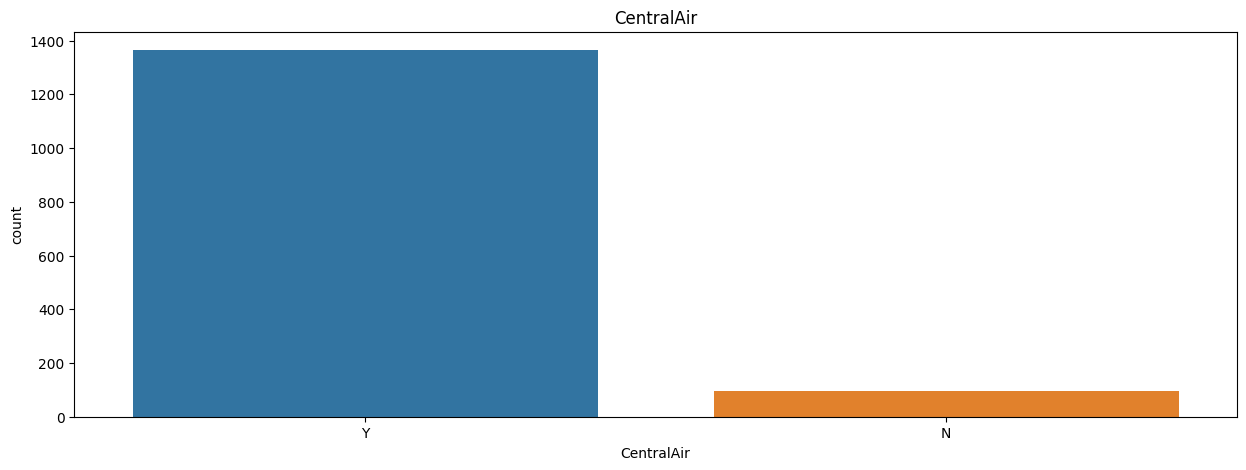

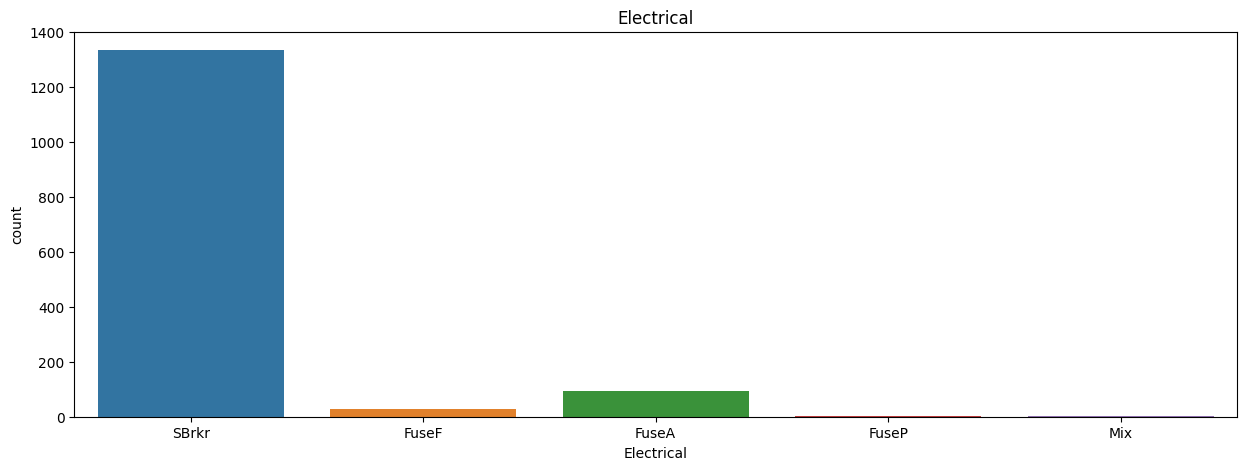

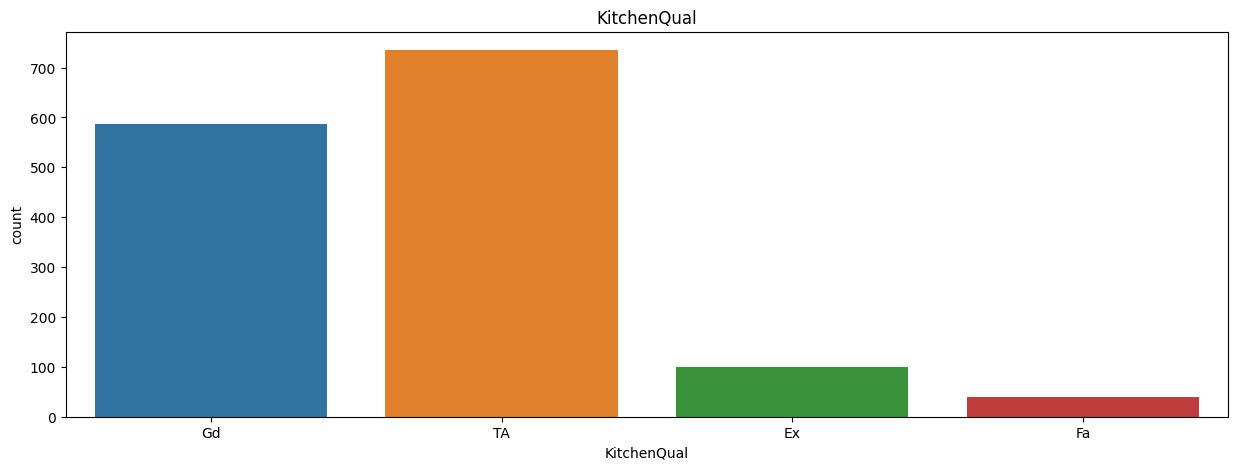

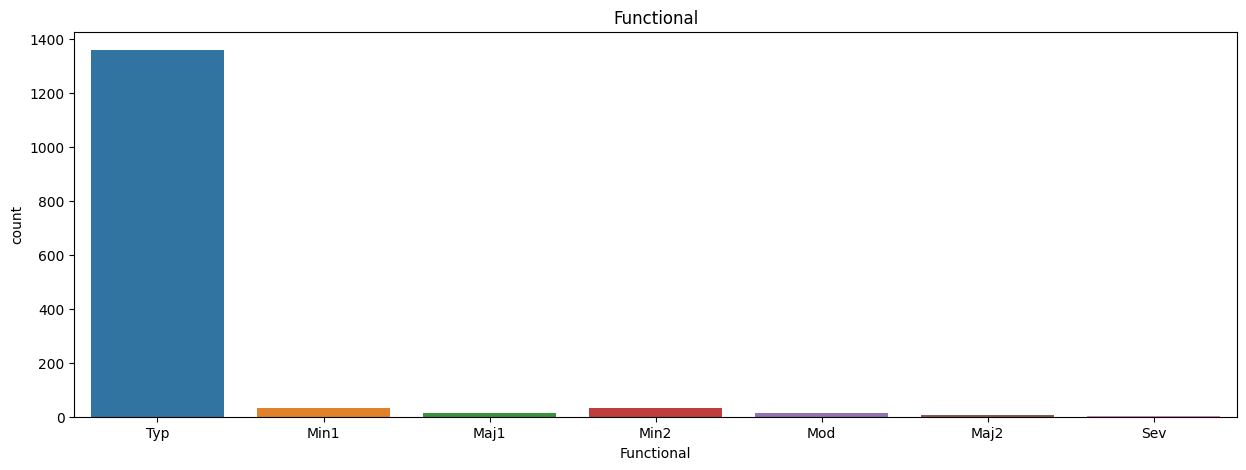

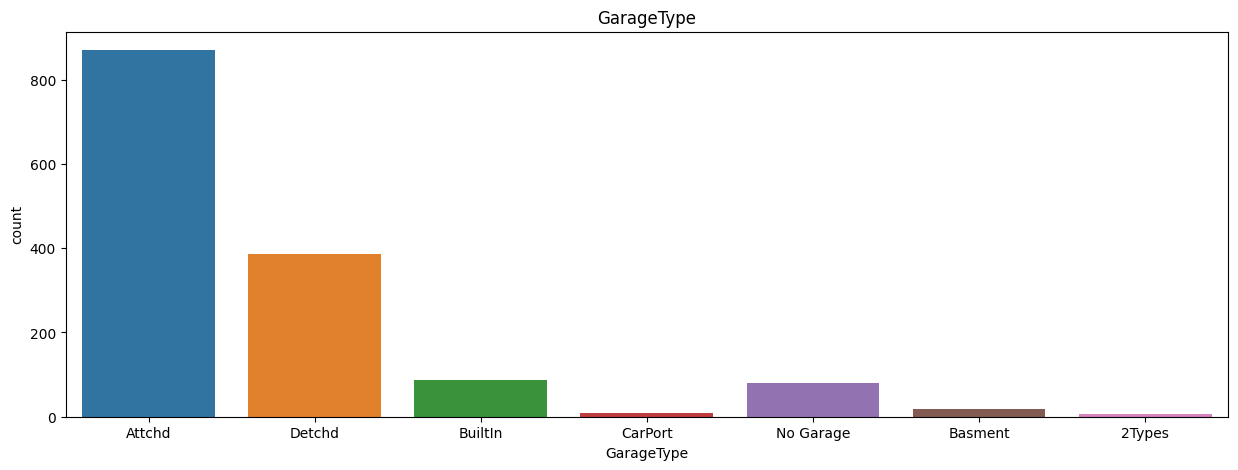

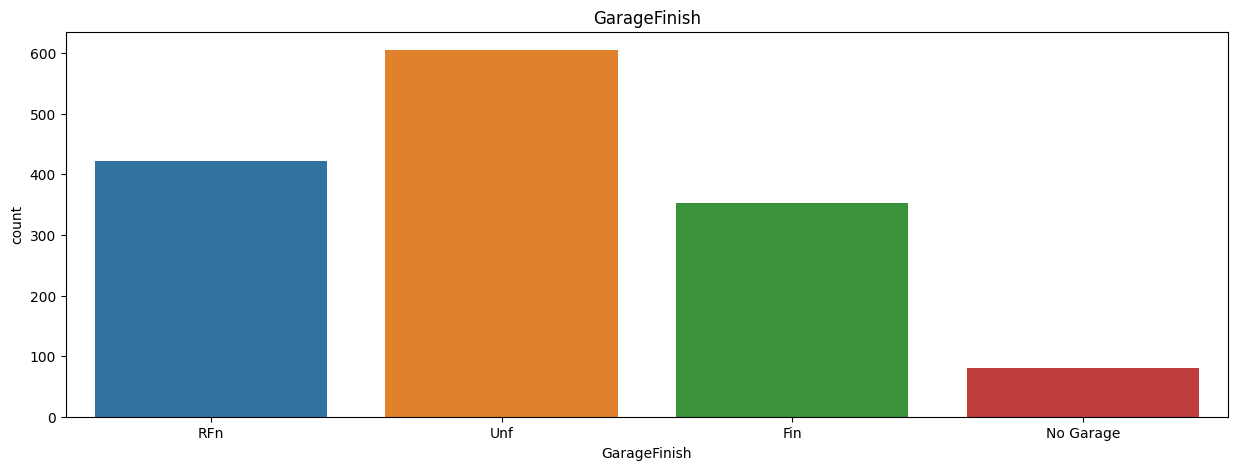

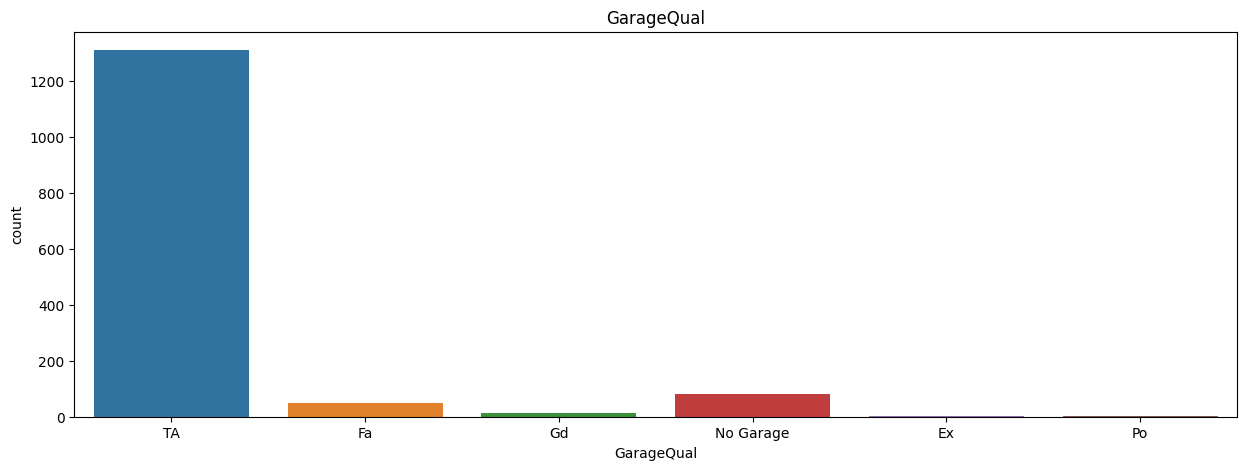

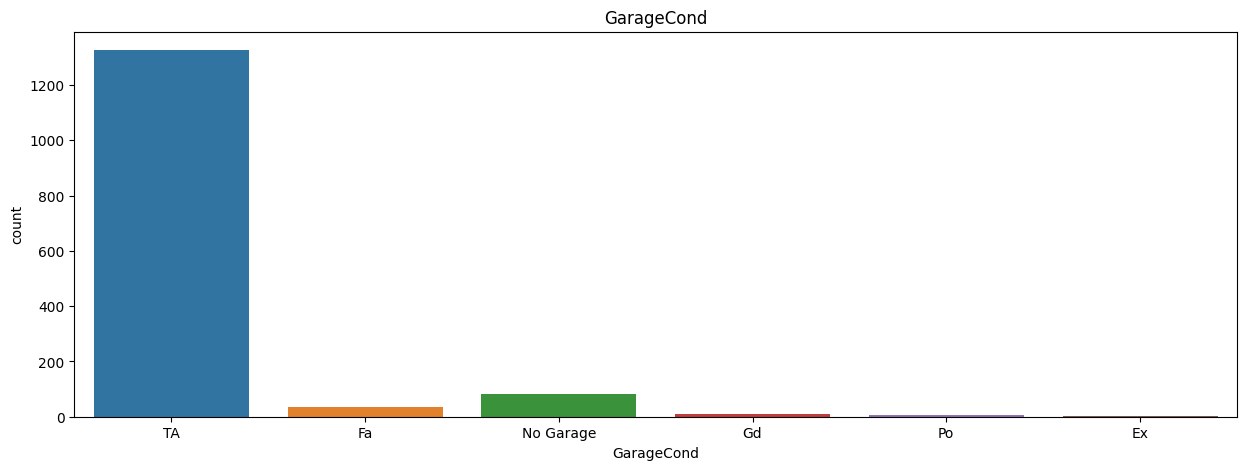

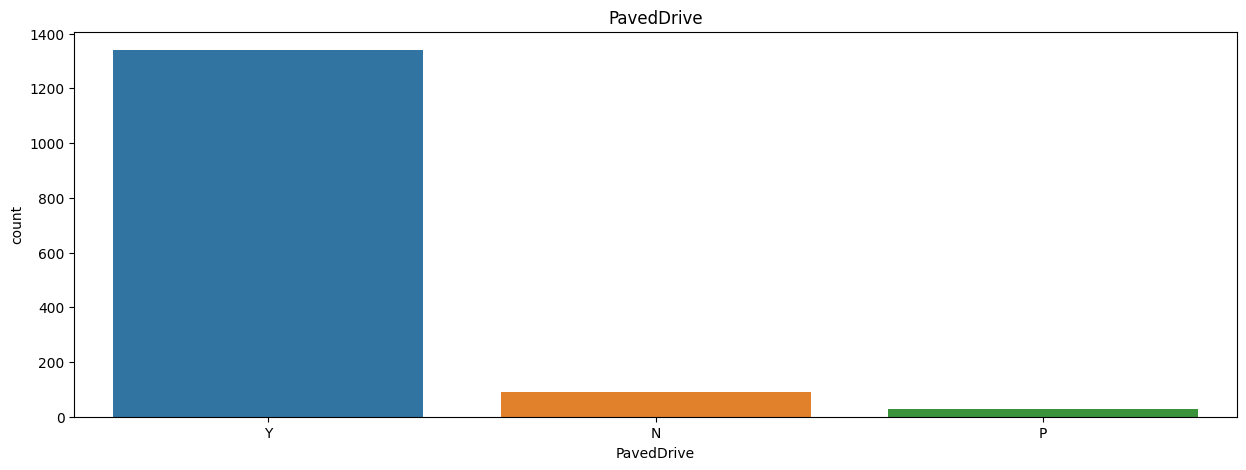

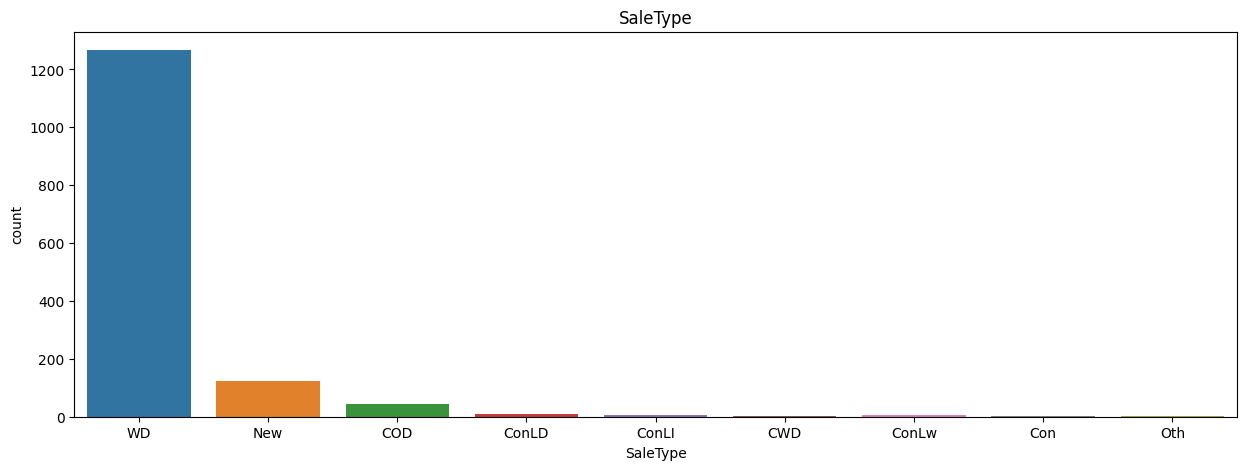

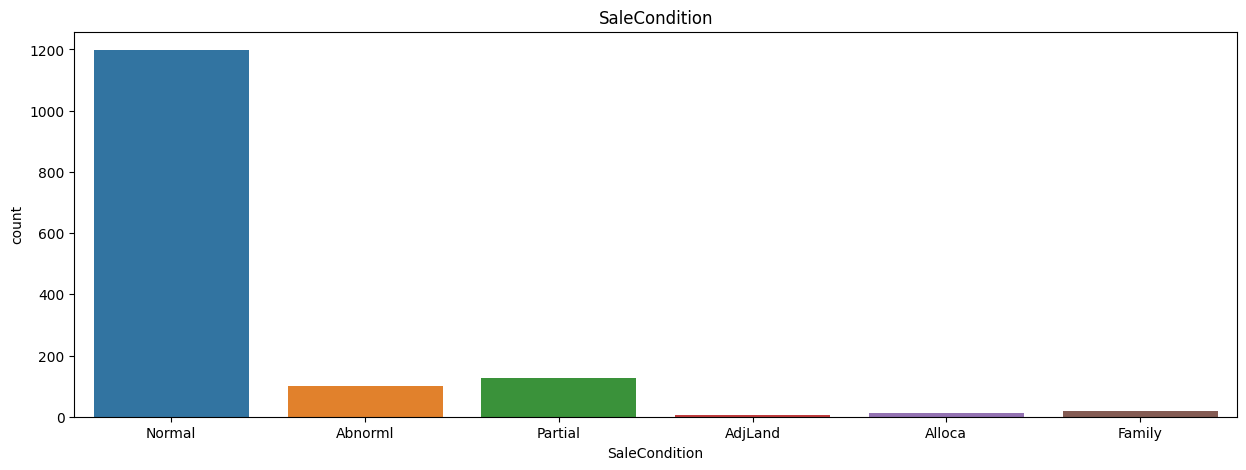

In [197]:
#Conducting univariate analysis for categorical variables
for col in data_cat.columns:
  plt.figure(figsize =(15,5))
  plt.title(col)
  sns.countplot(x=col, data=data_cat)
  plt.show()

In [198]:
# Dropping highly skewed column
data.drop(['Functional'],axis=1,inplace=True)

In [203]:
data.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

In [204]:
data['GarageType'] = data['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
data['SaleCondition'] = data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

In [205]:
data['Foundation'] = data['Foundation'].replace(['Slab','Stone','Wood'],'Others')
# Dropping highly skewed column
data.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

In [206]:
data['HouseStyle'] = data['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
data['RoofStyle'] = data['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
data['Exterior1st'] = data['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
data['Exterior2nd'] = data['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

# Dropping highly skewed column
data.drop(['RoofMatl'],axis=1,inplace=True)

In [207]:
data.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

In [208]:
data.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

data['MSZoning'] = data['MSZoning'].replace(['RH','C (all)'],'Others')

In [209]:
data.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

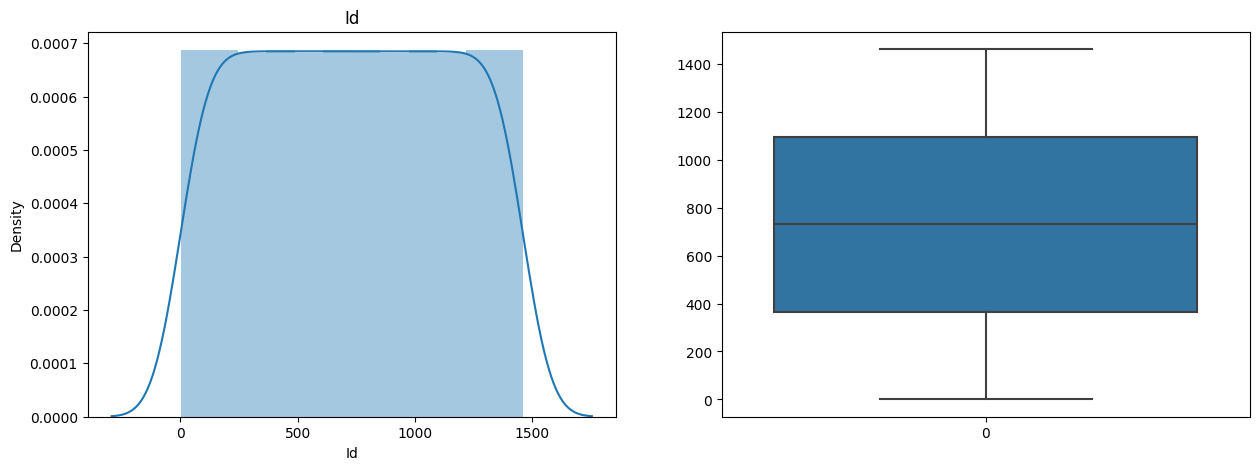

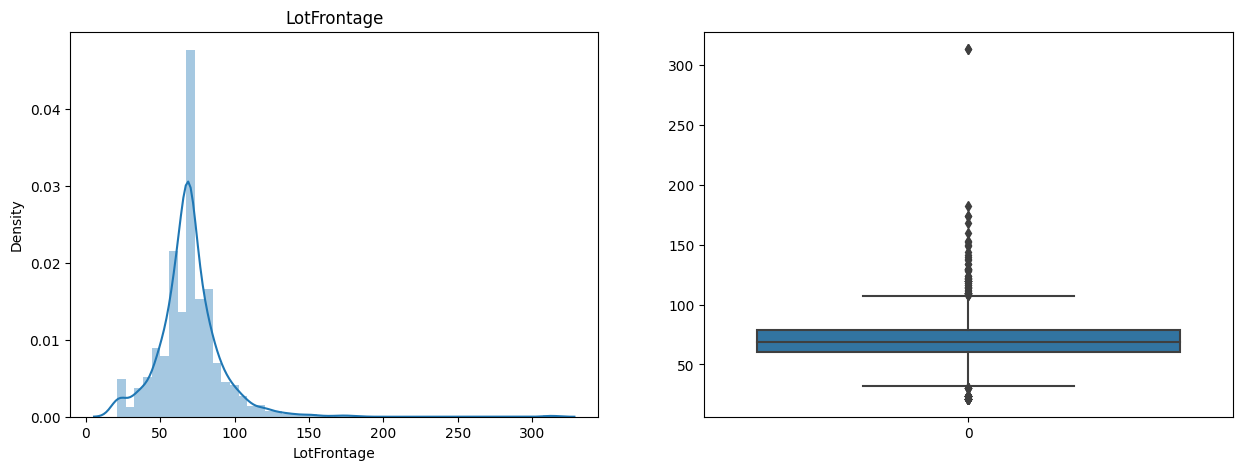

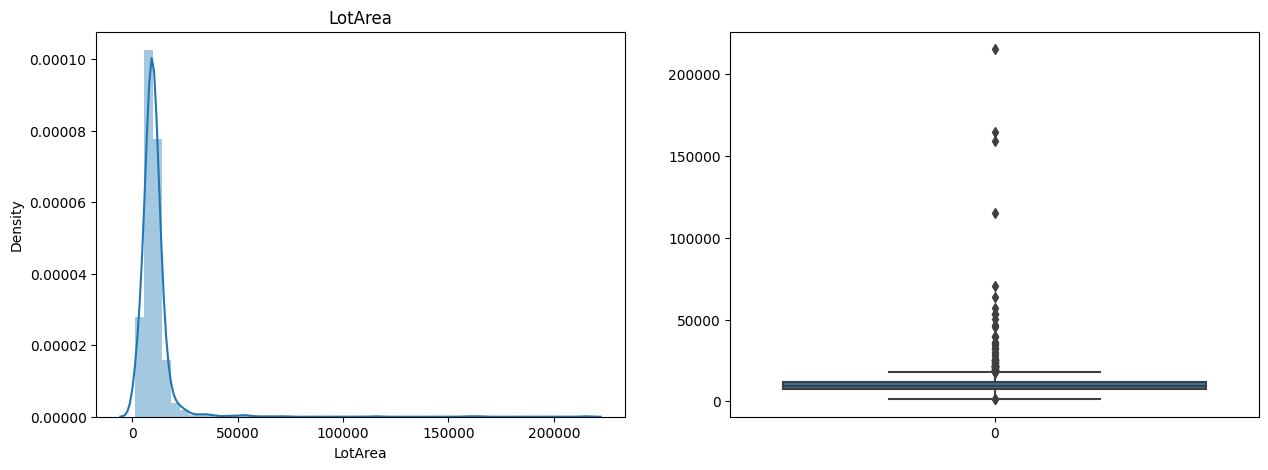

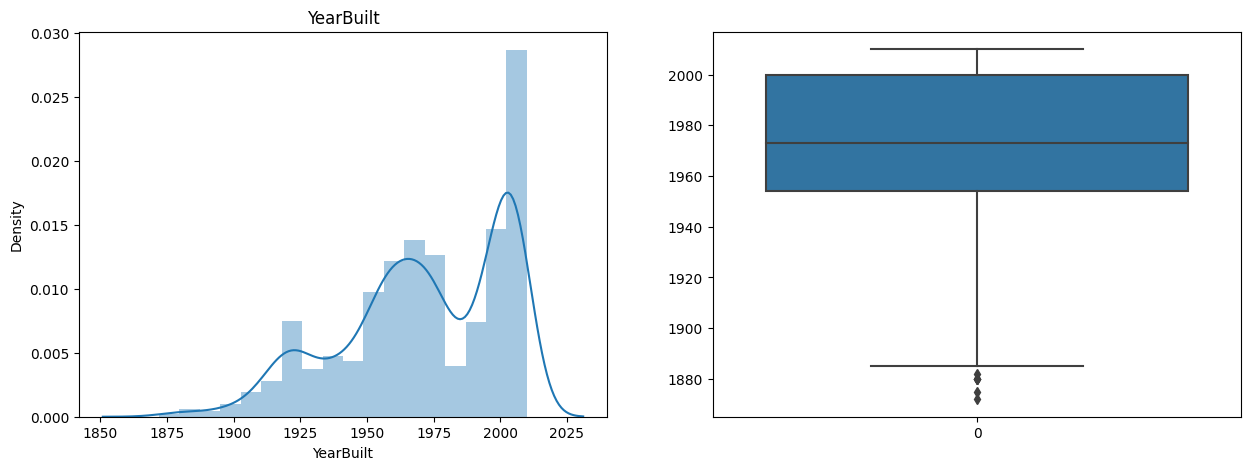

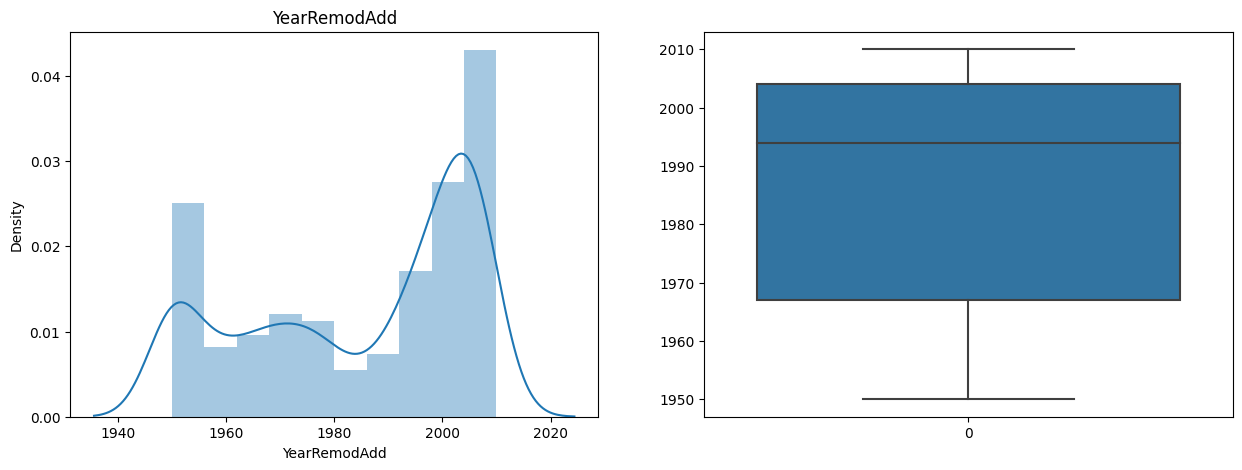

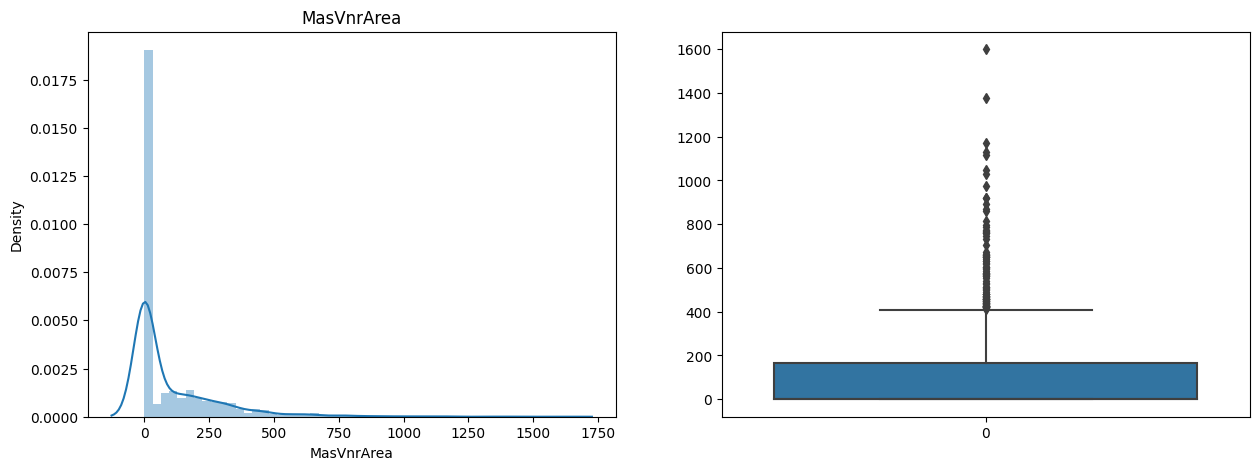

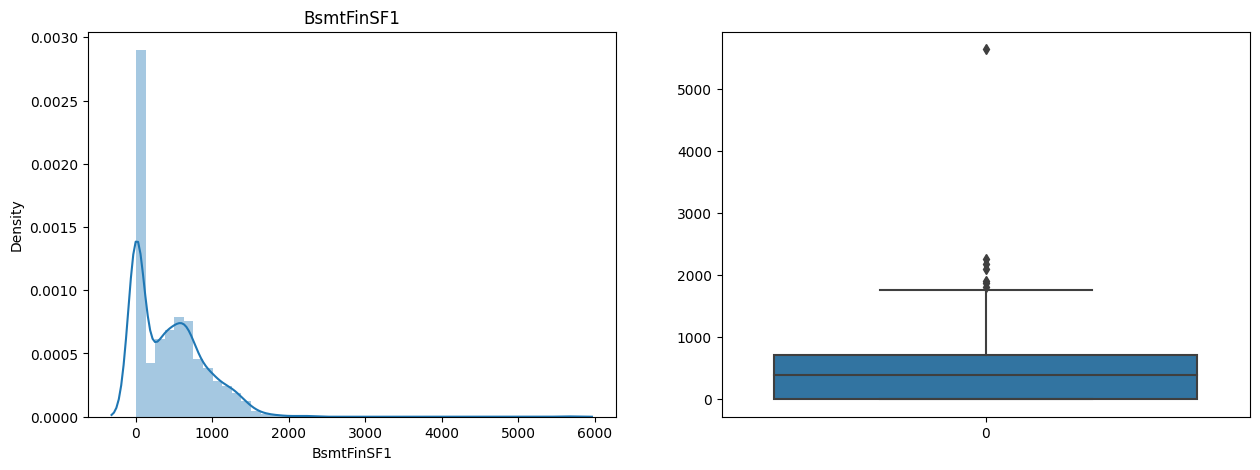

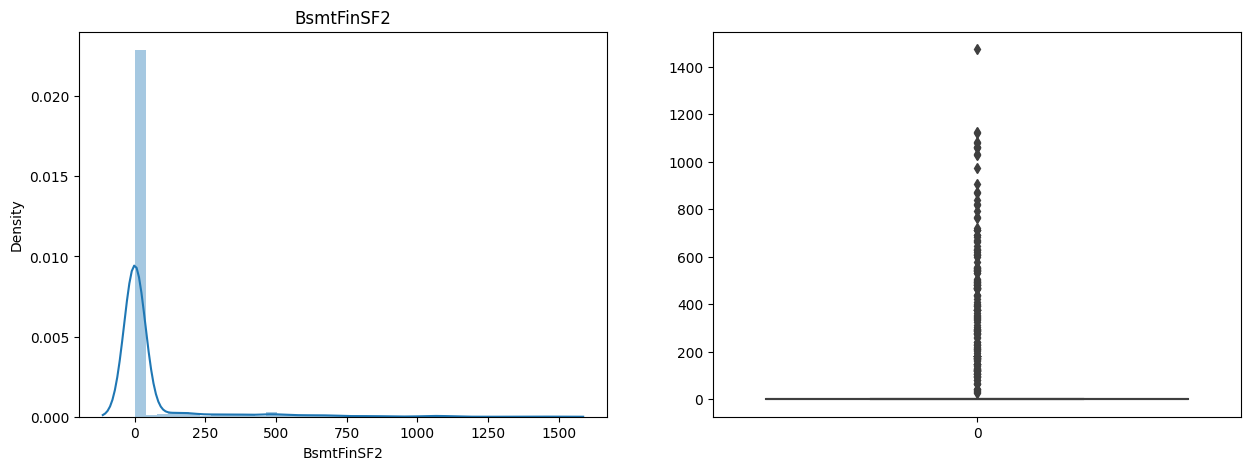

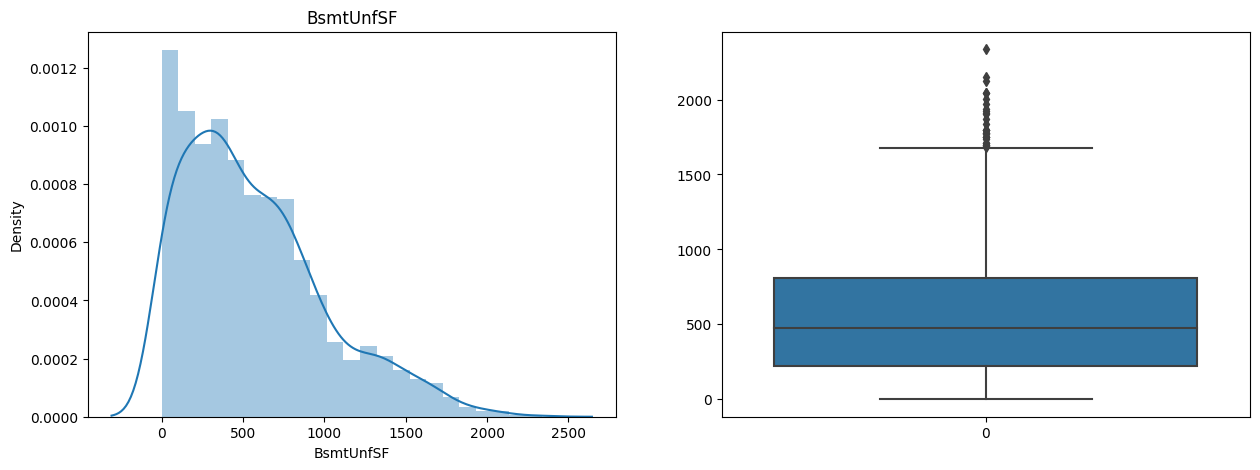

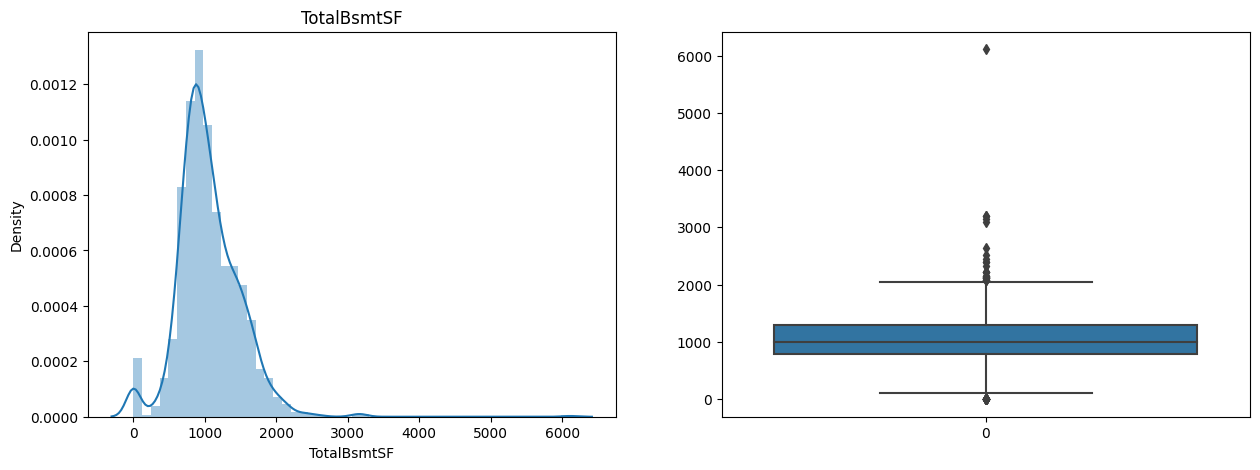

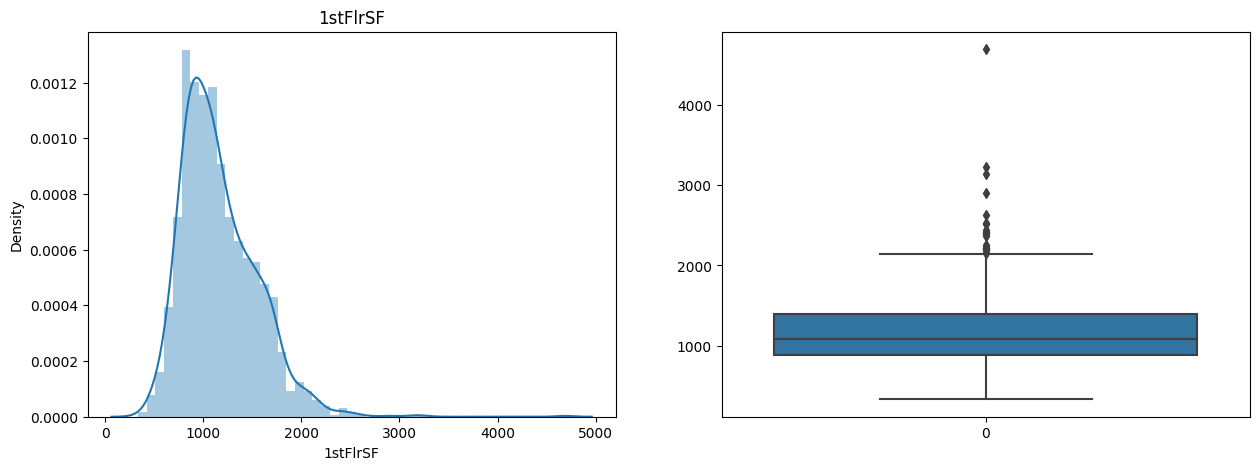

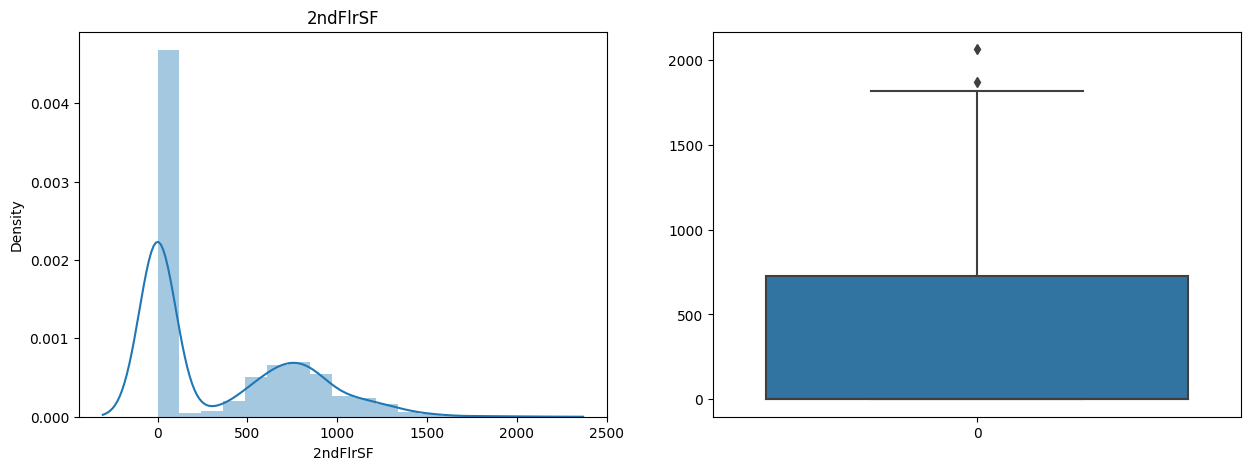

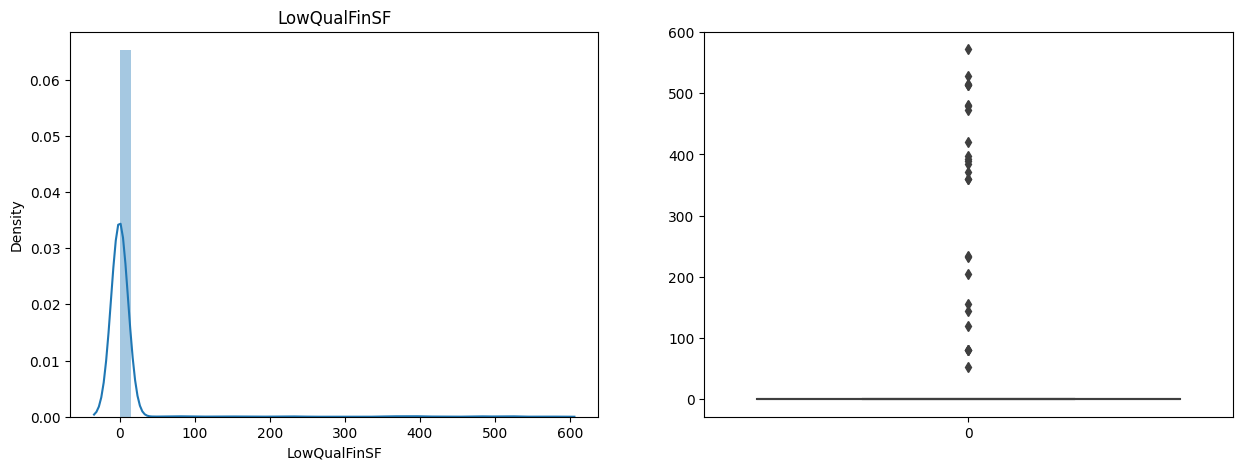

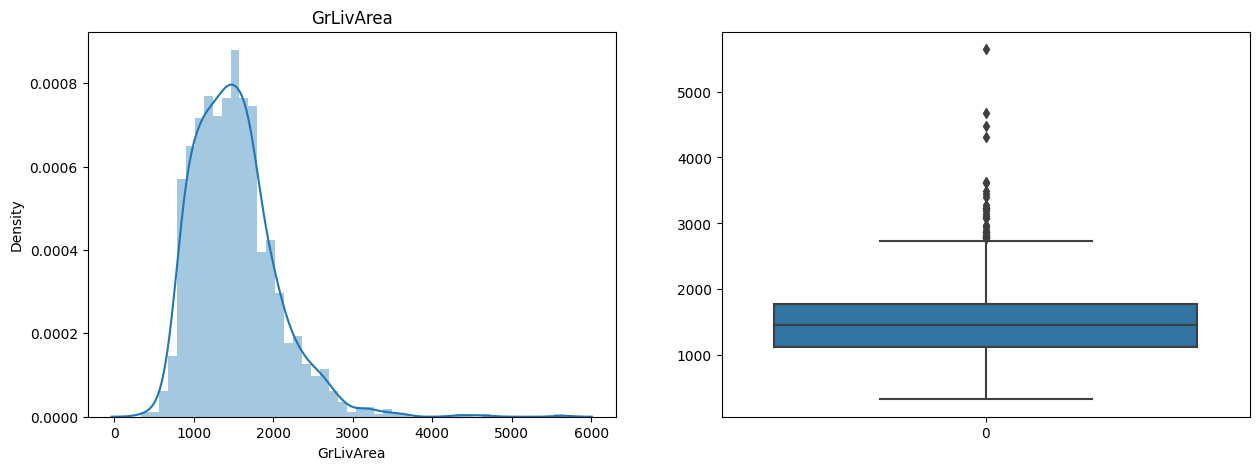

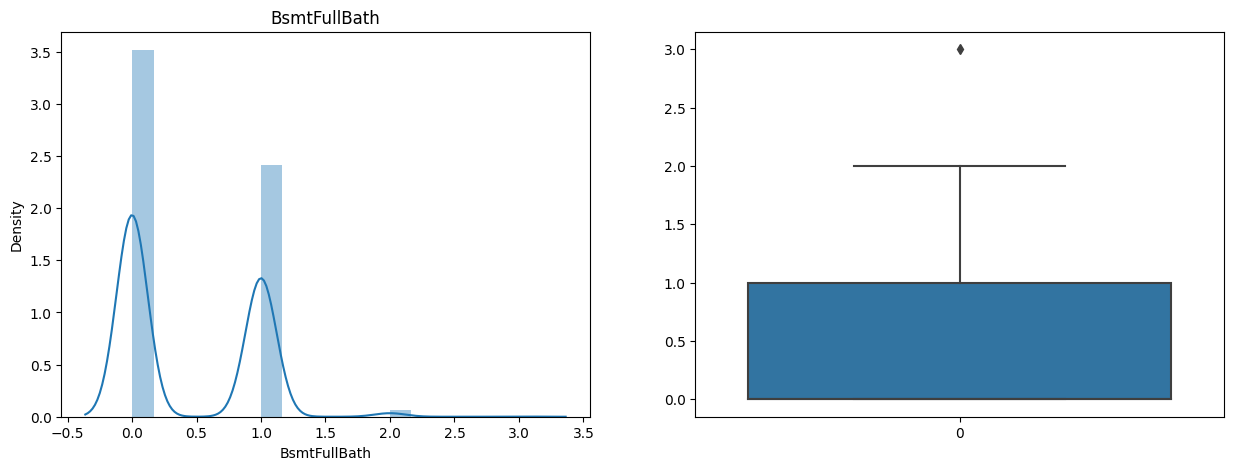

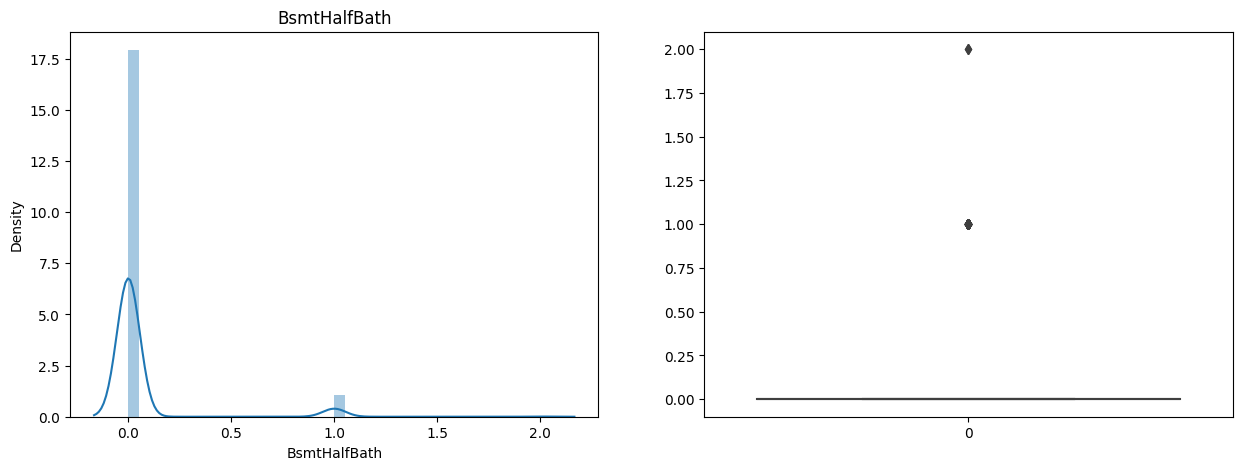

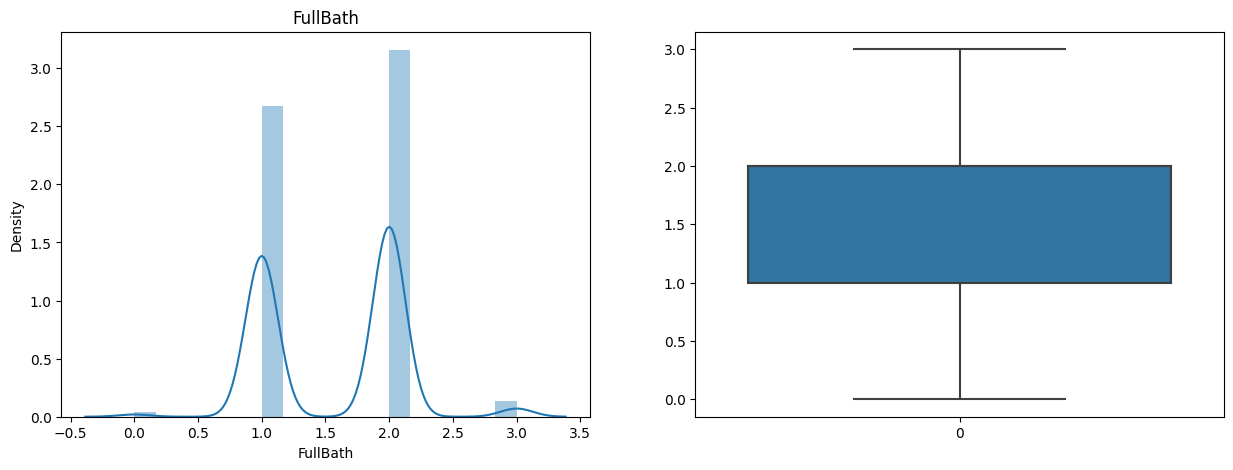

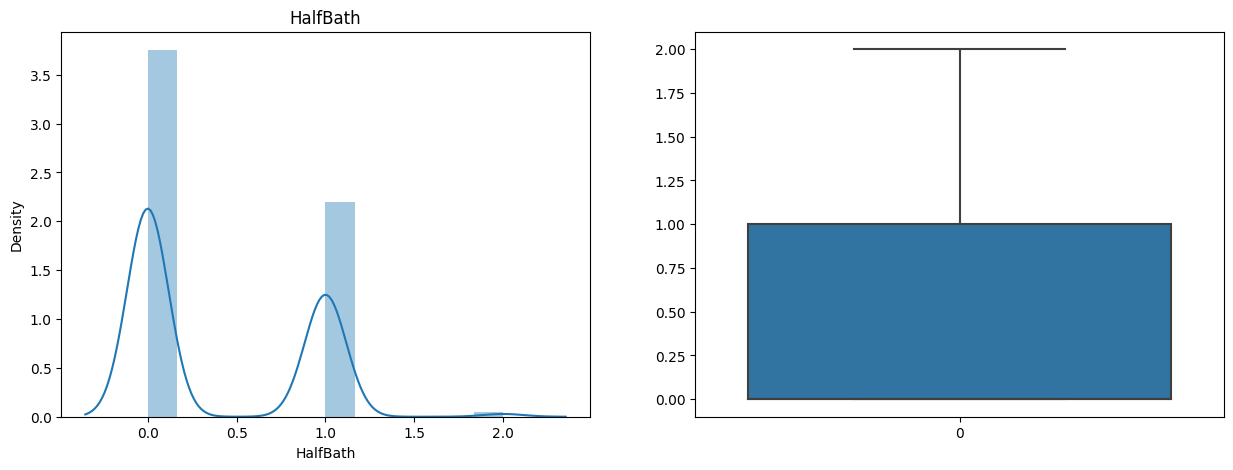

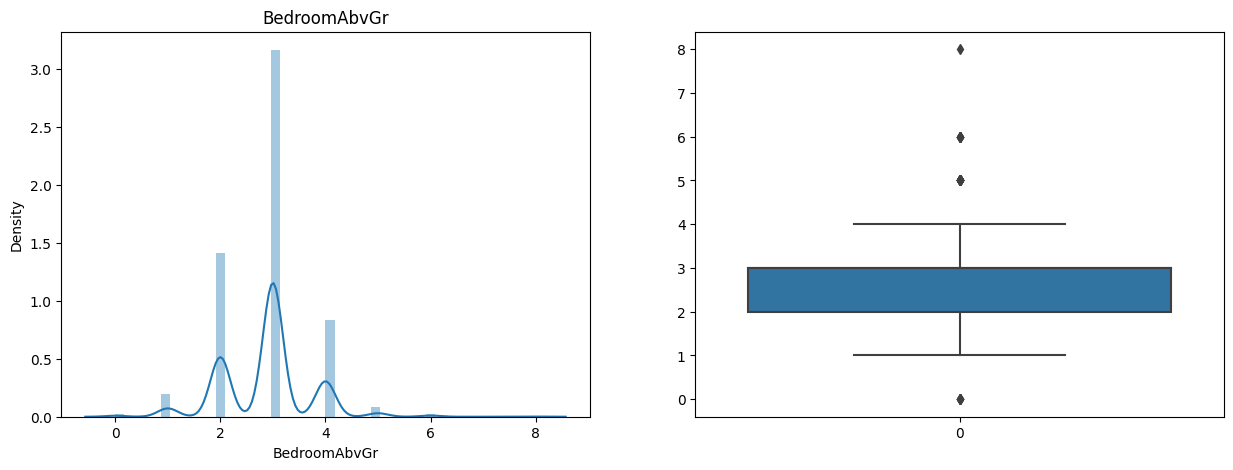

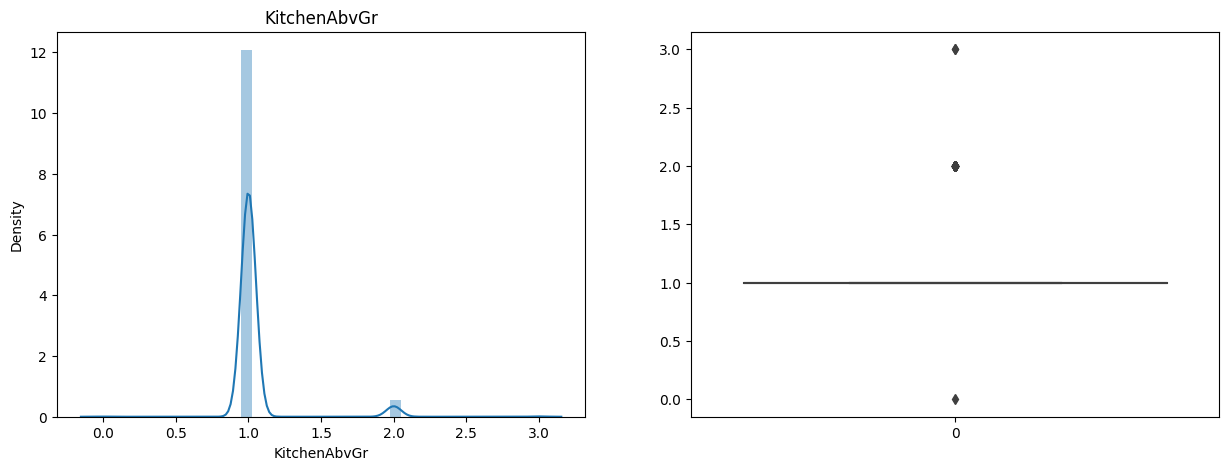

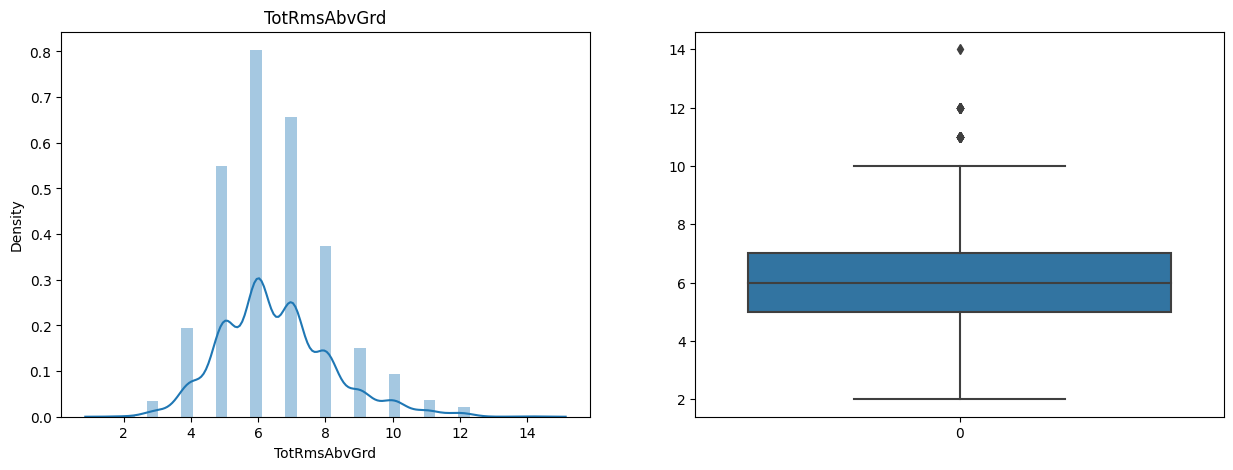

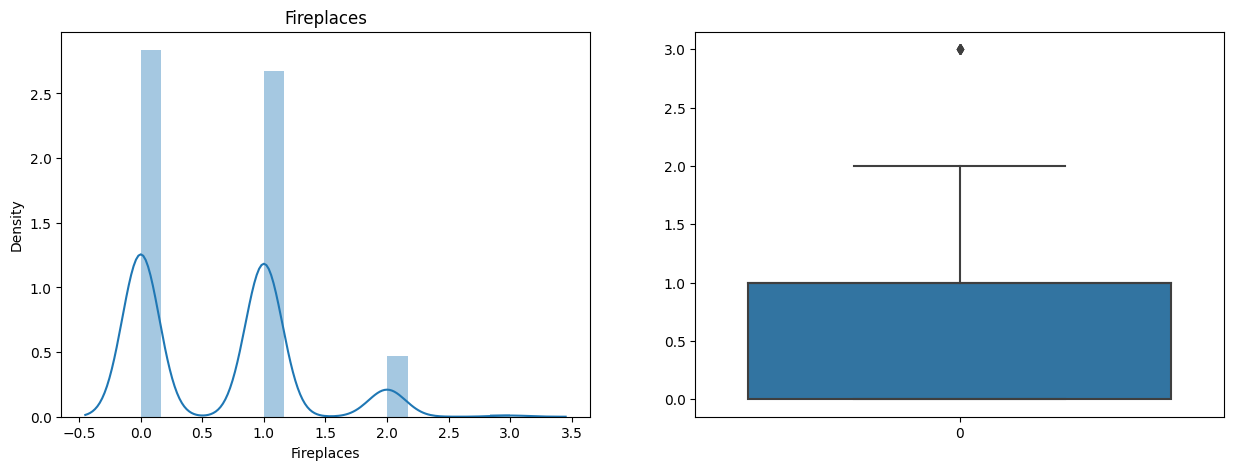

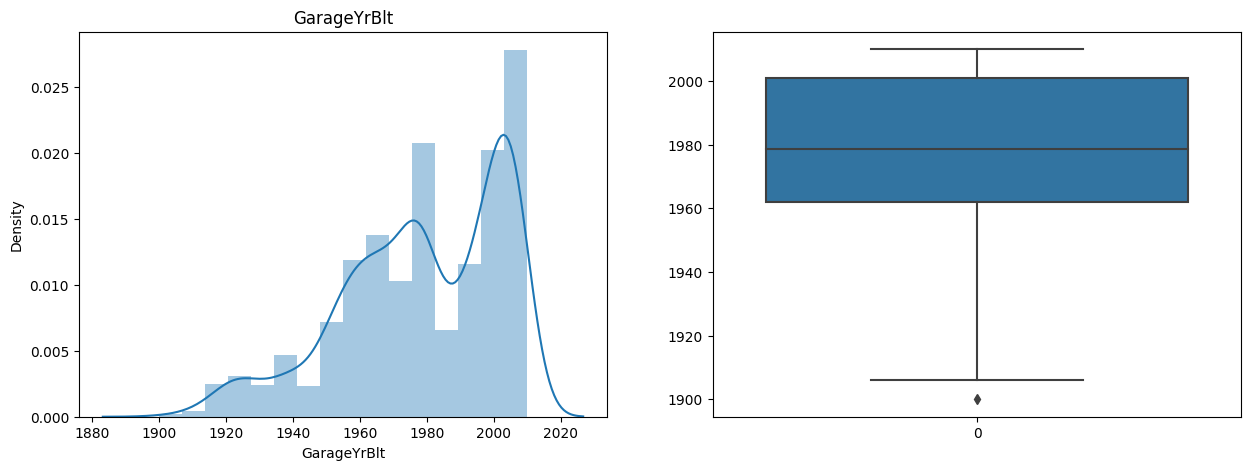

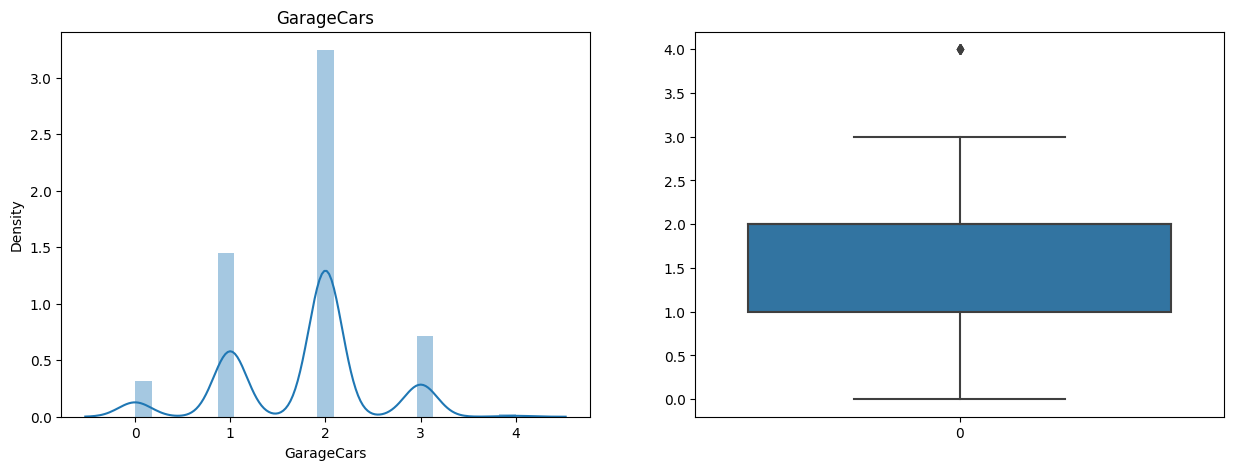

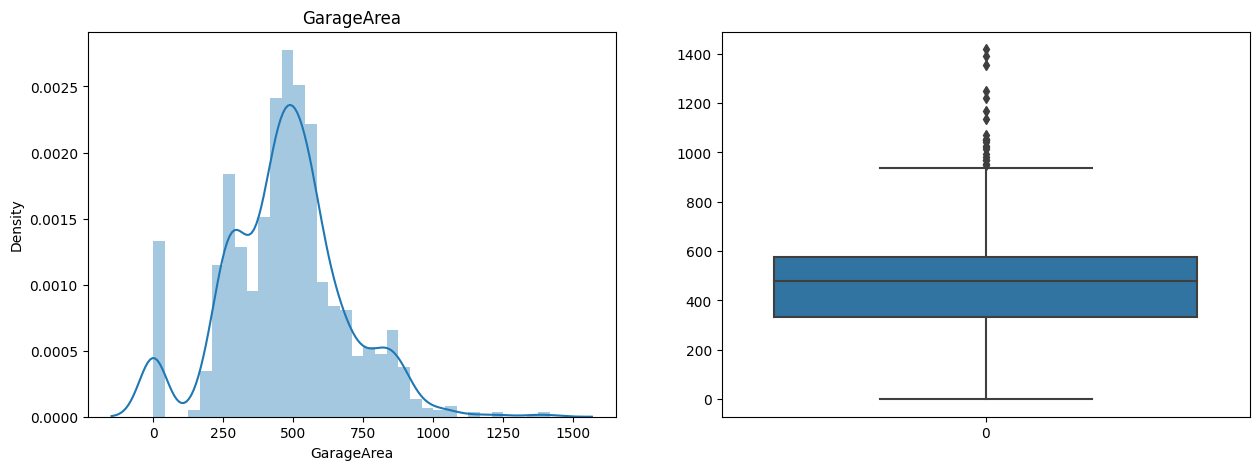

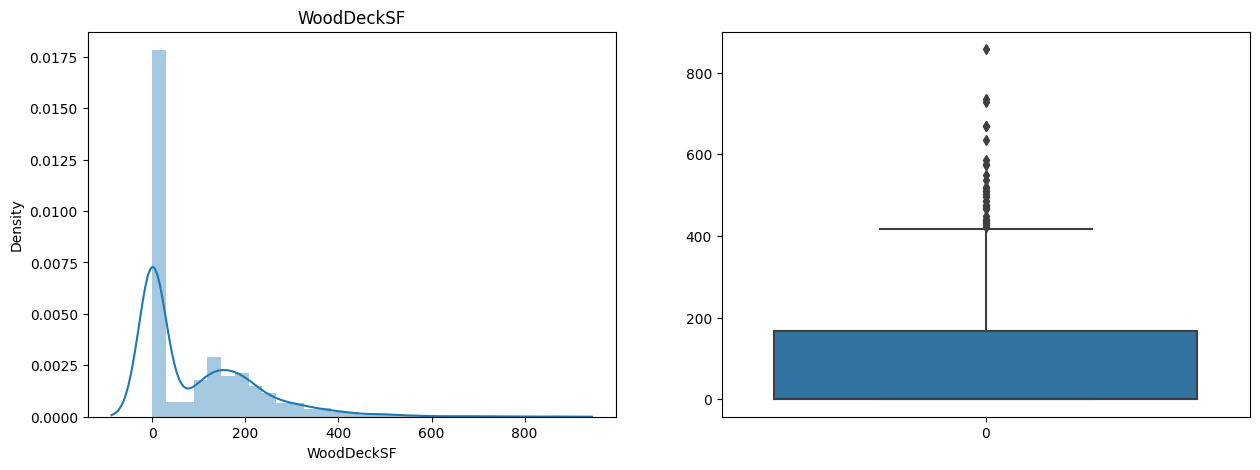

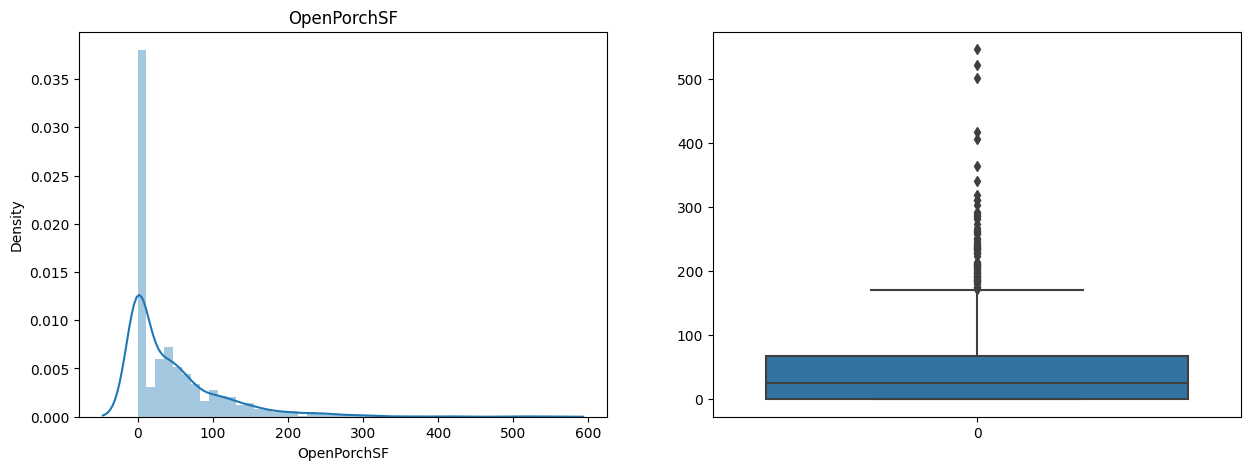

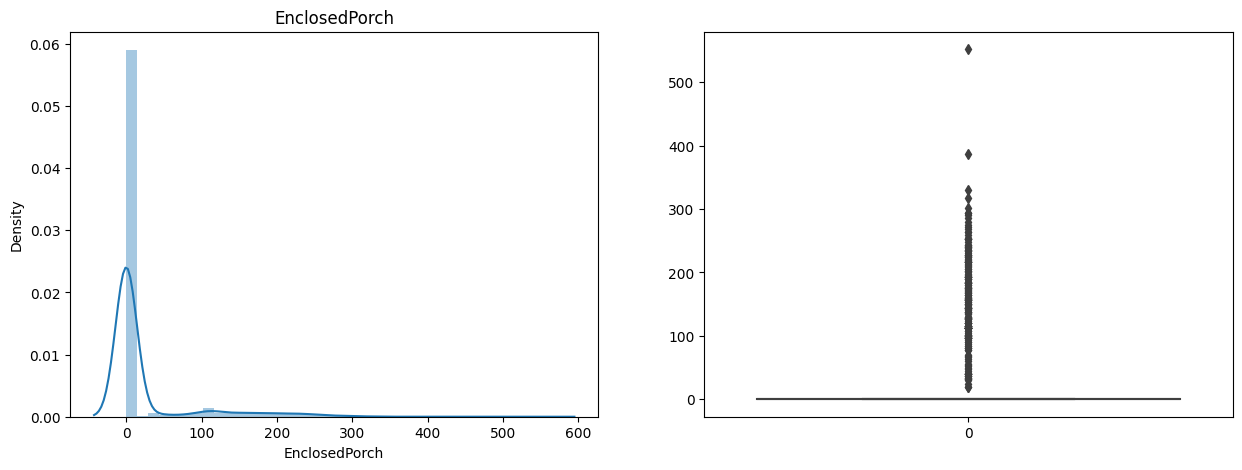

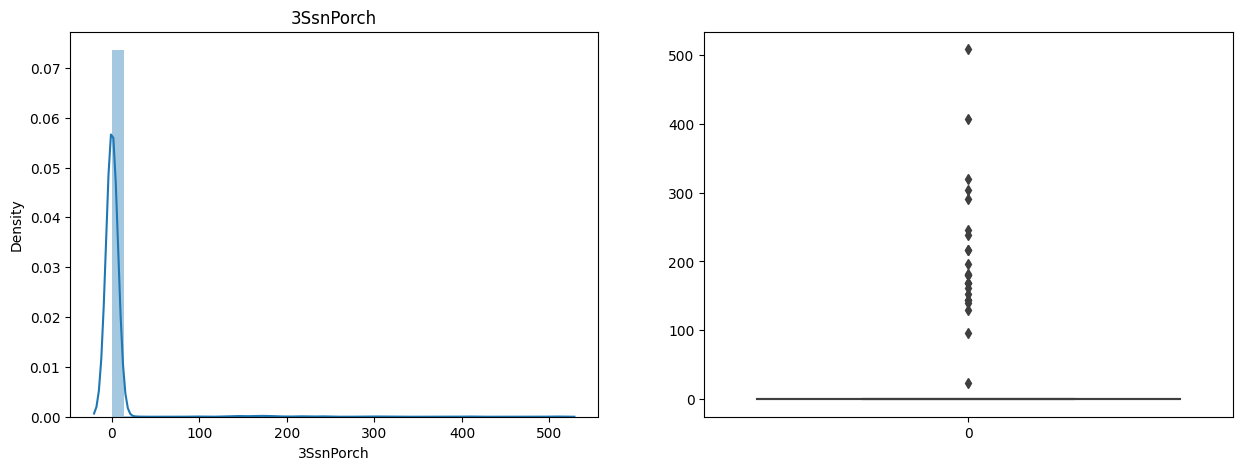

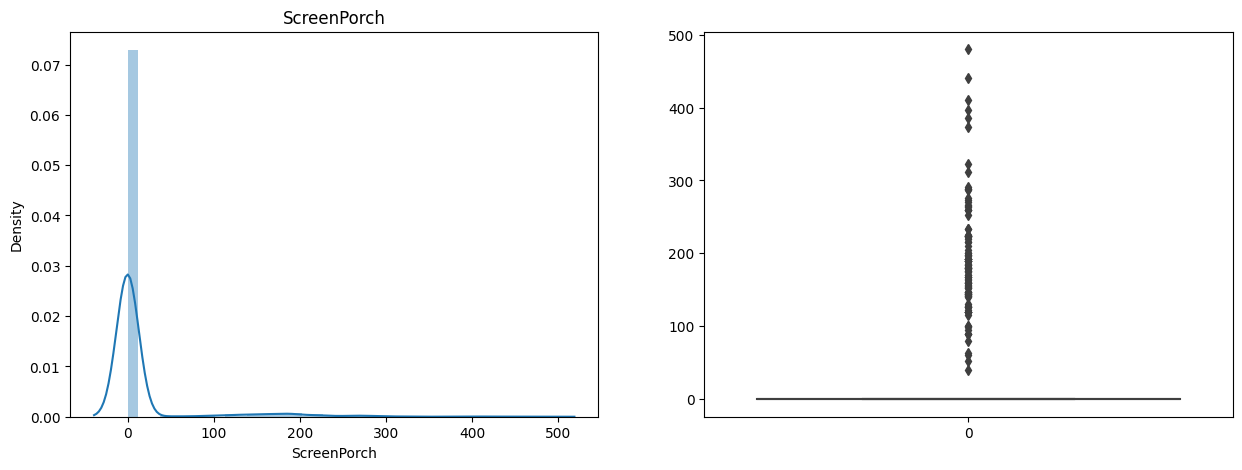

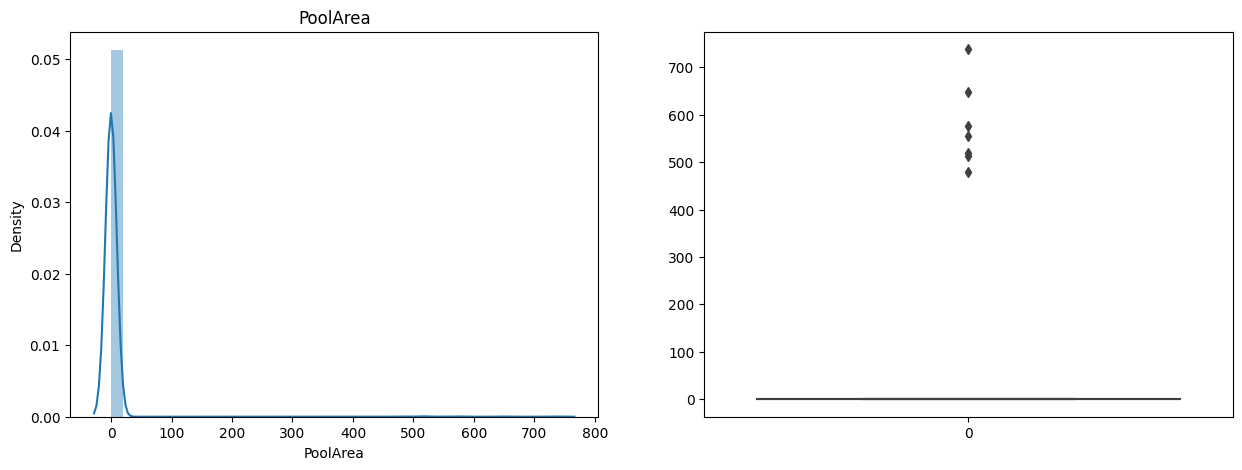

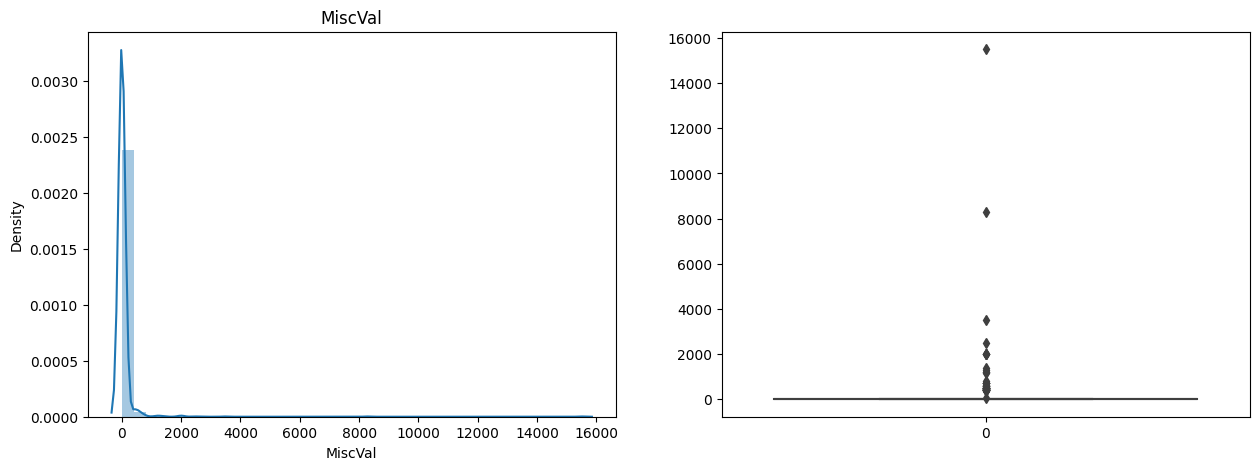

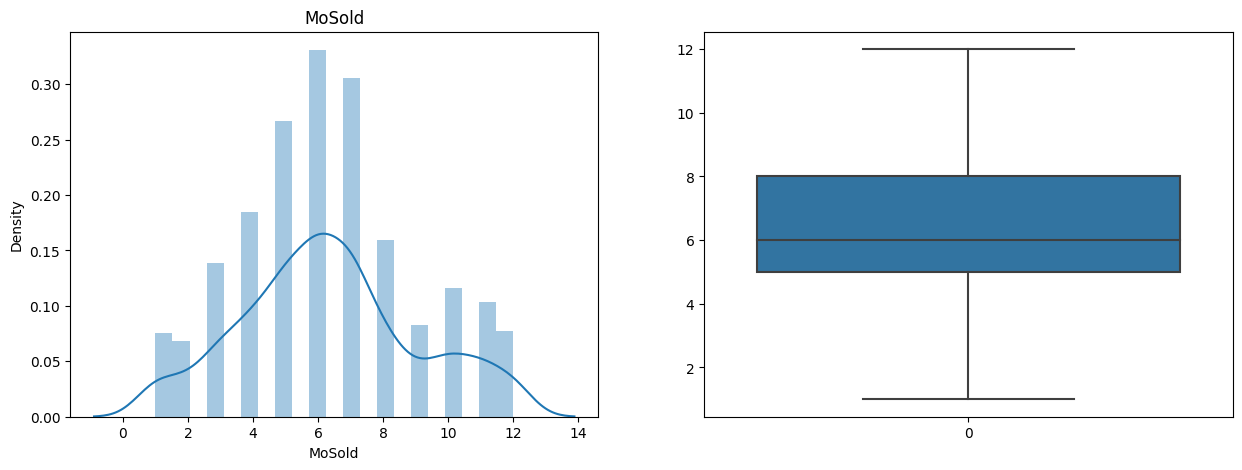

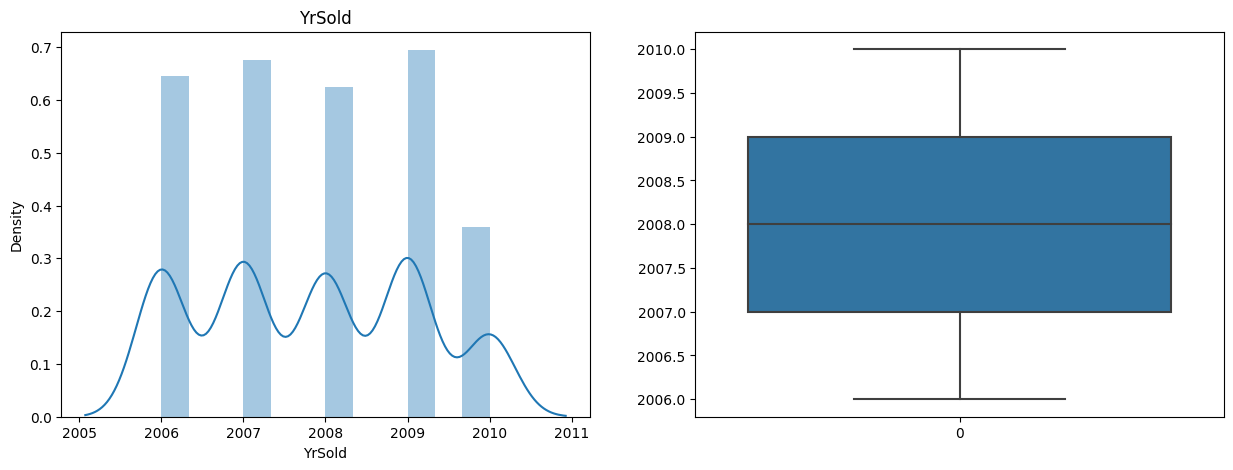

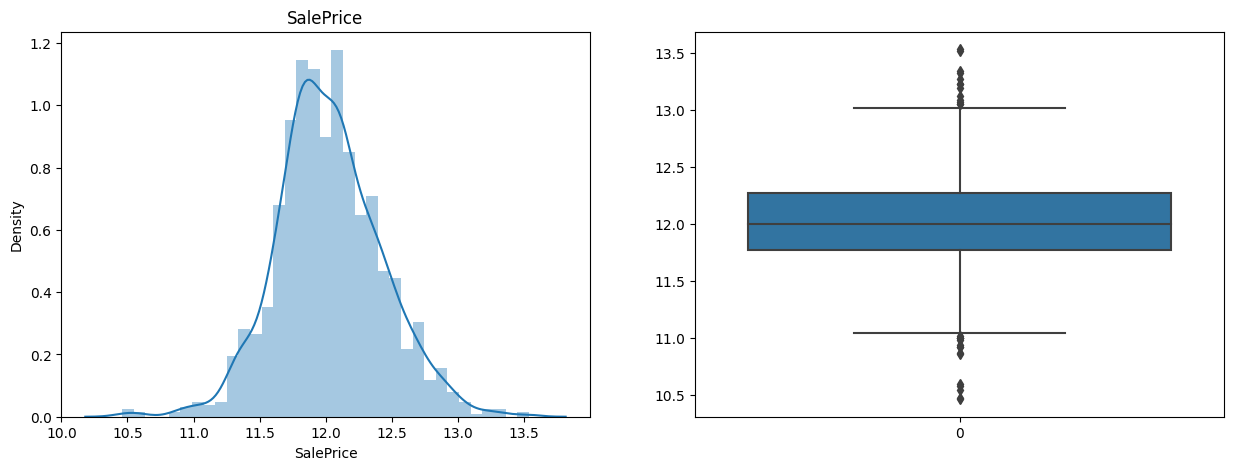

In [210]:
#Peforming univariate analysis across all numeric variables using histogram and box plot
for col in data_num.columns:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title(col)
  sns.distplot(data_num[col])

  plt.subplot(1,2,2)
  sns.boxplot(data_num[col])
  plt.show()

**Observation**
1. Many numerical columns are having a non normal distribtuion
2. Most columns have outliers

# Bivariate Analysis

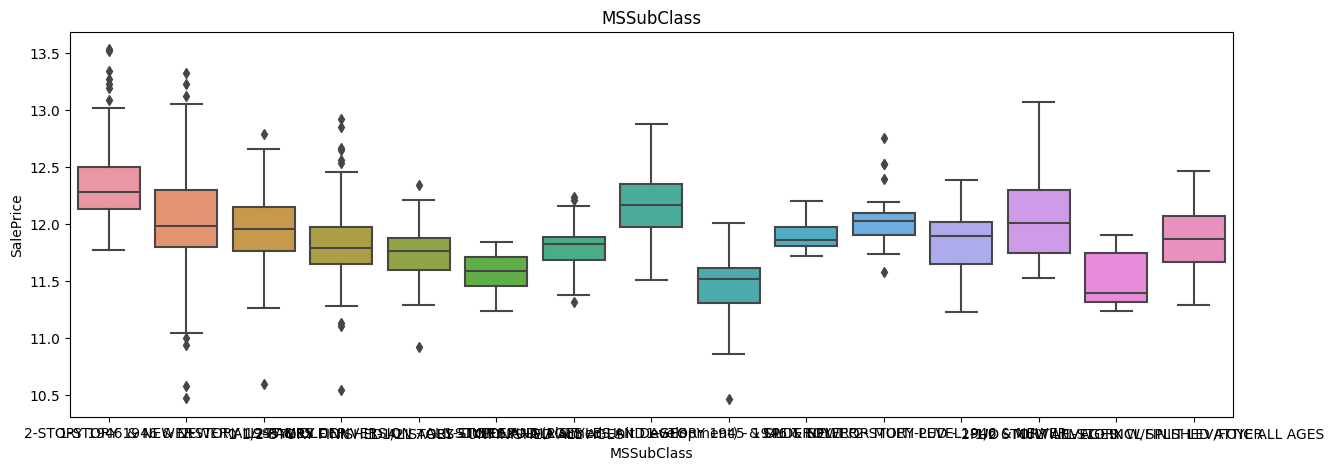

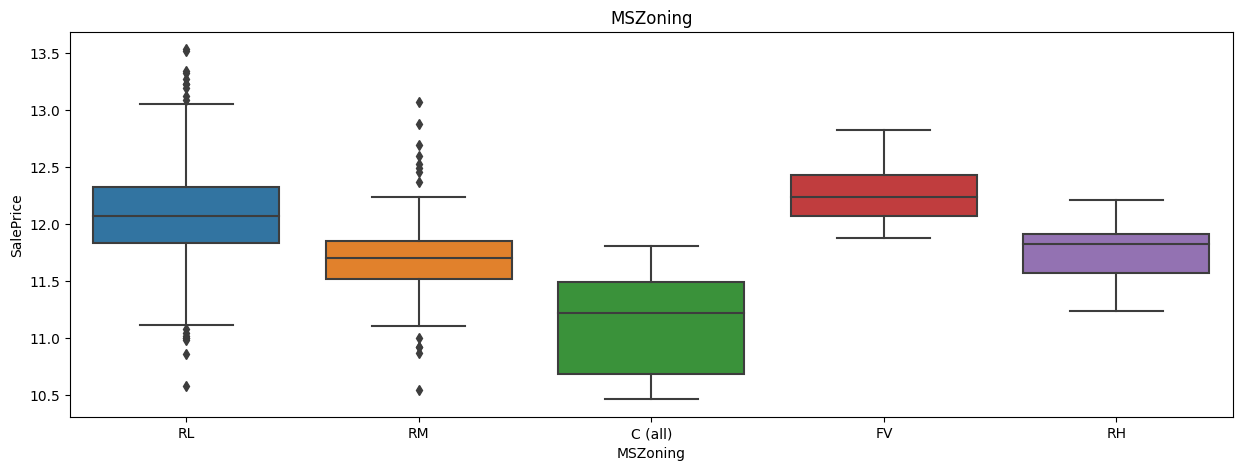

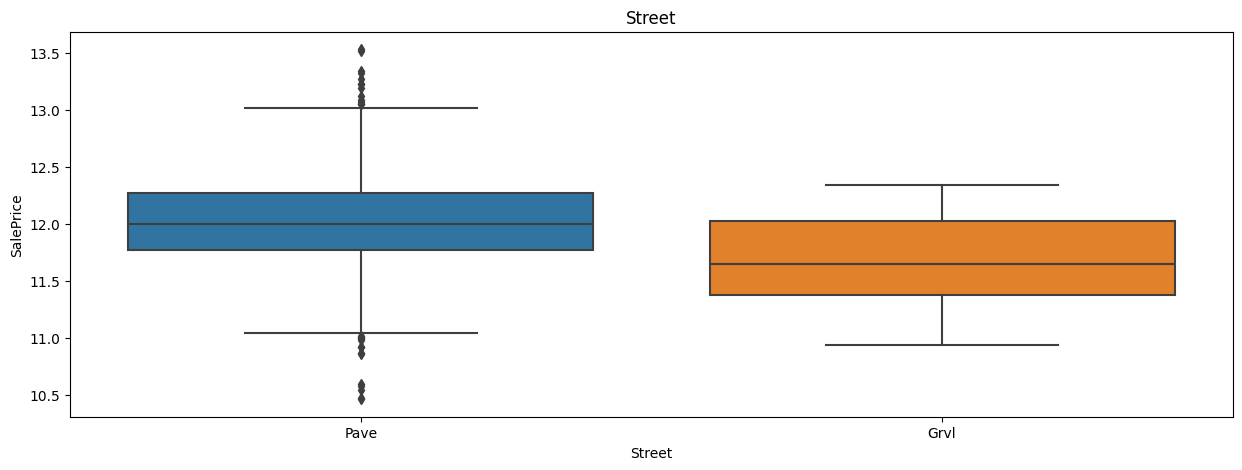

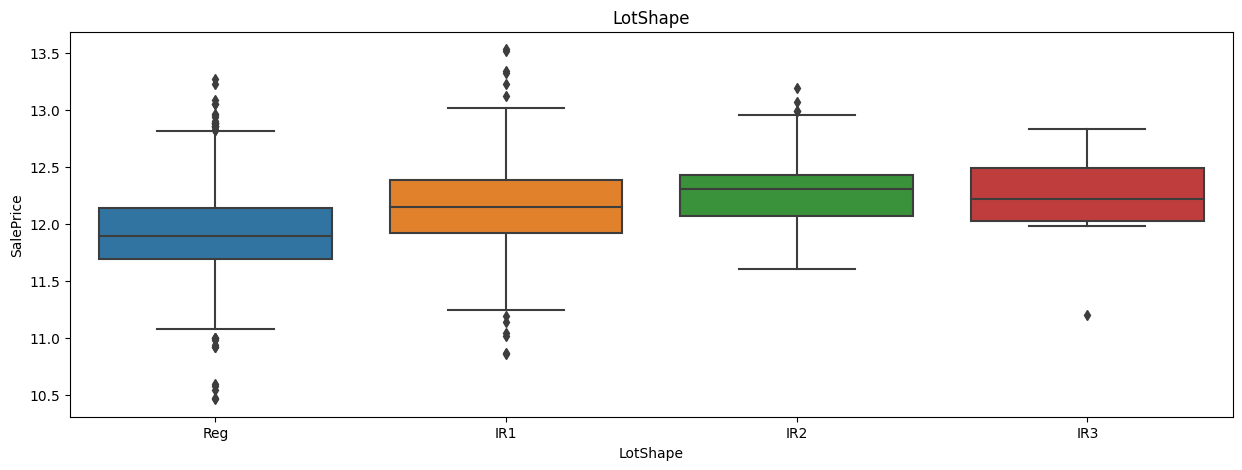

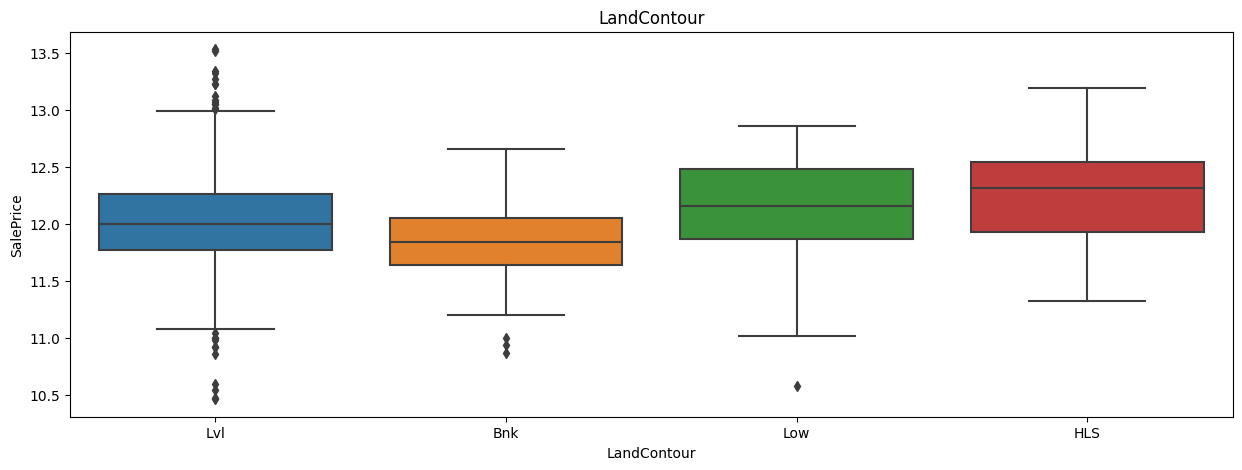

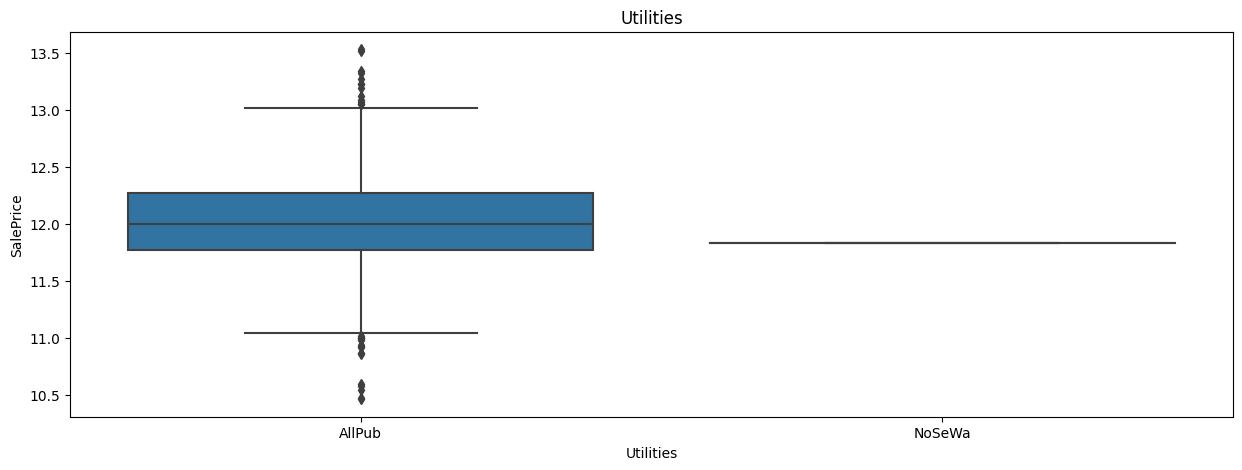

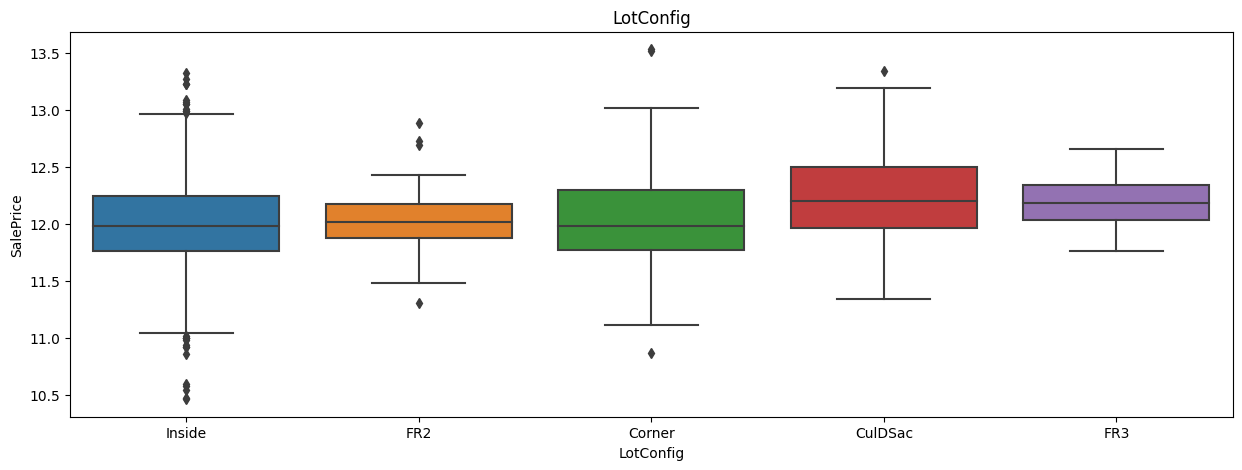

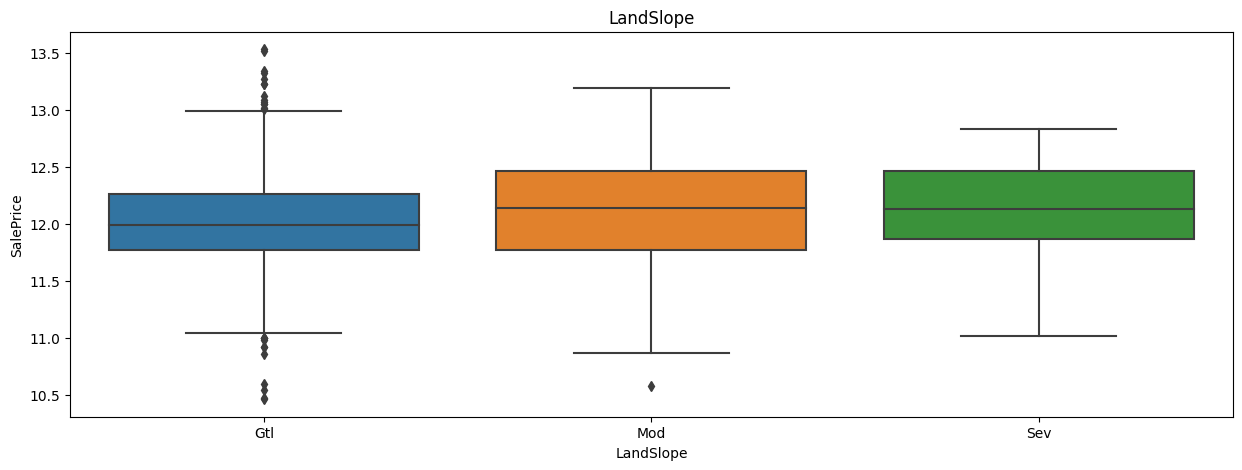

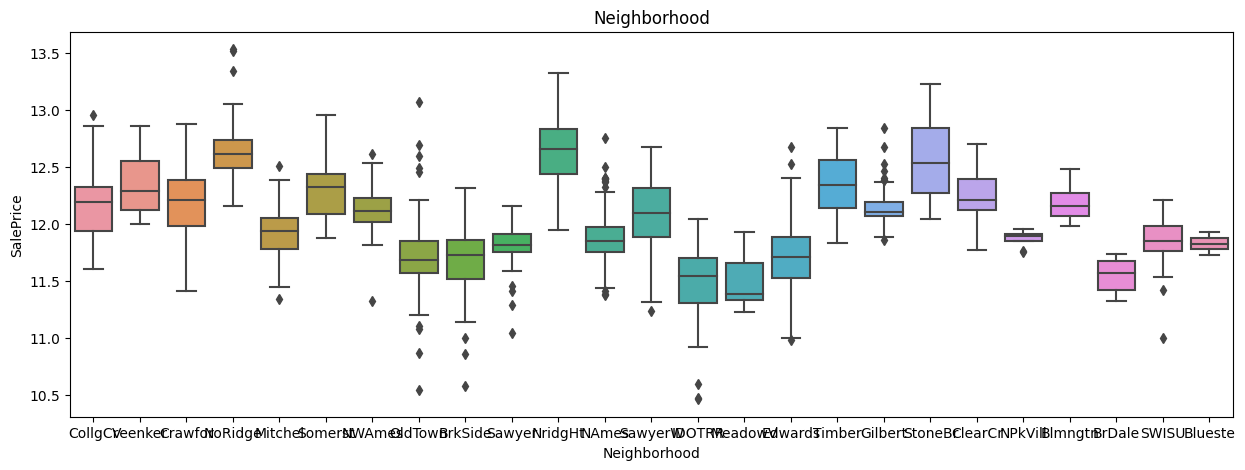

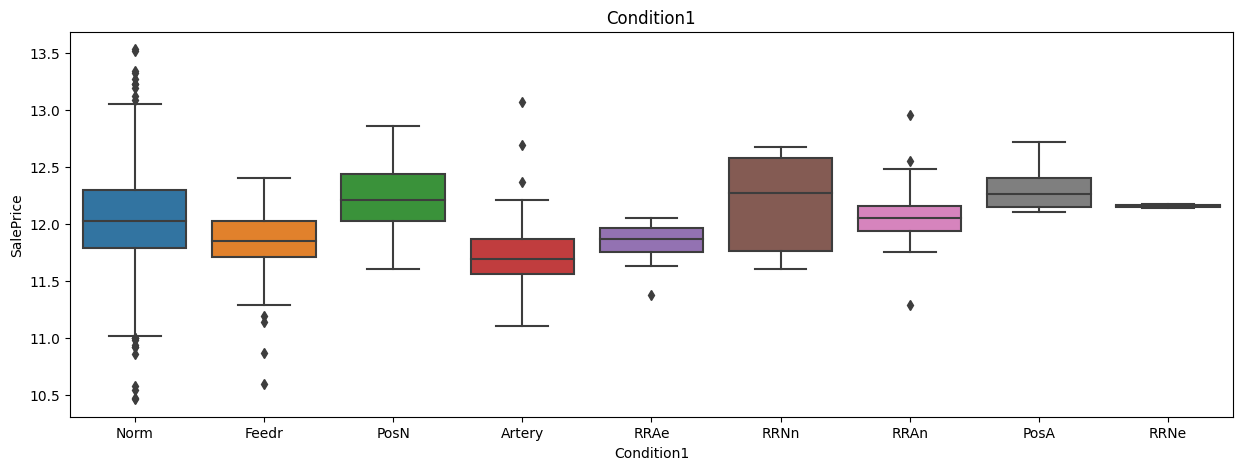

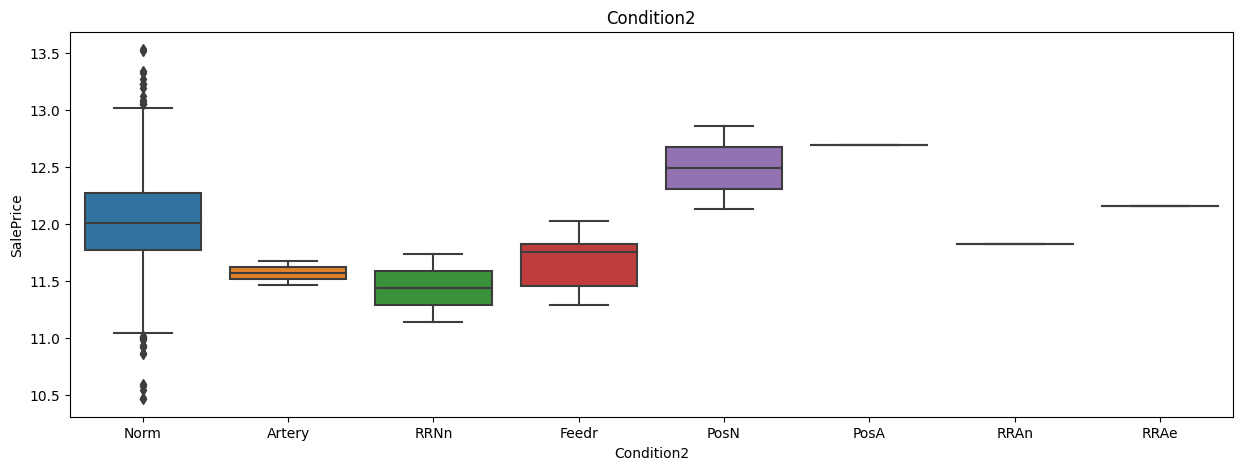

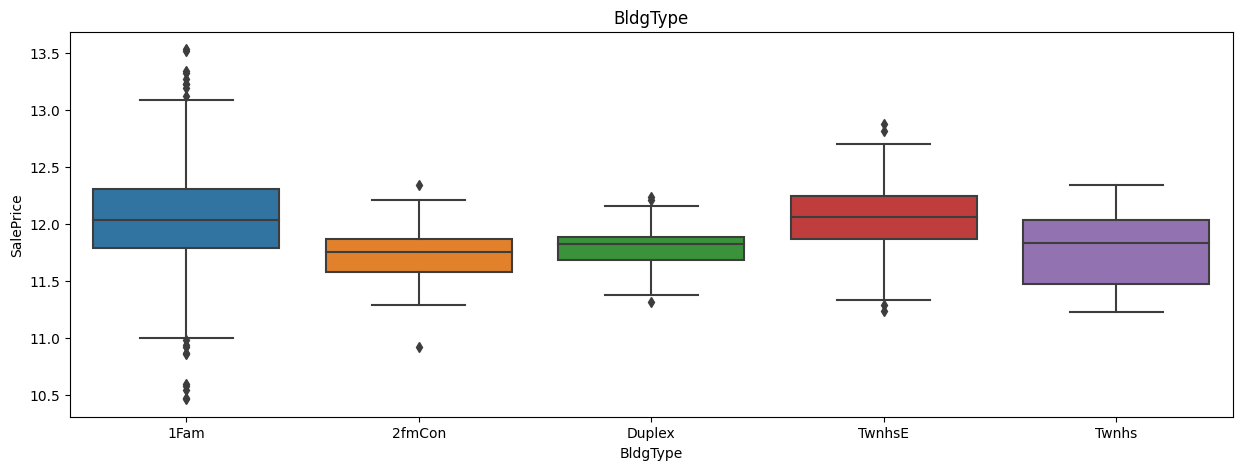

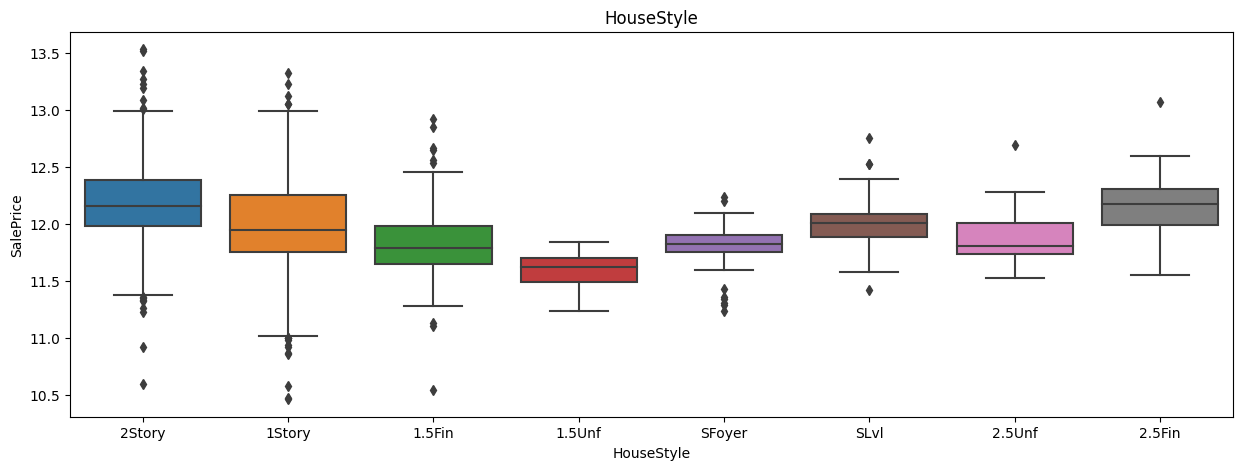

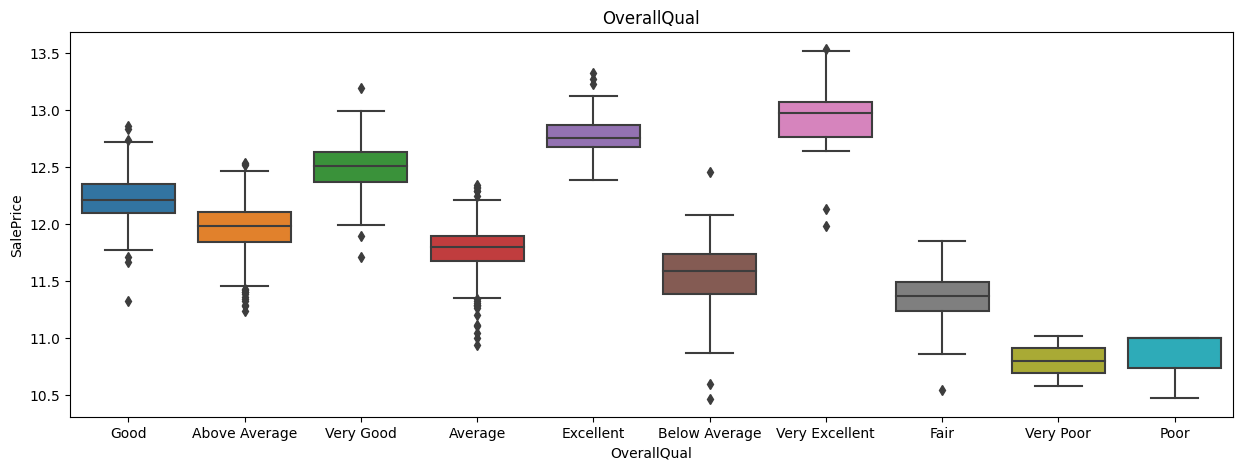

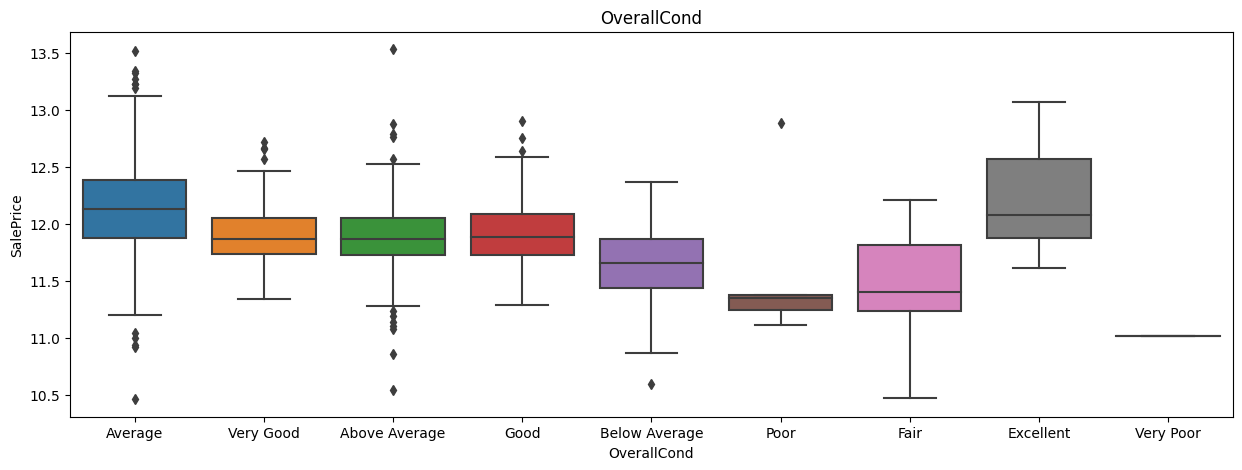

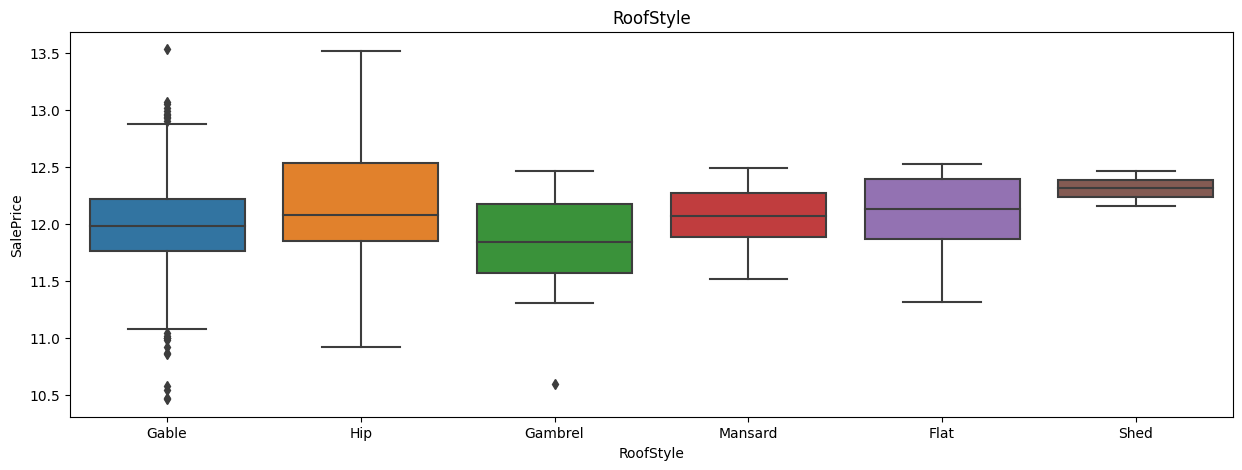

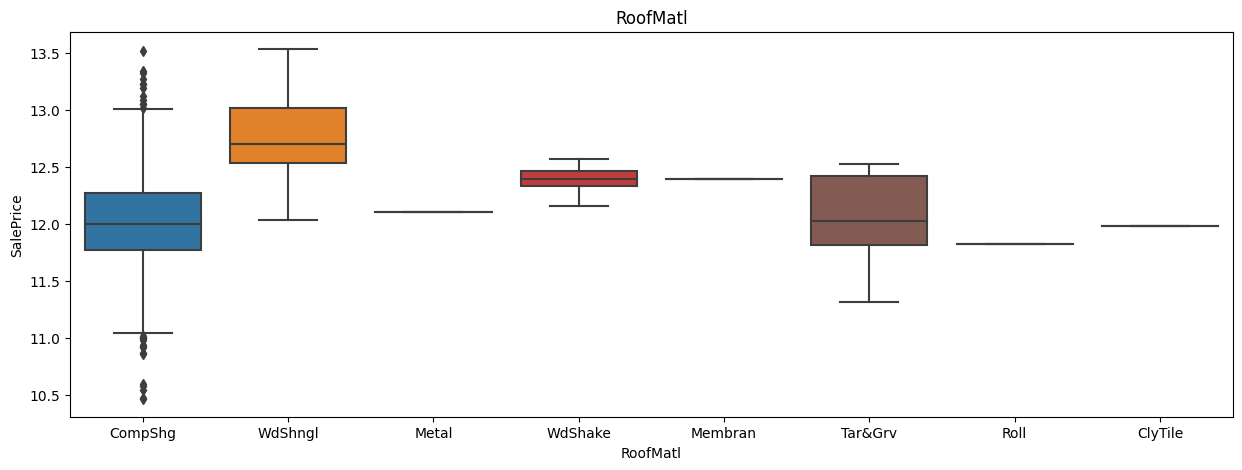

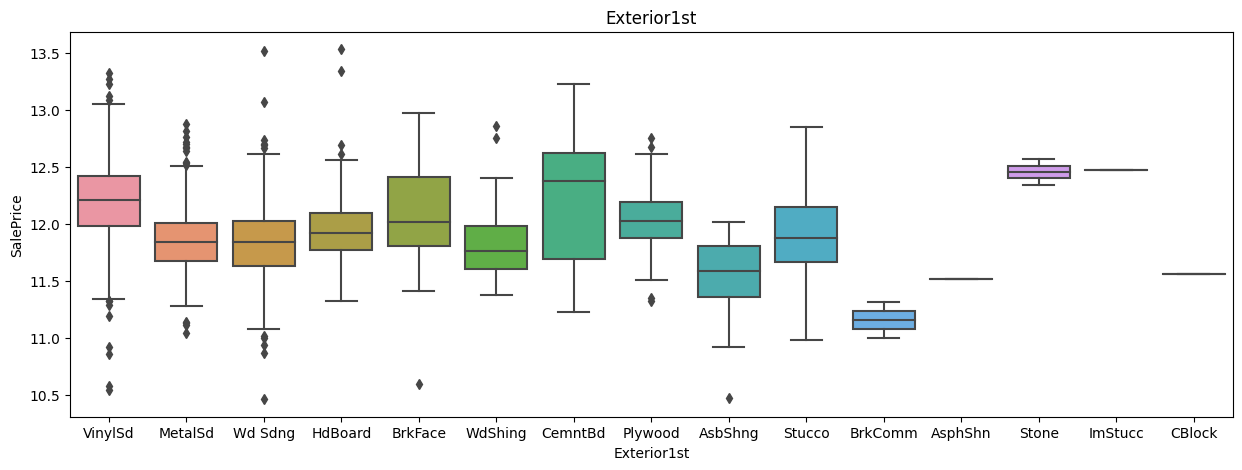

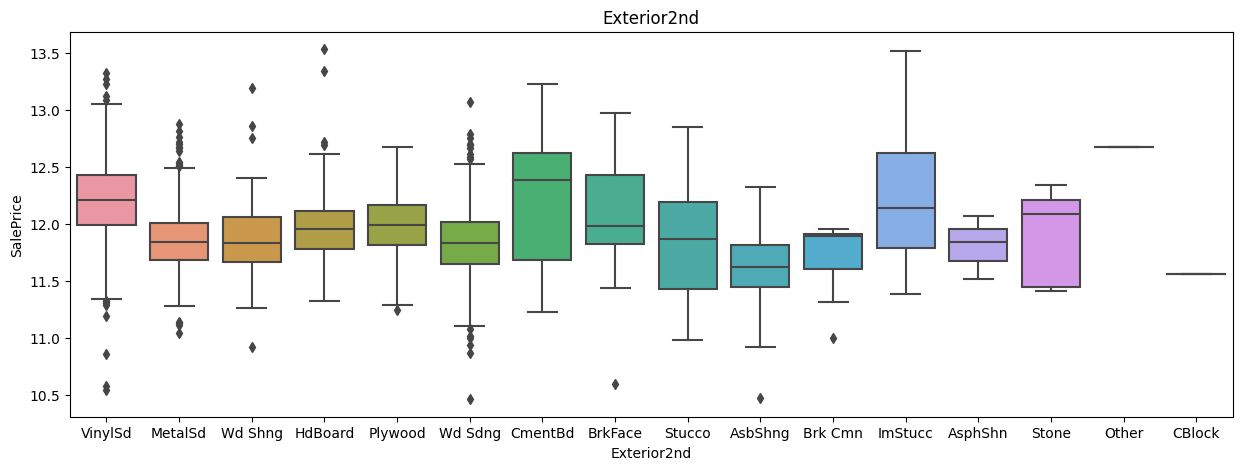

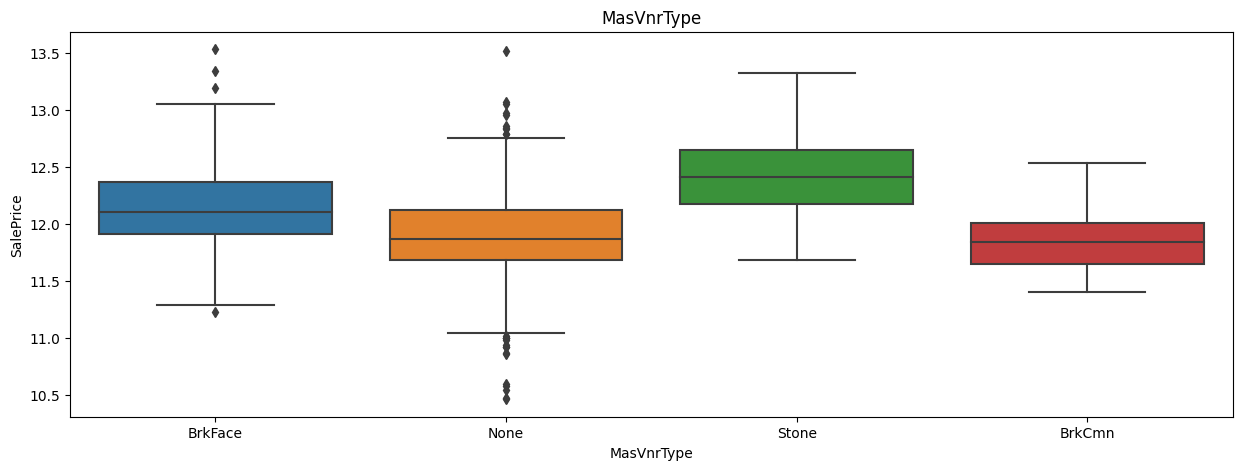

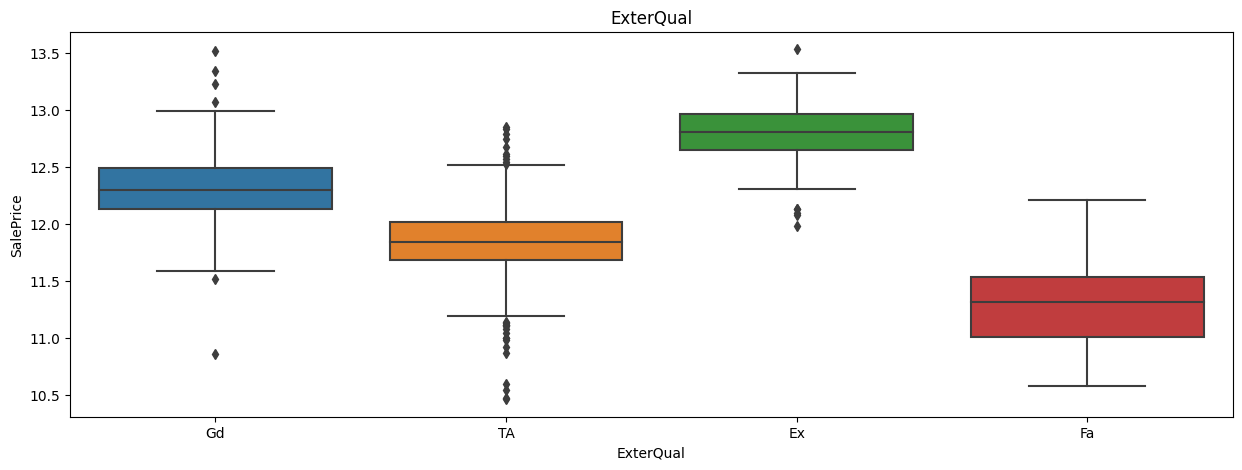

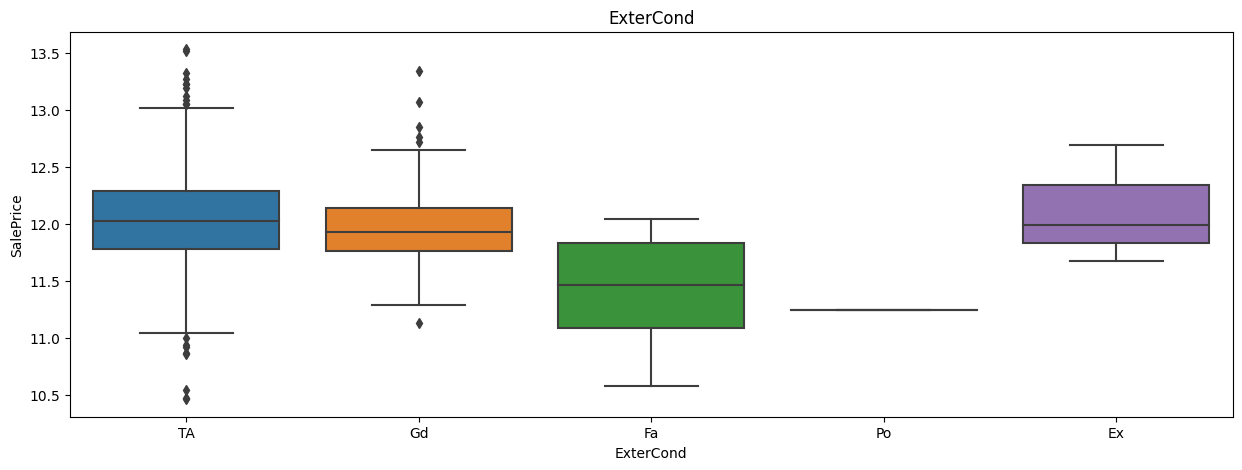

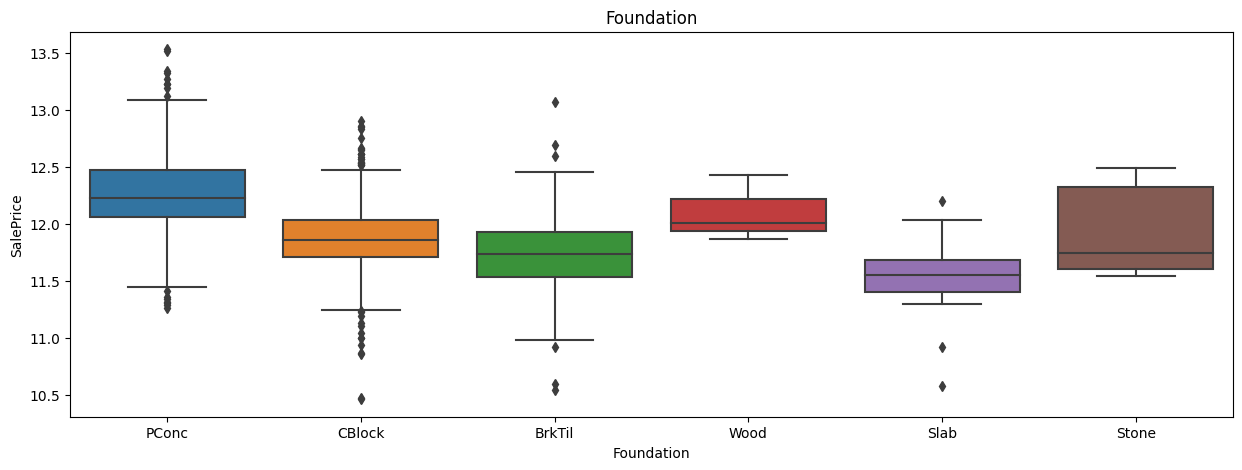

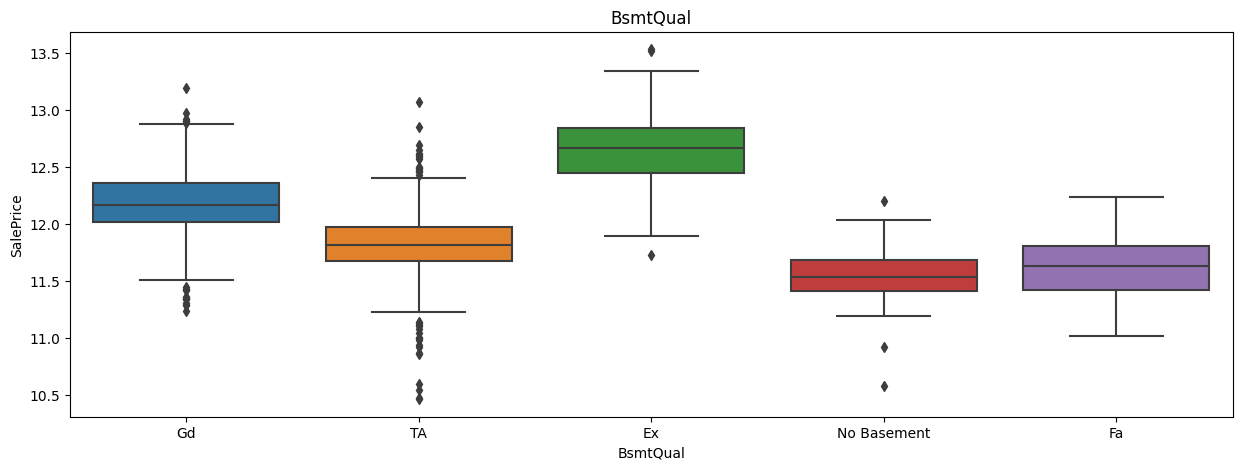

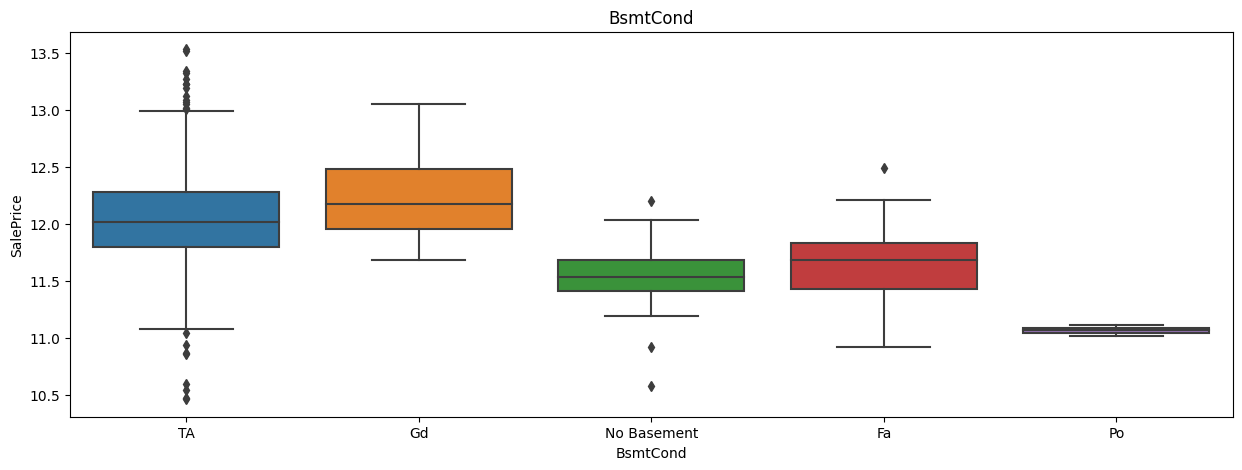

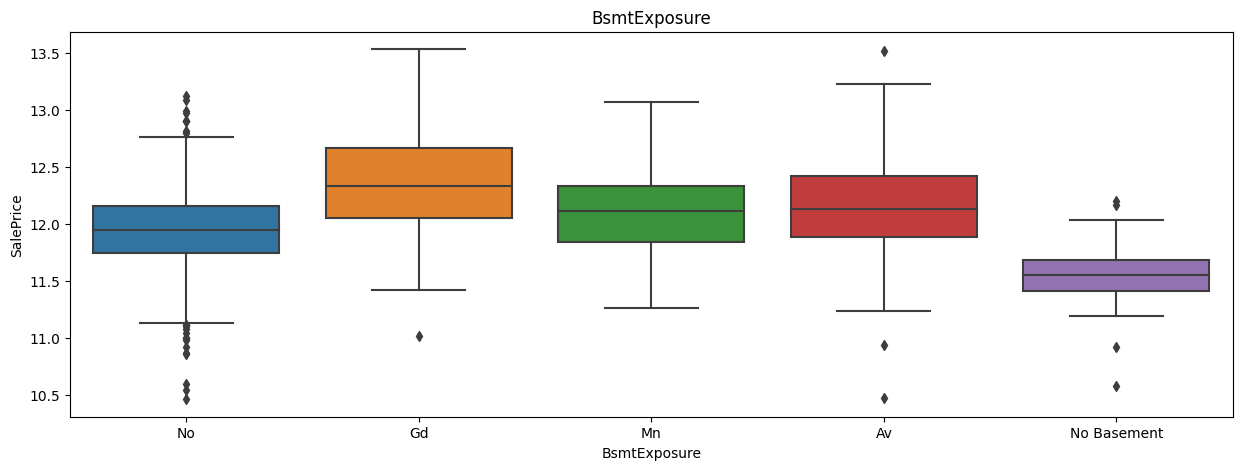

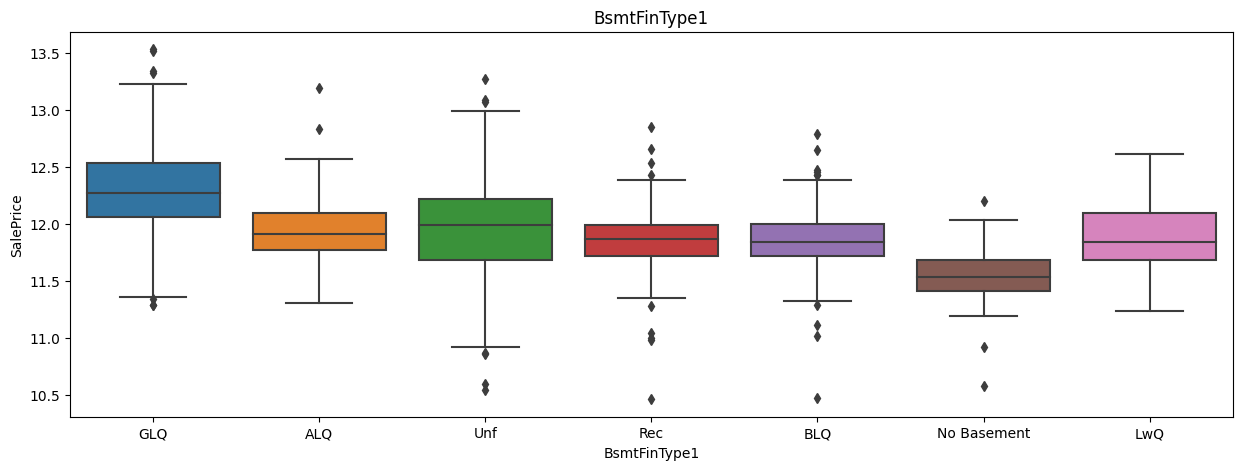

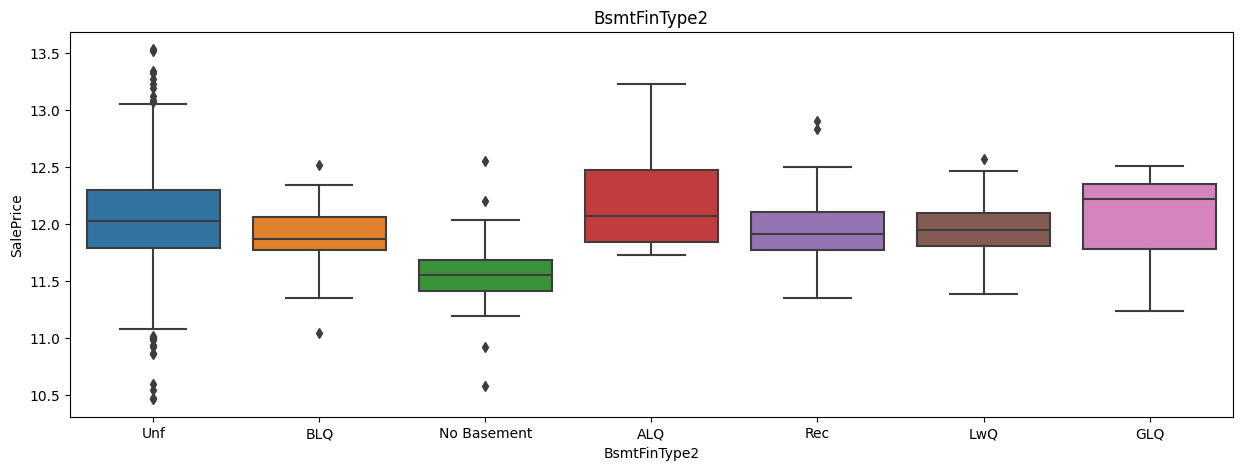

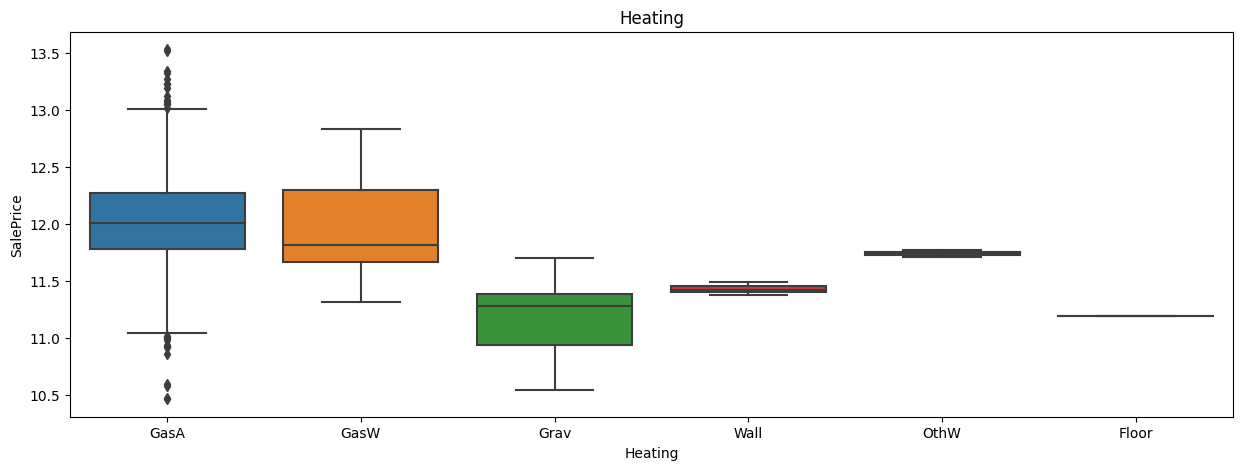

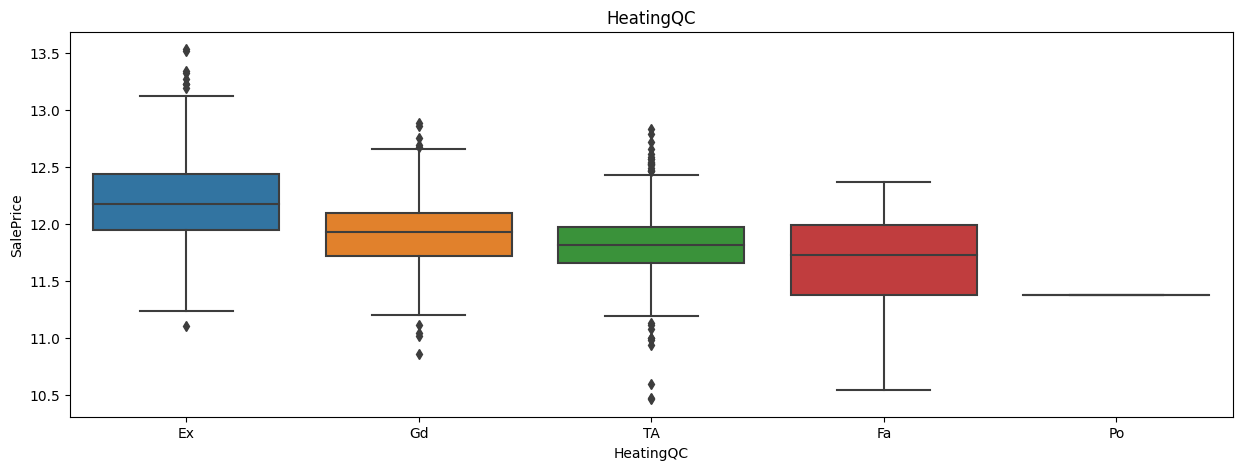

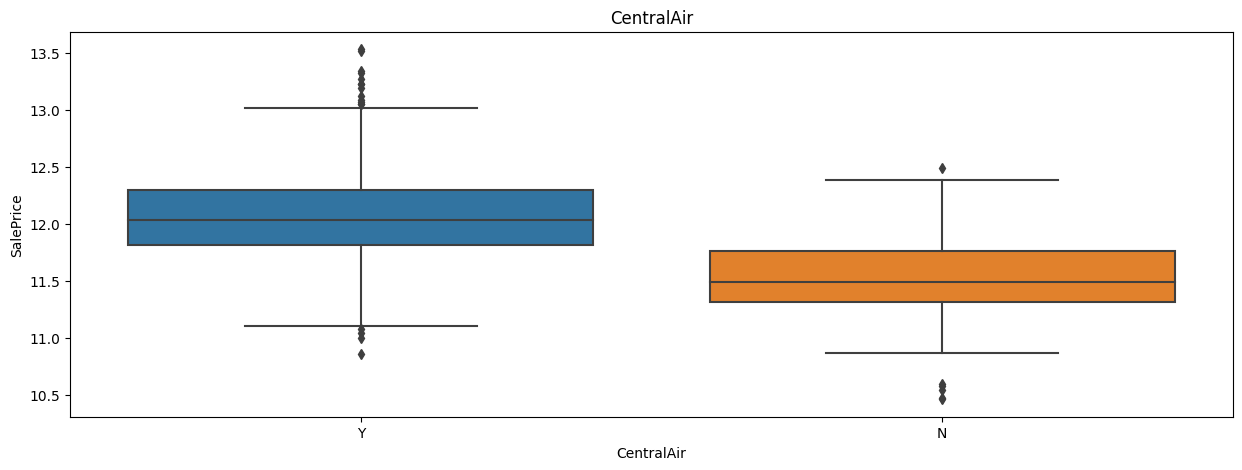

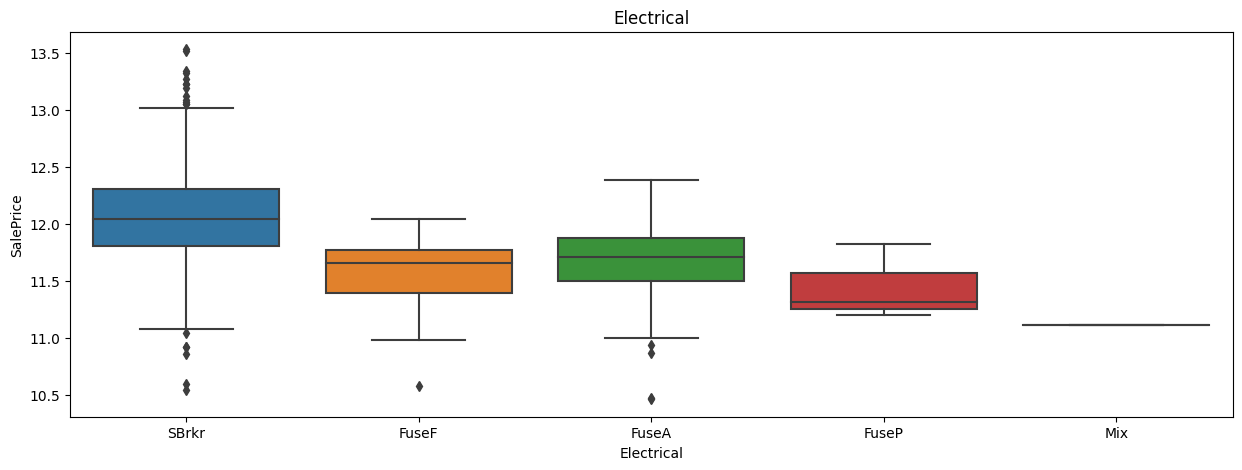

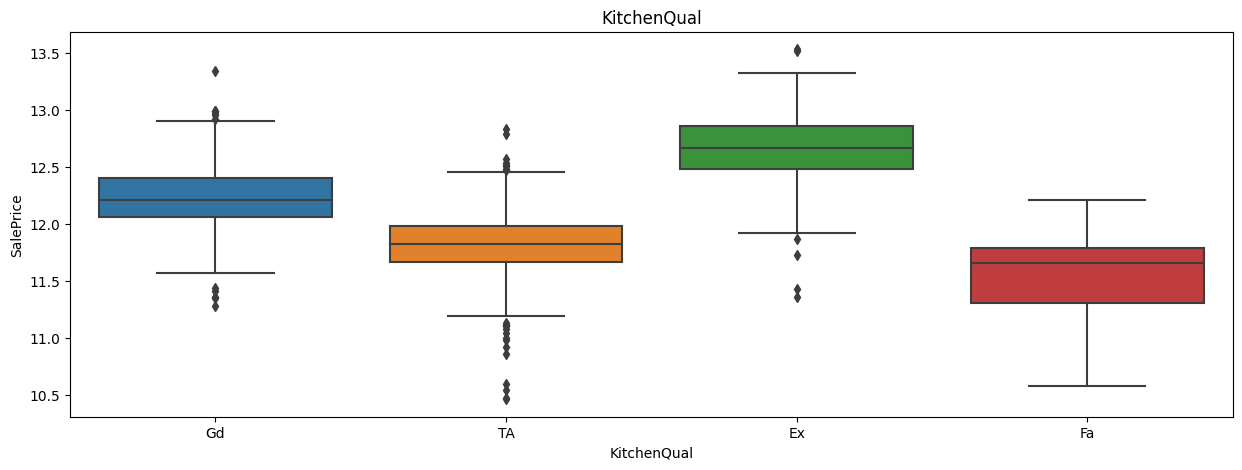

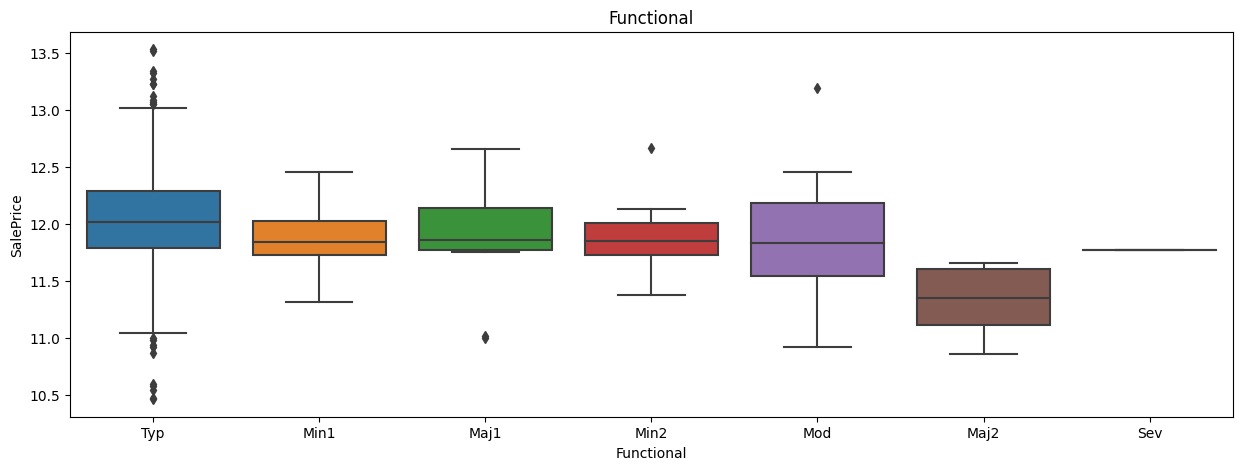

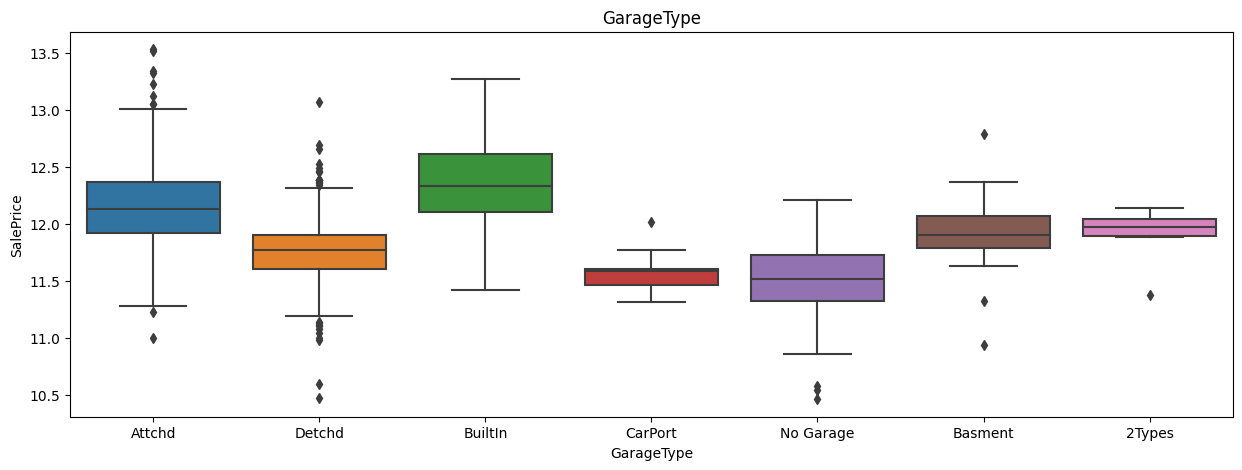

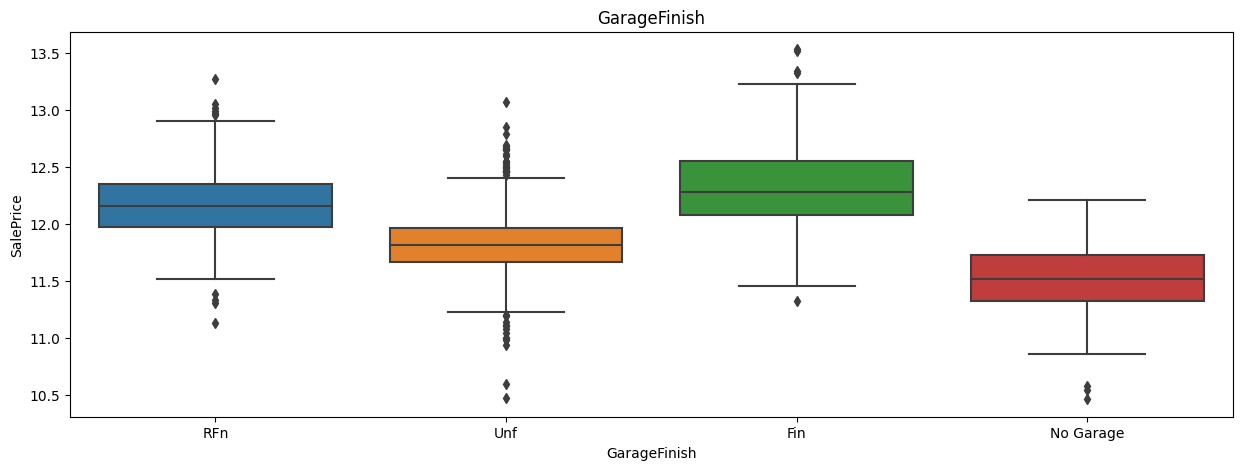

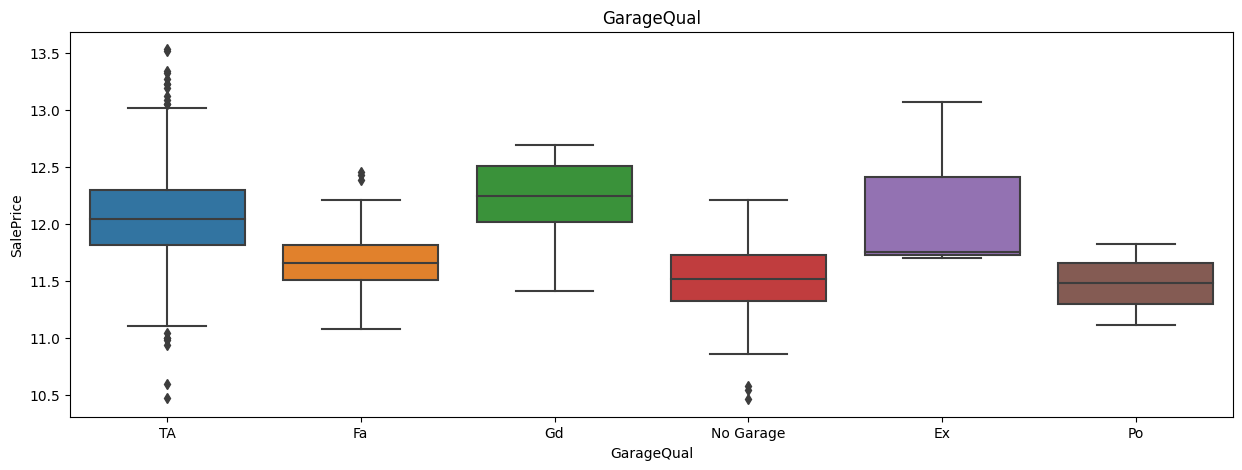

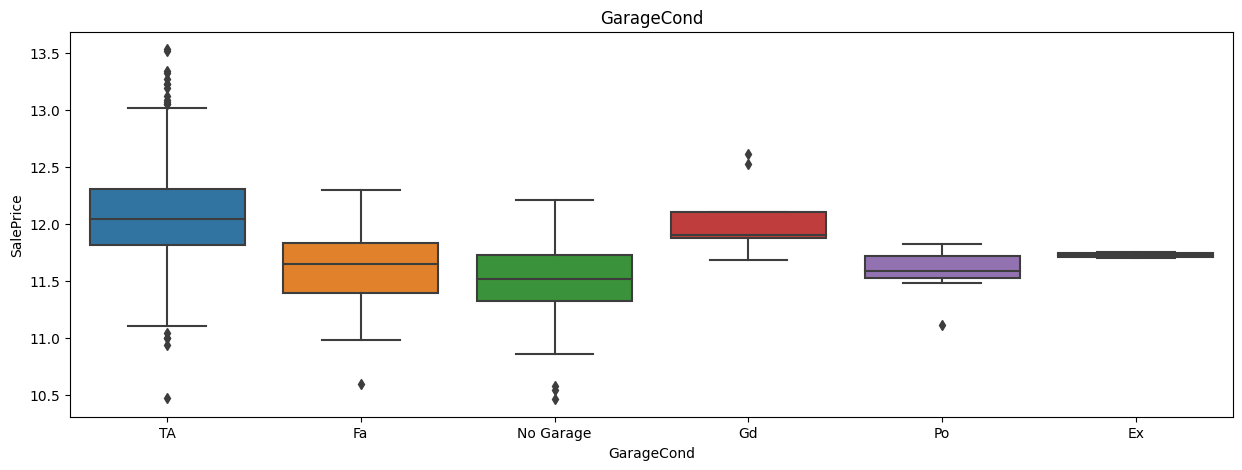

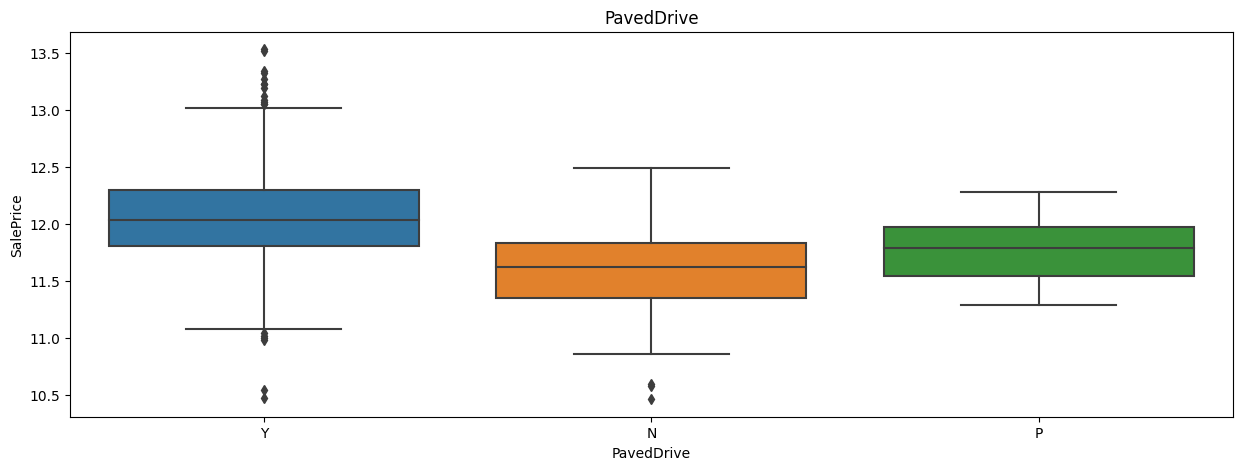

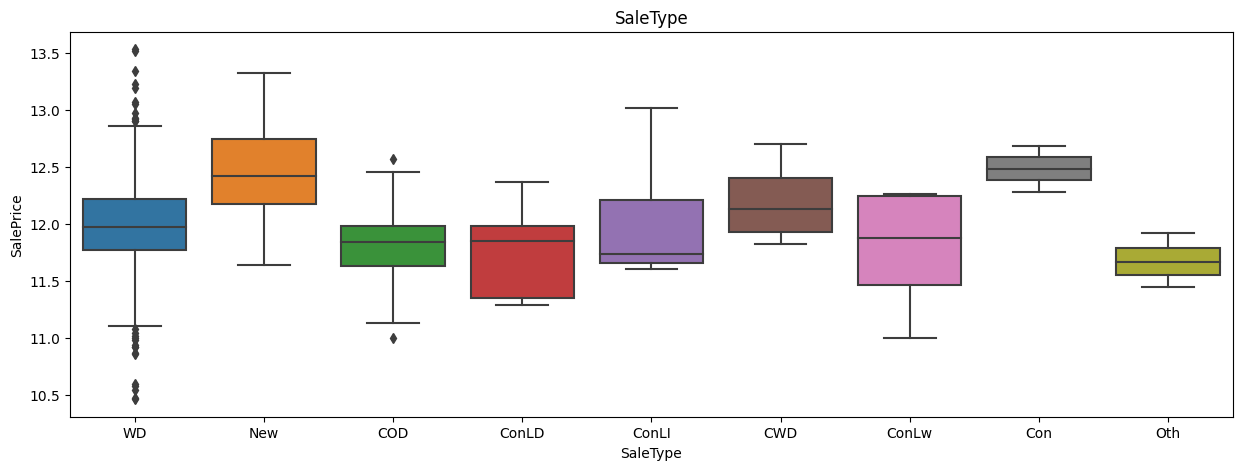

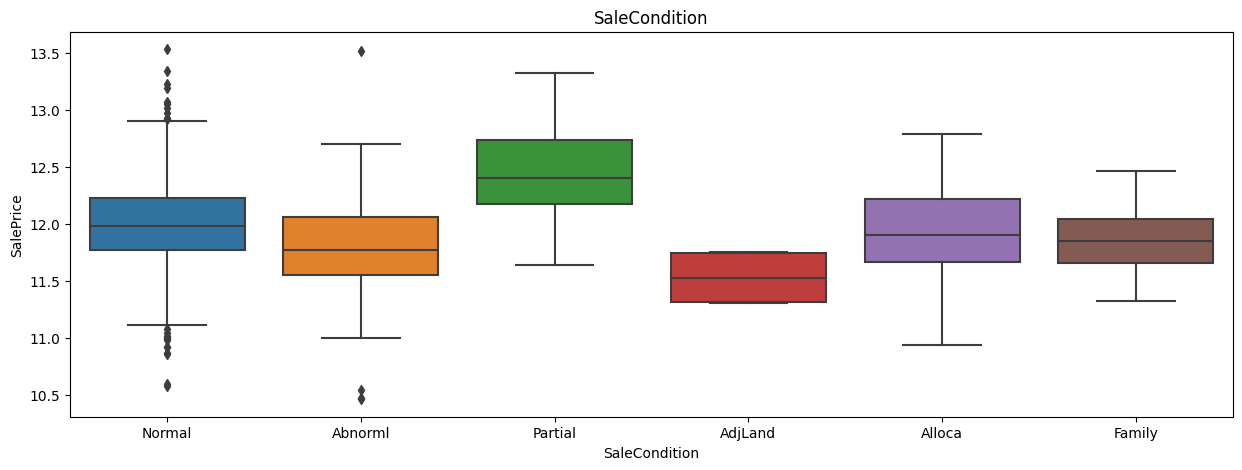

In [216]:
#Conducting univariate analysis for categorical variables
bi_variate_cat = data_cat
bi_variate_cat['SalePrice'] = data['SalePrice']
for col in data_cat.columns:
  if(col != 'SalePrice'):
    plt.figure(figsize =(15,5))
    plt.title(col)
    sns.boxplot(x=col, y='SalePrice',data=bi_variate_cat)
    plt.show()

[Add observations here]

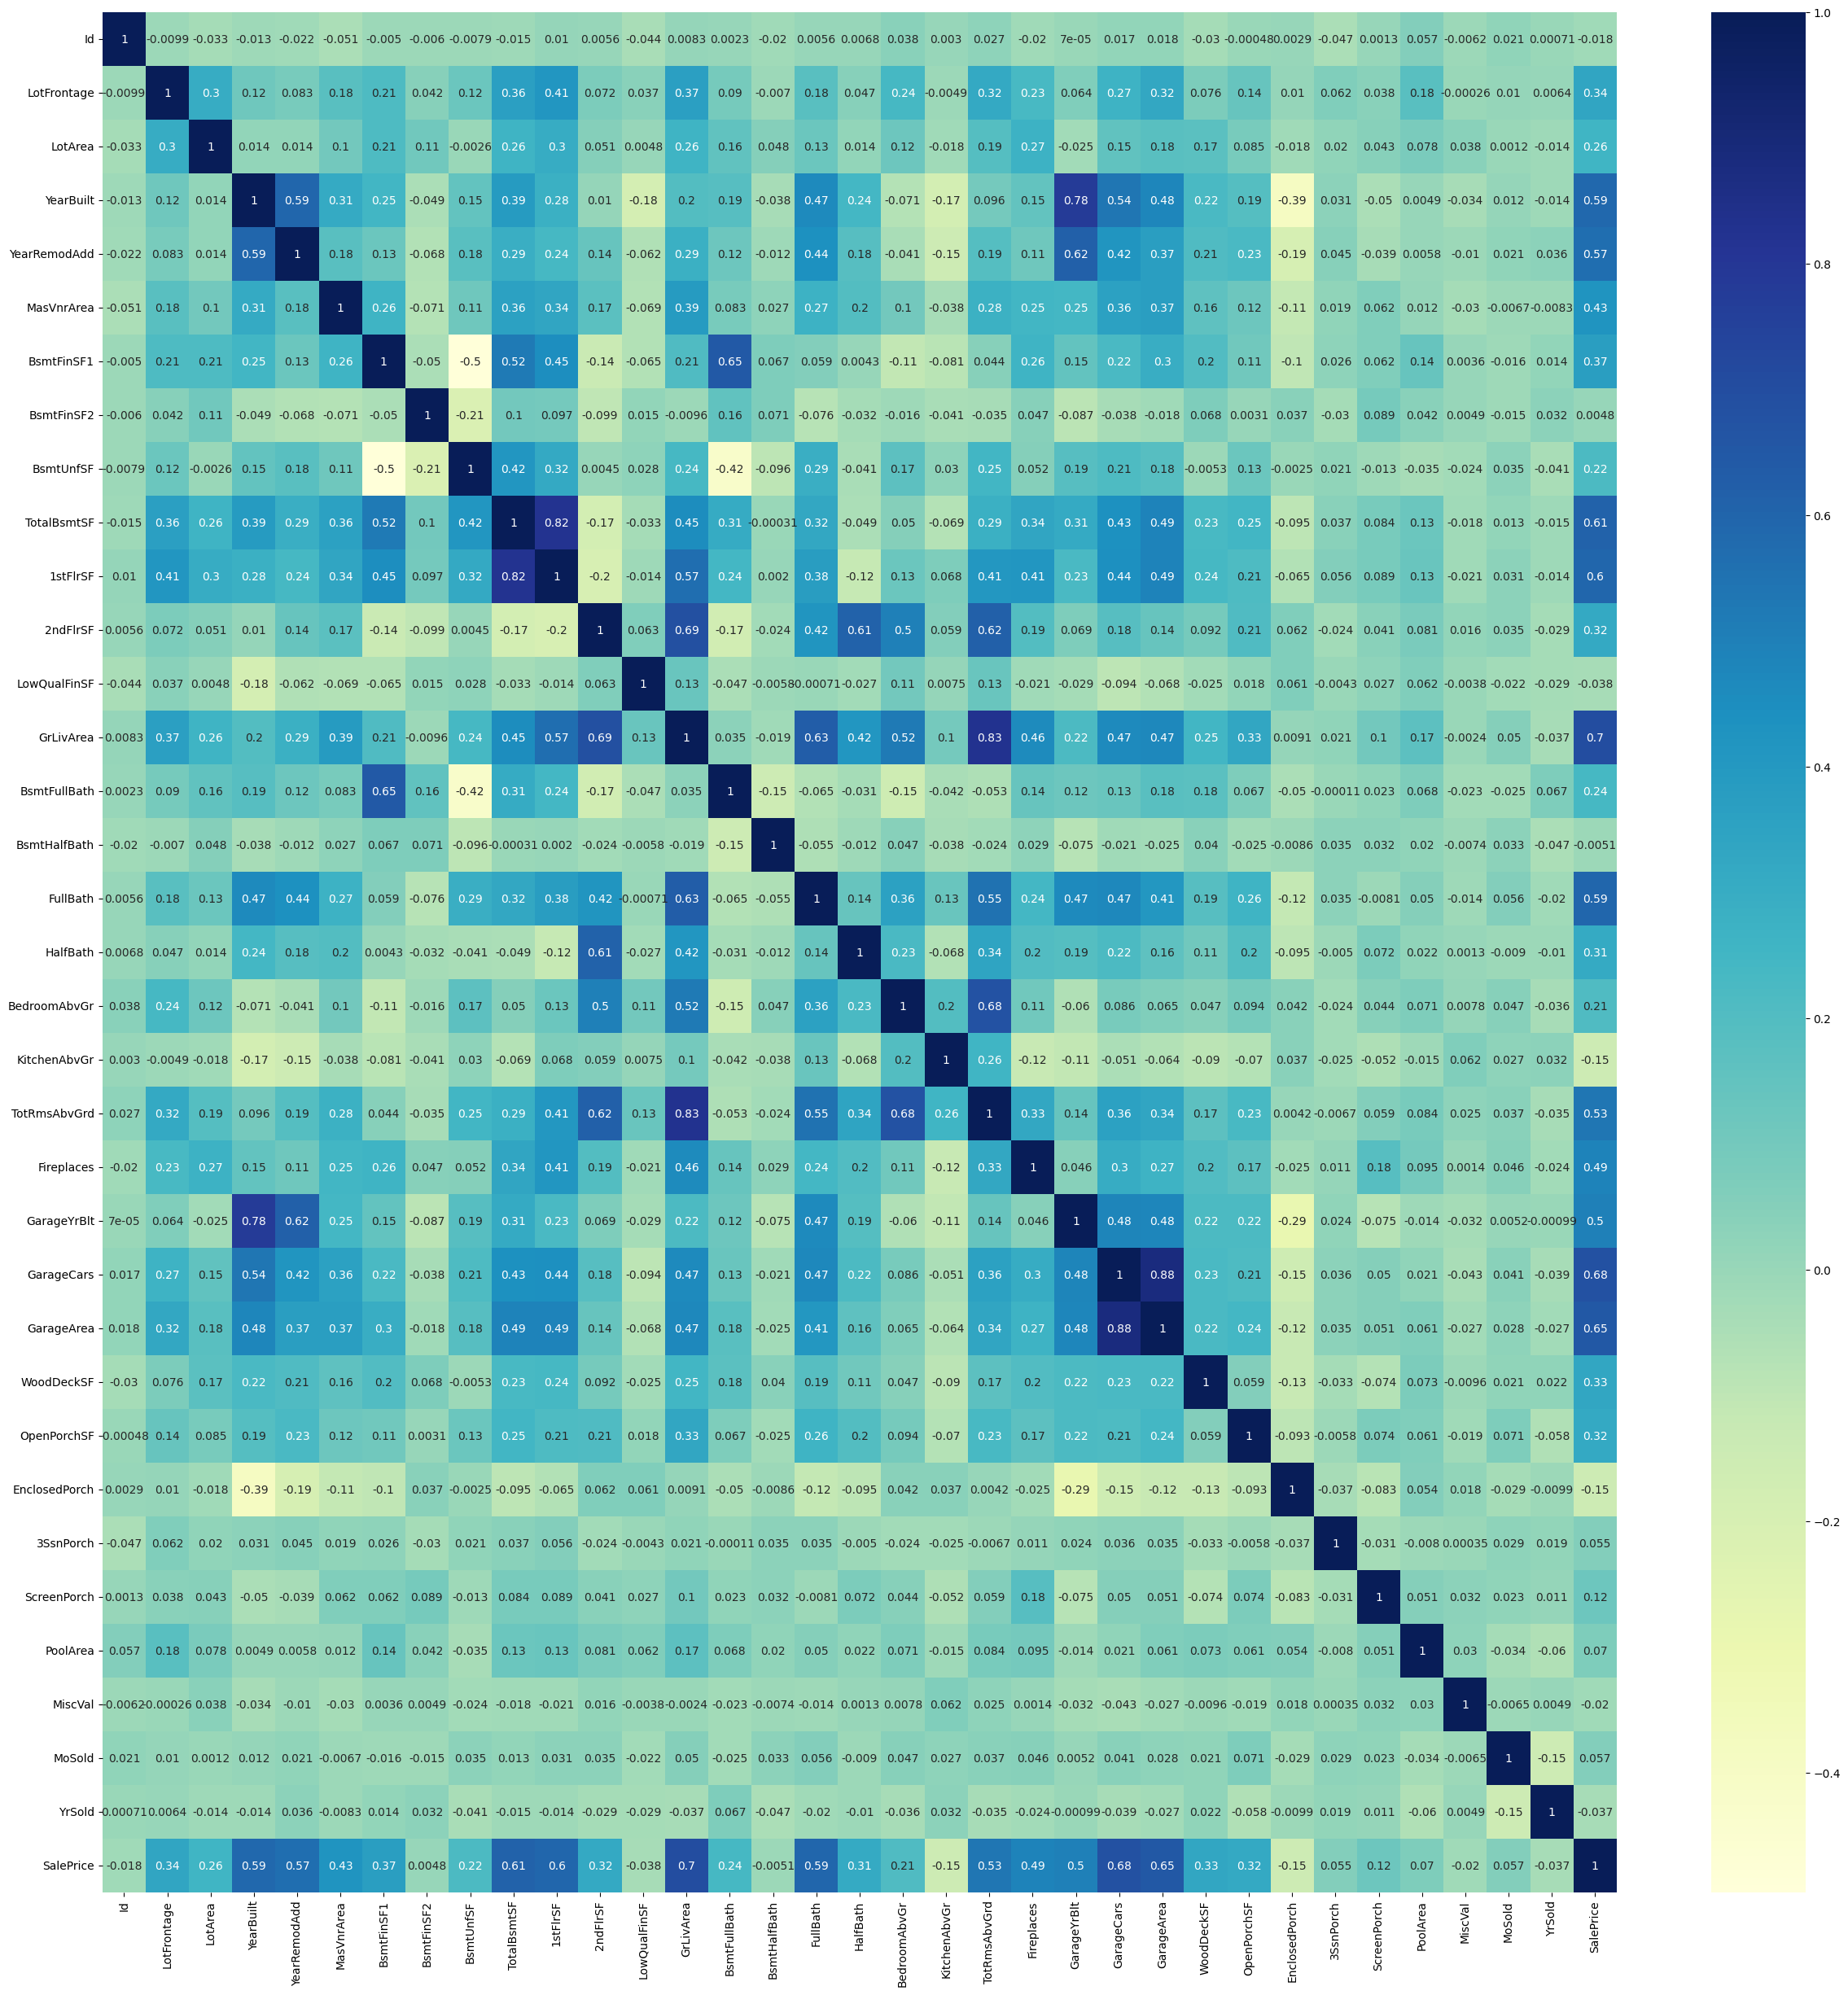

In [217]:
cor = data_num.corr()
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [218]:
correlation_matrix=data_num.corr()
high_correlation= correlation_matrix[(abs(correlation_matrix) > 0.6) & (correlation_matrix < 1)]
high_correlation_pairs = set()

for column in high_correlation.columns:
    correlated_features = high_correlation.index[high_correlation[column].notnull()].tolist()
    if correlated_features:
        for feature in correlated_features:
            if column != feature:  # Avoid adding pairs with the same variable
                pair = tuple(sorted([column, feature]))  # Ensure consistent order for the pair
                correlation_value = correlation_matrix.loc[feature, column]
                high_correlation_pairs.add((pair[0], pair[1], correlation_value))

# Display the results
print("Highly Correlated Feature Pairs (Correlation > 0.7):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]} : {pair[2]}")

Highly Correlated Feature Pairs (Correlation > 0.7):
2ndFlrSF and GrLivArea : 0.6875010641666033
BsmtFinSF1 and BsmtFullBath : 0.6492117535742649
GarageArea and GarageCars : 0.882475414281462
GarageCars and SalePrice : 0.6806248074360484
FullBath and GrLivArea : 0.6300116462511148
2ndFlrSF and HalfBath : 0.6097073002717436
GarageYrBlt and YearBuilt : 0.7805549935309497
GarageArea and SalePrice : 0.6508875559020071
GrLivArea and TotRmsAbvGrd : 0.8254893743088425
GrLivArea and SalePrice : 0.7009266525441309
1stFlrSF and TotalBsmtSF : 0.8195299750050339
SalePrice and TotalBsmtSF : 0.612133975369786
BedroomAbvGr and TotRmsAbvGrd : 0.676619935742649
2ndFlrSF and TotRmsAbvGrd : 0.6164226354915431
GarageYrBlt and YearRemodAdd : 0.6181298421366552


### Observations


1.   Areas in SF across Floors, Bathroom, Bedroom and Living rooms are correlated (which should be obvious)
2.   Garage year built and year house built has strong correlation (which is also obvious)
3. This essentially signifies there is multicollinearity among predictors in our data, so it makes sense to use Ridge regression.



# Feature Engineering

-0.5872900470291365


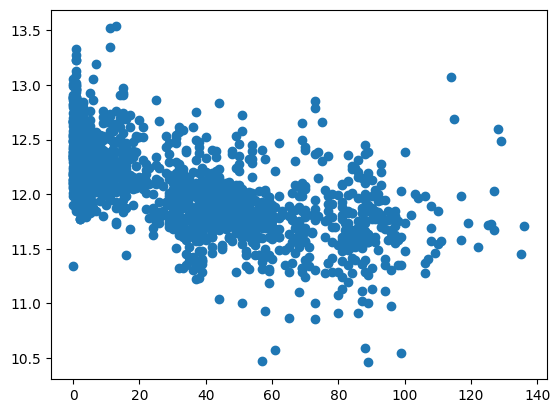

In [219]:
#YrBlt has decent correlation (0.59) so it makes sense to calculate Age as additional feature. Age can be taken as factor when the house gets sold
data['age'] = data['YrSold'] - data['YearBuilt']
print(data['age'].corr(data['SalePrice']))
plt.scatter(data['age'],data['SalePrice'])


This makes sense as the total age of the house is lot, the selling price is less

In [220]:
#Dropping Years variables
data.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [221]:
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

In [222]:
# Dummy variable creation
data_num = data.select_dtypes(include=['int64', 'float64'])
data_cat = data.select_dtypes(include='object')

In [223]:
## One hot encoding the categorical columns
data_cat = pd.get_dummies(data_cat, drop_first=True)
data_cat.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  GarageType_BuiltIn  GarageType_Detchd  GarageType_No Garage  \
0  ...                   0                  0                     0   
1  ...                   0                  0                     0   
2  ...                   0                  0                     0   
3  ...                   0                  1                     0   
4  ...                   0                  0                     0   

   GarageType_Others  GarageFinish_No Garage  GarageFinish_RFn  \
0                  0                       0                 1   
1                  0                       0                 1   
2                  0                       0                 1   
3                  0                       0                 0   
4                  0                       0                 1   

   GarageFinish_Unf  SaleCondition_Normal  SaleCondition_Others  \
0                 0                     1                     0   
1                 0                     1                     0   
2                 0                     1                     0   
3                 1                     0                     0   
4                 0                     1                     0   

   SaleCondition_Part

In [224]:
data = pd.concat([data,data_cat],axis=1)

In [225]:
data.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   

  LotShape LotConfig Neighborhood BldgType HouseStyle  ... GarageType_BuiltIn  \
0      Reg    Inside      CollgCr     1Fam     2Story  ...                  0   
1      Reg       FR2      Veenker     1Fam     1Story  ...                  0   
2      IR1    Inside      CollgCr     1Fam     2Story  ...                  0   
3      IR1    Corner      Crawfor     1Fam     2Story  ...                  0   
4      IR1       FR2      NoRidge     1Fam     2Story  ...                  0   

  GarageType_Detchd  GarageType_No Garage GarageType_Others  \
0                 0                     0                 0   
1                 0                     0                 0   
2                 0                     0                 0   
3                 1                     0                 0   
4                 0                     0                 0   

  GarageFinish_No Garage GarageFinish_RFn GarageFinish_Unf  \
0                      0                1                0   
1                      0                1                0   
2                      0                1                0   
3                      0                0                1   
4                      0                1                0   

   SaleCondition_Normal SaleCondition_Others SaleCondition_Partial  
0                     1                    0                     0  
1                     1                    0                     0  
2                     1                    0                     0  
3                     0                    0                     0  
4                     1                    0                     0  

[5 rows x 187 columns]

In [226]:
#removing columns as dummy variables already formed
data.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True)

In [227]:
data.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  GarageType_BuiltIn  \
0        150          856       856       854  ...                   0   
1        284         1262      1262         0  ...                   0   
2        434          920       920       866  ...                   0   
3        540          756       961       756  ...                   0   
4        490         1145      1145      1053  ...                   0   

   GarageType_Detchd  GarageType_No Garage  GarageType_Others  \
0                  0                     0                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  1                     0                  0   
4                  0                     0                  0   

   GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf  \
0                       0                 1                 0   
1                       0                 1                 0   
2                       0                 1                 0   
3                       0                 0                 1   
4                       0                 1                 0   

   SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
0                     1                     0                      0  
1                     1                     0                      0  
2                     1                     0                      0  
3                     0                     0                      0  
4                     1                     0                      0  

[5 rows x 163 columns]

In [228]:
#irrelevant data for the model
data.drop(['YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

<Axes: >

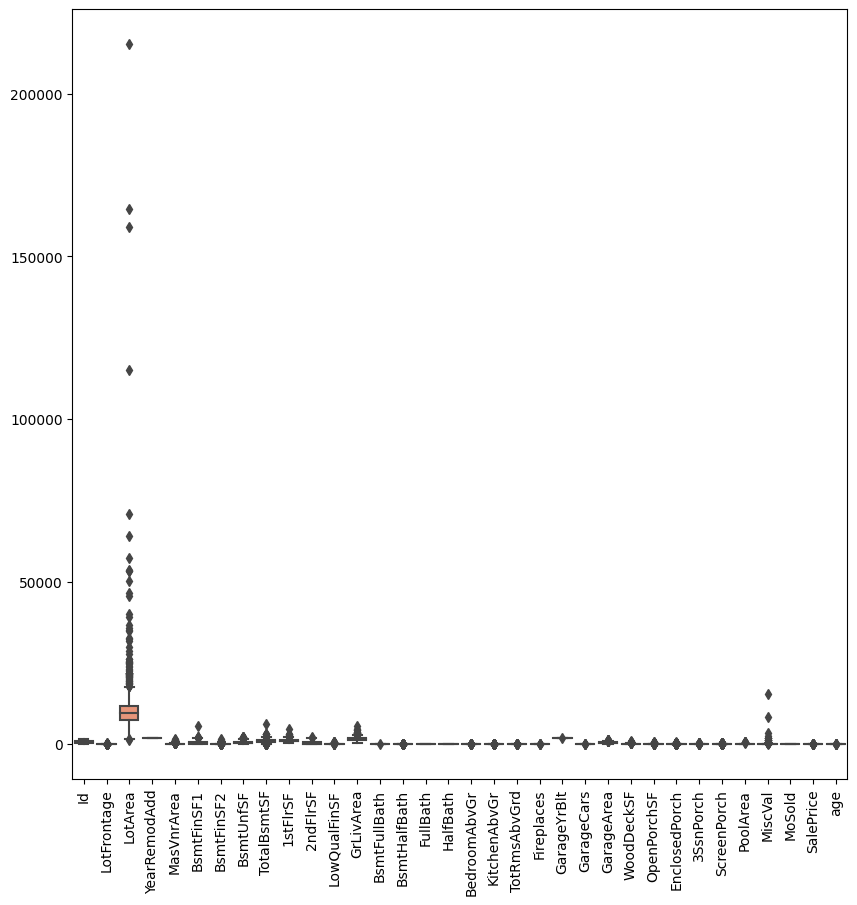

In [229]:
plt.figure(figsize=[10,10])
plt.xticks(rotation=90)
sns.boxplot(data=data_num)

In [231]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in data_num.columns:
    data_num[col][data_num[col] <= data_num[col].quantile(0.05)] = data_num[col].quantile(0.05)
    data_num[col][data_num[col] >= data_num[col].quantile(0.95)] = data_num[col].quantile(0.95)

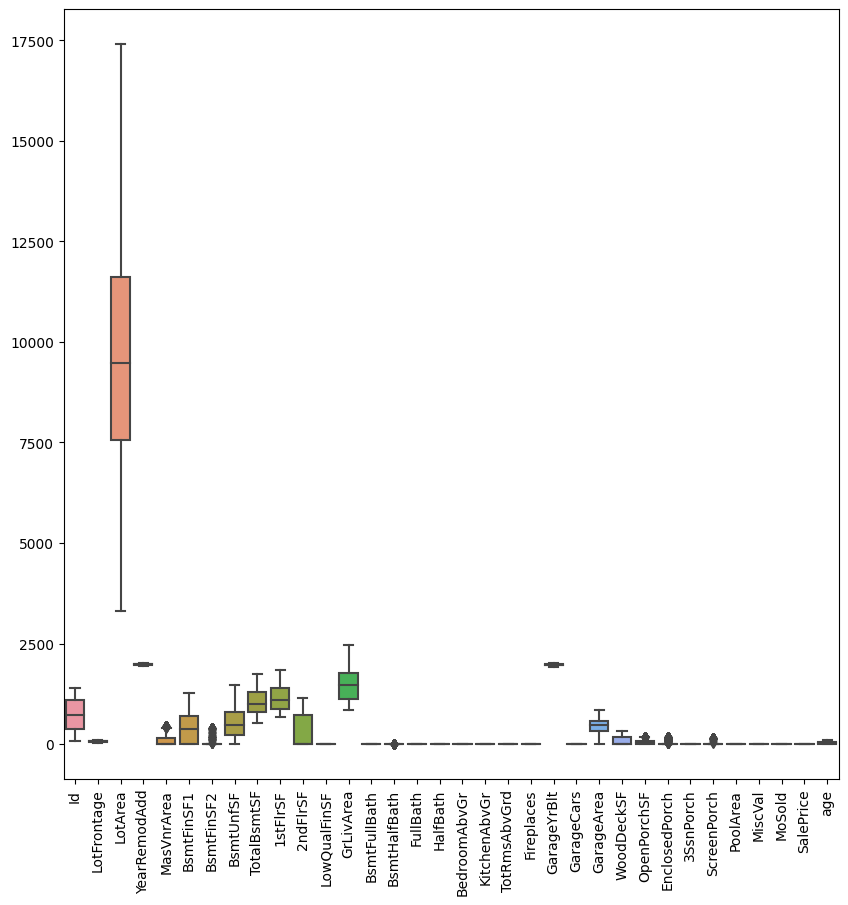

In [232]:
plt.figure(figsize=[10,10])
plt.xticks(rotation=90)
sns.boxplot(data=data_num);

In [233]:
data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageType_BuiltIn  \
0          856       856       854             0  ...                   0   
1         1262      1262         0             0  ...                   0   
2          920       920       866             0  ...                   0   
3          756       961       756             0  ...                   0   
4         1145      1145      1053             0  ...                   0   

   GarageType_Detchd  GarageType_No Garage  GarageType_Others  \
0                  0                     0                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  1                     0                  0   
4                  0                     0                  0   

   GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf  \
0                       0                 1                 0   
1                       0                 1                 0   
2                       0                 1                 0   
3                       0                 0                 1   
4                       0                 1                 0   

   SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
0                     1                     0                      0  
1                     1                     0                      0  
2                     1                     0                      0  
3                     0                     0                      0  
4                     1                     0                      0  

[5 rows x 161 columns]

In [234]:
data.shape

(1460, 161)

# Model Building

In [236]:
X = data.drop(["SalePrice"],axis=1)

In [237]:
y = data['SalePrice']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state=100)

In [240]:
X_train.shape

(1021, 160)

In [241]:
#Scaling numerical variables
scaler = StandardScaler()
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Ridge Regression

In [242]:
# Function to show result
def output_metrics(y_train, y_train_pred, y_test, y_pred):
    output = []
    # R squared
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    output.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    output.append(r2_score(y_test, y_pred))

    ## RSS
    rss_train = np.sum(np.square(y_train - y_train_pred))
    output.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    output.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)

    ## MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    output.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    output.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)

    # RMSE
    rmse_train = mse_train**0.5
    output.append(rmse_train)
    rmse_test = mse_test**0.5
    output.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train)
    print("RMSE (Test) =", '%.2f' % rmse_test)

    return output

In [243]:
# Performing Ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                     5.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()
folds = 5
# cross validation

ridgeCV = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [244]:
ridgeCV.best_params_

{'alpha': 1.0}

In [245]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.01576996, 0.01388092, 0.01086717, 0.01123881, 0.00697694,
        0.00646501, 0.0143537 , 0.00790148, 0.00625463, 0.00880933,
        0.01560731, 0.01400566, 0.01328278, 0.01434078, 0.01405334,
        0.00629573, 0.00720763, 0.01464796, 0.01536169, 0.01141763,
        0.00641117]),
 'std_fit_time': array([5.41151902e-03, 1.90555181e-03, 2.92288526e-03, 3.71337051e-03,
        9.81904838e-04, 1.97855958e-04, 1.54179658e-03, 2.16923915e-03,
        7.23887493e-05, 3.25088468e-03, 1.13811482e-03, 2.91325650e-03,
        1.72145151e-03, 2.02978373e-03, 3.01369467e-03, 4.49064163e-05,
        1.58201539e-03, 1.32002200e-03, 1.17440743e-03, 4.11452146e-03,
        1.66359977e-04]),
 'mean_score_time': array([0.00562973, 0.0055687 , 0.00440469, 0.00438762, 0.00323038,
        0.00273752, 0.00588598, 0.00300236, 0.00283961, 0.00379286,
        0.00456963, 0.00605597, 0.00558991, 0.00354815, 0.00371747,
        0.00360522, 0.00352964, 0.00479984, 0.0045167 , 0.004793

**We get optimum value as 1**

In [246]:
ridge = Ridge(alpha=1)

In [247]:
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [248]:
ridge.coef_

array([-0.01255596,  0.01661643, -0.00339185, -0.00730962,  0.00084447,
        0.00797244,  0.00070139,  0.032532  ,  0.04786221, -0.00091978,
        0.06344644,  0.0254907 ,  0.00493373,  0.02999874,  0.01912521,
        0.00412777, -0.02565199,  0.01568627,  0.02001511,  0.03878365,
        0.00128494,  0.01192675, -0.00211193,  0.01151803,  0.00700721,
        0.01160442, -0.0102552 , -0.00109278,  0.00051749, -0.05243958,
        0.0335625 , -0.07528577,  0.03891941, -0.00718518, -0.03514333,
        0.01084815,  0.0724133 ,  0.03829653, -0.02956534, -0.07275979,
        0.02918685, -0.05041223,  0.02912994,  0.01142553, -0.09762921,
       -0.01458949, -0.0302553 ,  0.03118804, -0.04649926,  0.01481259,
        0.03789573, -0.05036484, -0.05819647, -0.00484503, -0.01959623,
       -0.03313909,  0.02744824,  0.08690098,  0.02437986,  0.1322338 ,
       -0.07876799,  0.02806662, -0.09701105, -0.13071715, -0.01249749,
       -0.01147965, -0.01422795, -0.00888513,  0.13823849,  0.14

In [249]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [251]:
ridge_metrics = output_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.88
RSS (Train) = 12.96
RSS (Test) = 8.48
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


In [252]:
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.015770      0.005412         0.005630        0.002323      0.0001   
1        0.013881      0.001906         0.005569        0.000490       0.001   
2        0.010867      0.002923         0.004405        0.001321        0.01   
3        0.011239      0.003713         0.004388        0.001726        0.05   
4        0.006977      0.000982         0.003230        0.000472         0.1   
5        0.006465      0.000198         0.002738        0.000100         0.2   
6        0.014354      0.001542         0.005886        0.000573         0.3   
7        0.007901      0.002169         0.003002        0.000244         0.4   
8        0.006255      0.000072         0.002840        0.000071         0.5   
9        0.008809      0.003251         0.003793        0.001814         0.6   
10       0.015607      0.001138         0.004570        0.001053         0.7   
11       0.014006      0.002913         0.006056        0.001017         0.8   
12       0.013283      0.001721         0.005590        0.000711         0.9   
13       0.014341      0.002030         0.003548        0.000957         1.0   
14       0.014053      0.003014         0.003717        0.001396         5.0   
15       0.006296      0.000045         0.003605        0.001545        10.0   
16       0.007208      0.001582         0.003530        0.001175          20   
17       0.014648      0.001320         0.004800        0.001484          50   
18       0.015362      0.001174         0.004517        0.001513         100   
19       0.011418      0.004115         0.004794        0.001607         500   
20       0.006411      0.000166         0.002961        0.000125        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.865233           0.782111   
1    {'alpha': 0.001}           0.865246           0.782101   
2     {'alpha': 0.01}           0.865372           0.782006   
3     {'alpha': 0.05}           0.865906           0.781577   
4      {'alpha': 0.1}           0.866519           0.781047   
5      {'alpha': 0.2}           0.867609           0.780040   
6      {'alpha': 0.3}           0.868563           0.779110   
7      {'alpha': 0.4}           0.869412           0.778249   
8      {'alpha': 0.5}           0.870178           0.777449   
9      {'alpha': 0.6}           0.870874           0.776698   
10     {'alpha': 0.7}           0.871511           0.775991   
11     {'alpha': 0.8}           0.872097           0.775321   
12     {'alpha': 0.9}           0.872639           0.774682   
13     {'alpha': 1.0}           0.873141           0.774072   
14     {'alpha': 5.0}           0.881061           0.757851   
15    {'alpha': 10.0}           0.882909           0.744487   
16      {'alpha': 20}           0.882814           0.726734   
17      {'alpha': 50}           0.879037           0.701482   
18     {'alpha': 100}           0.873747           0.687375   
19     {'alpha': 500}           0.852613           0.686979   
20    {'alpha': 1000}           0.828209           0.691811   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0            0.833137           0.891923  ...         0.853335   
1            0.833135           0.891965  ...         0.853356   
2            0.833121           0.892338  ...         0.853553   
3            0.833044           0.893447  ...         0.854233   
4            0.832930           0.894361  ...         0.854843   
5            0.832695           0.895711  ...         0.855681   
6            0.832482           0.896778  ...         0.856245   
7            0.832299           0.897678  ...         0.856654   
8            0.832144           0.898457  ...         0.856963   
9            0.832015           0.899142  ...         0.857204   
10           0.831907           0.899750  ...         0.857396   
11           0.831817           0.900294  ...         0.857551  

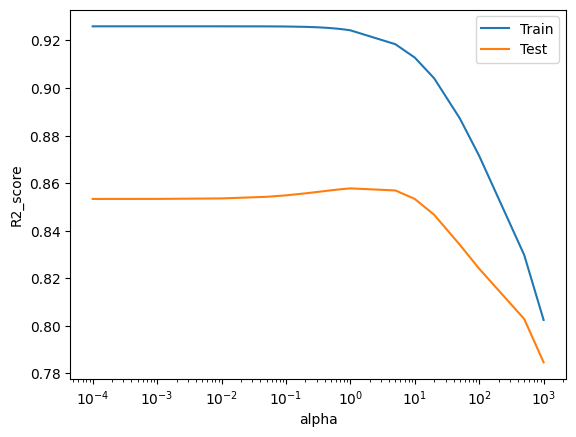

In [253]:
# Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

# Lasso

In [255]:
# Performing Lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                     5.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()
folds = 5
# cross validation

lassoCV = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [256]:
lassoCV.best_params_

{'alpha': 0.0001}

**Inference: The Optimum result for better r2 is at alpha 0.0001**

In [257]:
lassoCV.cv_results_

{'mean_fit_time': array([0.09242563, 0.03084092, 0.00838485, 0.00858502, 0.00847788,
        0.00586681, 0.00549636, 0.00643668, 0.00525646, 0.00850921,
        0.01384315, 0.01252074, 0.01516104, 0.00557508, 0.01037769,
        0.0117558 , 0.01156526, 0.00657787, 0.00571375, 0.00548201,
        0.00764766]),
 'std_fit_time': array([0.04225155, 0.01430362, 0.00146037, 0.00203135, 0.00296526,
        0.00029356, 0.00028538, 0.00216575, 0.00012033, 0.00319624,
        0.00279633, 0.00184221, 0.00214826, 0.00025194, 0.00342529,
        0.00054993, 0.00337013, 0.00092395, 0.00077348, 0.00030485,
        0.00310534]),
 'mean_score_time': array([0.00637226, 0.00395813, 0.00325346, 0.00437255, 0.00508895,
        0.00277529, 0.00276837, 0.00519776, 0.00273204, 0.00287447,
        0.0058043 , 0.0067699 , 0.00372205, 0.00281682, 0.00286908,
        0.00441275, 0.00371313, 0.005791  , 0.00284801, 0.00279417,
        0.00284901]),
 'std_score_time': array([2.34674298e-03, 1.19838628e-03, 4.174441

In [258]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [259]:
lasso.coef_

array([-1.16382305e-02,  1.66576341e-02, -3.59656269e-03, -8.13655602e-03,
        2.17658062e-04,  6.44423894e-03,  0.00000000e+00,  4.60916788e-02,
        5.95367531e-02, -0.00000000e+00,  4.76321066e-02,  2.58447624e-02,
        4.79825491e-03,  2.91745856e-02,  1.82460795e-02,  3.84165878e-03,
       -2.48821494e-02,  1.57035771e-02,  2.01097127e-02,  3.98651131e-02,
        0.00000000e+00,  1.16165110e-02, -1.97170653e-03,  1.08057487e-02,
        6.96243365e-03,  1.13384567e-02, -1.04880630e-02, -1.20883899e-03,
        0.00000000e+00, -5.43328422e-02,  0.00000000e+00, -8.67529957e-02,
        2.63233032e-02, -0.00000000e+00, -2.27648385e-02, -0.00000000e+00,
        5.80007172e-02,  1.48822226e-02, -4.60103535e-02, -7.63313857e-02,
        3.37511530e-02, -2.39843891e-02,  1.34809902e-02,  0.00000000e+00,
       -7.90387423e-02, -0.00000000e+00, -1.92751483e-02,  2.84380029e-02,
       -4.05891929e-02,  1.44215281e-02,  3.77809230e-02, -4.44427484e-02,
       -3.63856638e-02, -

In [260]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [261]:
lasso_metrics = output_metrics(y_train,y_train_pred,y_test,y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.88
RSS (Train) = 12.97
RSS (Test) = 8.50
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


In [263]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.092426      0.042252         0.006372        0.002347      0.0001   
1        0.030841      0.014304         0.003958        0.001198       0.001   
2        0.008385      0.001460         0.003253        0.000417        0.01   
3        0.008585      0.002031         0.004373        0.002317        0.05   
4        0.008478      0.002965         0.005089        0.002516         0.1   
5        0.005867      0.000294         0.002775        0.000073         0.2   
6        0.005496      0.000285         0.002768        0.000087         0.3   
7        0.006437      0.002166         0.005198        0.004734         0.4   
8        0.005256      0.000120         0.002732        0.000057         0.5   
9        0.008509      0.003196         0.002874        0.000328         0.6   
10       0.013843      0.002796         0.005804        0.002519         0.7   
11       0.012521      0.001842         0.006770        0.001377         0.8   
12       0.015161      0.002148         0.003722        0.000965         0.9   
13       0.005575      0.000252         0.002817        0.000103         1.0   
14       0.010378      0.003425         0.002869        0.000392         5.0   
15       0.011756      0.000550         0.004413        0.002167        10.0   
16       0.011565      0.003370         0.003713        0.001195          20   
17       0.006578      0.000924         0.005791        0.003258          50   
18       0.005714      0.000773         0.002848        0.000241         100   
19       0.005482      0.000305         0.002794        0.000055         500   
20       0.007648      0.003105         0.002849        0.000085        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.871840           0.773553   
1    {'alpha': 0.001}           0.878735           0.722671   
2     {'alpha': 0.01}           0.829399           0.617278   
3     {'alpha': 0.05}           0.772257           0.637701   
4      {'alpha': 0.1}           0.660280           0.604385   
5      {'alpha': 0.2}           0.294173           0.287307   
6      {'alpha': 0.3}          -0.008156          -0.008018   
7      {'alpha': 0.4}          -0.008156          -0.008018   
8      {'alpha': 0.5}          -0.008156          -0.008018   
9      {'alpha': 0.6}          -0.008156          -0.008018   
10     {'alpha': 0.7}          -0.008156          -0.008018   
11     {'alpha': 0.8}          -0.008156          -0.008018   
12     {'alpha': 0.9}          -0.008156          -0.008018   
13     {'alpha': 1.0}          -0.008156          -0.008018   
14     {'alpha': 5.0}          -0.008156          -0.008018   
15    {'alpha': 10.0}          -0.008156          -0.008018   
16      {'alpha': 20}          -0.008156          -0.008018   
17      {'alpha': 50}          -0.008156          -0.008018   
18     {'alpha': 100}          -0.008156          -0.008018   
19     {'alpha': 500}          -0.008156          -0.008018   
20    {'alpha': 1000}          -0.008156          -0.008018   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0        8.332455e-01           0.899547  ...         0.856691   
1        8.284020e-01           0.895599  ...         0.846617   
2        7.497013e-01           0.835872  ...         0.776015   
3        7.070371e-01           0.747941  ...         0.725082   
4        6.247283e-01           0.634573  ...         0.632177   
5        2.930655e-01           0.283916  ...         0.282366   
6       -1.846927e-08          -0.009789  ...        -0.006874   
7       -1.846927e-08          -0.009789  ...        -0.006874   
8       -1.846927e-08          -0.009789  ...        -0.006874   
9       -1.846927e-08          -0.009789  ...        -0.006874   
10      -1.846927e-08          -0.009789  ...        -0.006874   
11      -1.846927e-08          -0.009789  ...        -0.006874  

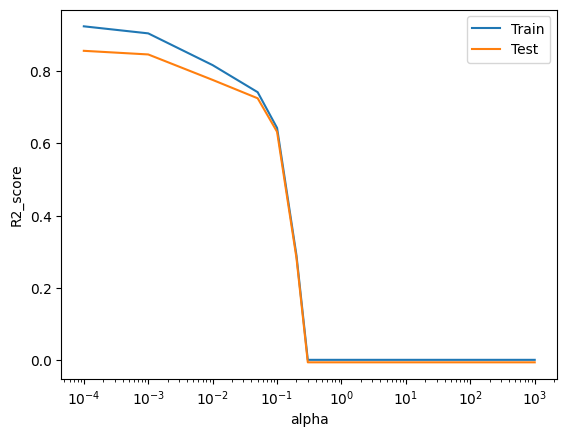

In [264]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

# Ridge v/s Lasso

In [268]:
result = {'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_result = pd.DataFrame(result)
print(final_result)

             Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.919236          0.919190
1   R2 Score (Test)          0.882839          0.882459
2       RSS (Train)         12.958133         12.965575
3        RSS (Test)          8.477038          8.504503
4       MSE (Train)          0.012692          0.012699
5        MSE (Test)          0.019310          0.019372
6      RMSE (Train)          0.112657          0.112689
7       RMSE (Test)          0.138960          0.139185


**R2 is ~0.88 for both Ridge and Lasso**

In [270]:
# Providing Coefficients
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

print(betas)

                          Ridge     Lasso
LotFrontage           -0.012556 -0.011638
LotArea                0.016616  0.016658
MasVnrArea            -0.003392 -0.003597
BsmtFinSF1            -0.007310 -0.008137
BsmtFinSF2             0.000844  0.000218
...                         ...       ...
GarageFinish_RFn      -0.014933 -0.013332
GarageFinish_Unf      -0.038352 -0.037646
SaleCondition_Normal   0.054673  0.052154
SaleCondition_Others   0.036940  0.032040
SaleCondition_Partial  0.068016  0.065214

[160 rows x 2 columns]


In [271]:
#Features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
TotalBsmtSF                                         0.000701    0.0
LowQualFinSF                                       -0.000920   -0.0
GarageArea                                          0.001285    0.0
MoSold                                              0.000517    0.0
MSSubClass_1-1/2 STORY FINISHED ALL AGES            0.033562    0.0
MSSubClass_1-STORY PUD (Planned Unit Developmen... -0.007185   -0.0
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...  0.010848   -0.0
MSSubClass_SPLIT OR MULTI-LEVEL                     0.011426    0.0
MSZoning_RL                                        -0.014589   -0.0
Neighborhood_Blueste                               -0.019596   -0.0
Neighborhood_NPkVill                               -0.014228   -0.0
Neighborhood_NWAmes                                -0.008885   -0.0
BldgType_2fmCon                                     0.010848   -0.0
OverallCond_Poor                                   -0.012671   -0.0
Exterior2nd_CmentBd                                 0.023132    0.0
Exterior2nd_Others                                  0.008466    0.0
Exterior2nd_Plywood                                 0.013120   -0.0
Exterior2nd_VinylSd                                 0.022401    0.0
Exterior2nd_Wd Sdng                                 0.014433   -0.0
MasVnrType_Stone                                    0.014390   -0.0

In [272]:
betas[betas['Lasso']==0].shape

(20, 2)

**20 Features are removed by Lasso**

In [275]:
#Top features impacting sales price a/c to Ridge

betas['Ridge'].sort_values(ascending=False).head(20)

OverallQual_Excellent              0.213995
Neighborhood_NridgHt               0.149678
Neighborhood_NoRidge               0.138238
Neighborhood_Crawfor               0.132234
OverallQual_Very Good              0.131093
Neighborhood_StoneBr               0.119630
Neighborhood_Somerst               0.119350
OverallCond_Excellent              0.109616
OverallQual_Very Excellent         0.104470
Neighborhood_ClearCr               0.086901
MSSubClass_2-1/2 STORY ALL AGES    0.072413
SaleCondition_Partial              0.068016
Neighborhood_Veenker               0.066420
GrLivArea                          0.063446
BsmtExposure_Gd                    0.060882
OverallCond_Very Good              0.054710
SaleCondition_Normal               0.054673
OverallQual_Good                   0.052662
Exterior2nd_MetalSd                0.049731
2ndFlrSF                           0.047862
Name: Ridge, dtype: float64

# Key Insights from Ridge
1.   Overall Quality being Excellent,
2.   Neighbourhoods namley -Northridge Heights, Northridge, Crawford, Somerset, Veenker, Stone Brook and Clear Creek
3.     Dwelling involving 2-1/2 STORY
4.     Above grade Living area
5.     Good Exposure to walkout or garden level walls

have commanded Sales Price for Surprise Housing

In [276]:
betas['Lasso'].sort_values(ascending=False).head(20)

OverallQual_Excellent              0.225407
Neighborhood_NridgHt               0.152167
Neighborhood_NoRidge               0.143192
Neighborhood_Crawfor               0.141590
OverallQual_Very Good              0.136055
Neighborhood_Somerst               0.134324
Neighborhood_StoneBr               0.121012
OverallQual_Very Excellent         0.109521
OverallCond_Excellent              0.109516
Neighborhood_ClearCr               0.092407
Neighborhood_Veenker               0.068806
SaleCondition_Partial              0.065214
BsmtExposure_Gd                    0.061631
2ndFlrSF                           0.059537
MSSubClass_2-1/2 STORY ALL AGES    0.058001
OverallQual_Good                   0.055116
OverallCond_Very Good              0.053875
SaleCondition_Normal               0.052154
GrLivArea                          0.047632
1stFlrSF                           0.046092
Name: Lasso, dtype: float64

# Key Insights from Lasso
1.   Overall Quality being Excellent/Very Good/Good,
2.   Neighbourhoods namley -Northridge Heights, Northridge, Crawford, Somerset, Veenker, Stone Brook and Clear Creek
3.     Partial Sales Condition
4.     Above grade Living area
5.     Good Exposure to walkout or garden level walls
6.     2nd floor Squar Feet

have commanded Sales Price for Surprise Housing